In [29]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
imposrt matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [2]:
path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

In [3]:
# df1 is the new version of df without the column "Unnamed: 0"
df1 = mpt.drop_a_column(df, "Unnamed: 0")

data is not labeled but it could be labeled since breakdown data is given. it will be labeled accordingly to picture given in the data description.
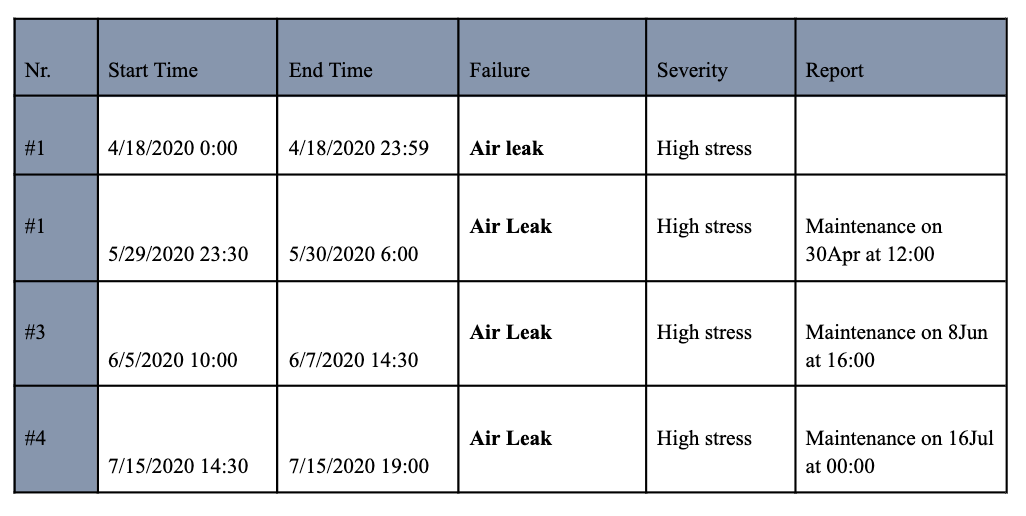


In [4]:
# this should be checked

f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

In [5]:
# # df2 is the new version of df1 with "condition" column added.

df2 = df1.assign(condition=0)
df2.head()

timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2           53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3           53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4           53.475         0.0400   1.0         0.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses  condition  
0              1.0        1.0              1.0          0  
1              1.0        1.0              1.0          0  
2              1.0        1.0              1.0          0  
3              1.0        1.0              1.0          0  
4              1.0        1.0              1.0          0

condition
0    1486994
1      29954
Name: count, dtype: int64


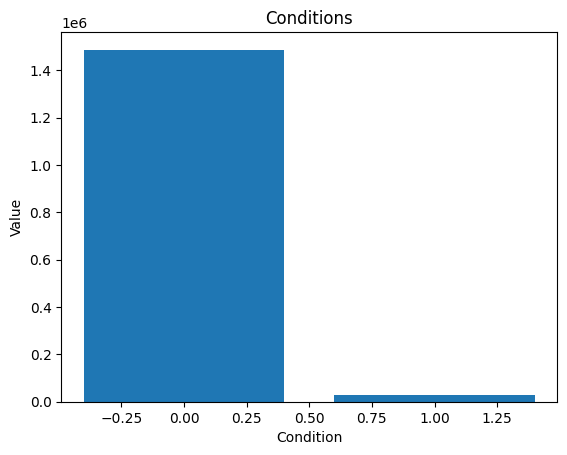

In [6]:
df2a = mpt.change_the_values_by_applying_a_time_filter(df2, f1_start, f1_finish, "condition", 1)
df2b = mpt.change_the_values_by_applying_a_time_filter(df2a, f2_start, f2_finish, "condition", 1)
df2c = mpt.change_the_values_by_applying_a_time_filter(df2b, f3_start, f3_finish, "condition", 1)
df2 = mpt.change_the_values_by_applying_a_time_filter(df2c, f4_start, f4_finish, "condition", 1)

print(df2["condition"].value_counts())


plt.bar([0, 1], df2["condition"].value_counts())
plt.title('Conditions')
plt.xlabel('Condition')
plt.ylabel('Value')
plt.show()

<Axes: >

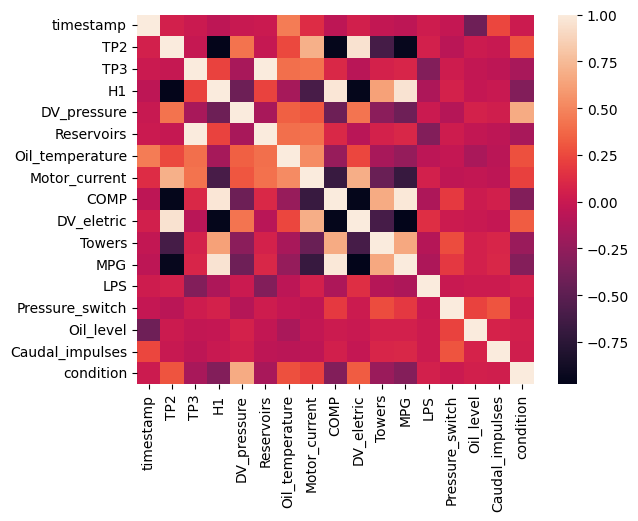

In [7]:
sns.heatmap(df2.corr())

In [8]:
column_names = df2.columns.to_list()

In [9]:
summary_stats = df2.groupby('condition')[column_names].agg(['mean', 'median', 'std'])
print(summary_stats['TP2'])

condition_0 = df2[df2['condition'] == 0]['TP2']
condition_1 = df2[df2['condition'] == 1]['TP2']

print()

t_stat, p_value = stats.ttest_ind(condition_0, condition_1)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant difference: {p_value < 0.05}")

               mean  median       std
condition                            
0          1.231905  -0.012  3.134709
1          8.115287   8.272  0.982387

T-statistic: -379.6669
P-value: 0.0000
Significant difference: True


In [10]:
for i in column_names:
    if i =="timestamp":
        pass
    else:
        print(i)
        mpt.apply_ttest(df2,column_names, i)
        print()
        print()

TP2
               mean  median       std
condition                            
0          1.231905  -0.012  3.134709
1          8.115287   8.272  0.982387

T-statistic: -379.6669
P-value: 0.0000
Significant difference: True


TP3
               mean  median       std
condition                            
0          8.998642   8.978  0.633842
1          8.288059   8.170  0.495399

T-statistic: 192.8435
P-value: 0.0000
Significant difference: True


H1
               mean  median       std
condition                            
0          7.719849   8.808  3.187593
1          0.037668  -0.008  0.627408

T-statistic: 416.9457
P-value: 0.0000
Significant difference: True


DV_pressure
               mean  median       std
condition                            
0          0.019619  -0.020  0.277259
1          1.859813   2.012  0.519533

T-statistic: -1110.1089
P-value: 0.0000
Significant difference: True


Reservoirs
               mean  median       std
condition                            

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


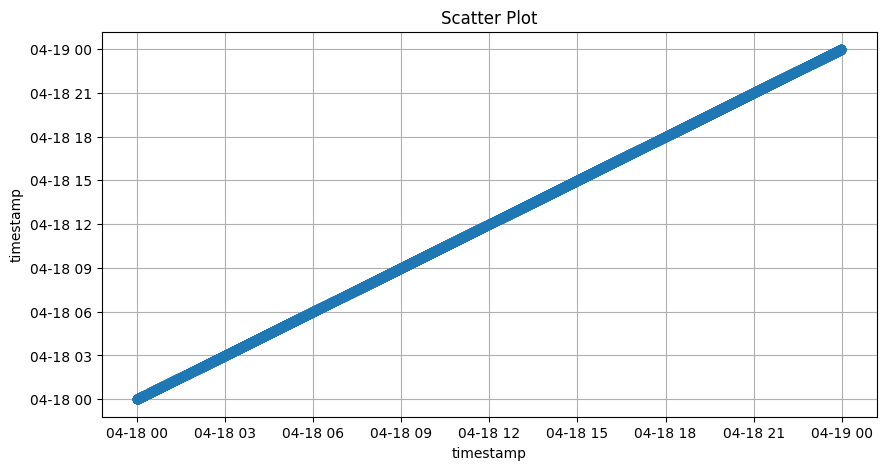

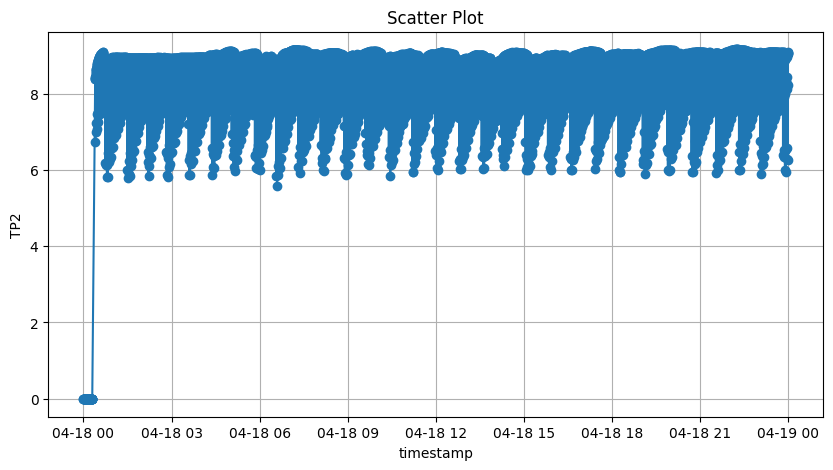

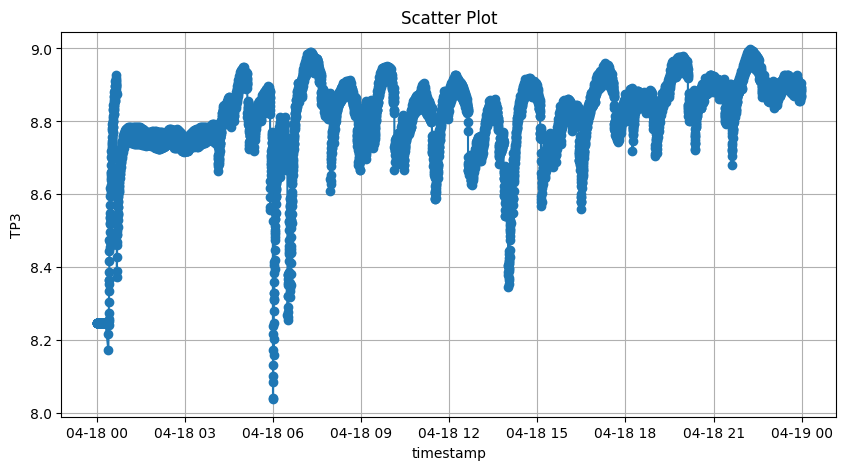

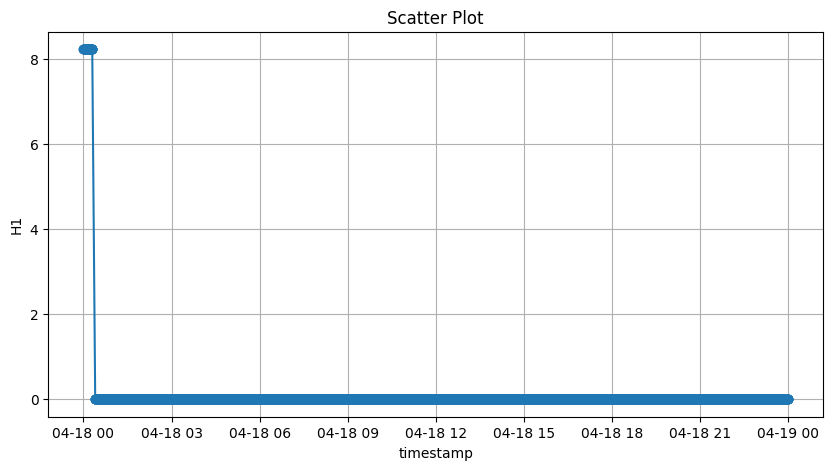

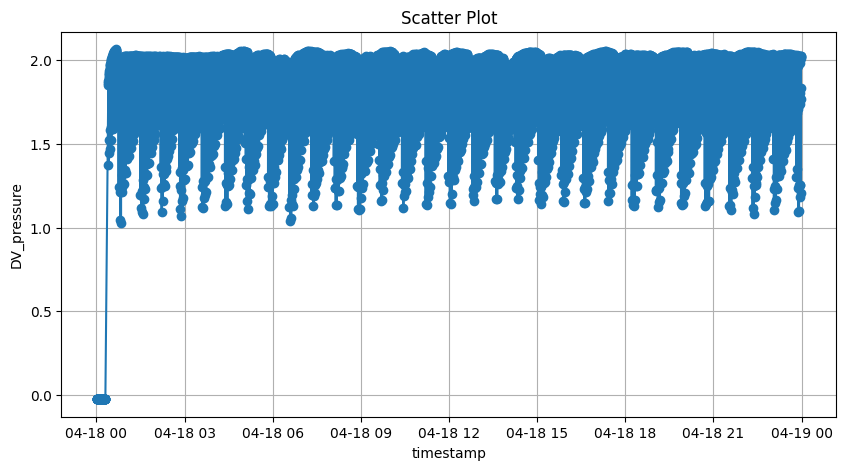

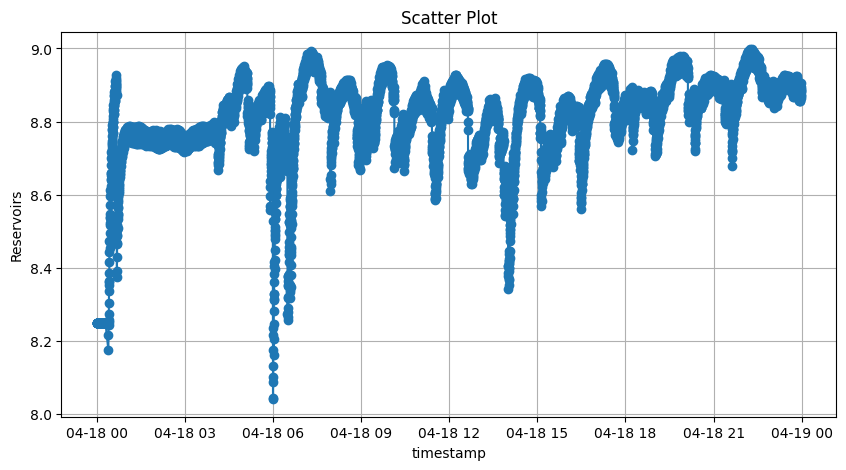

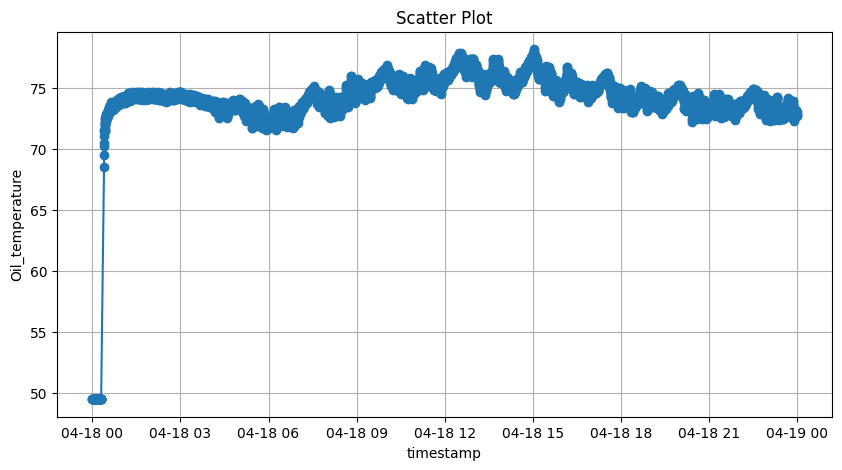

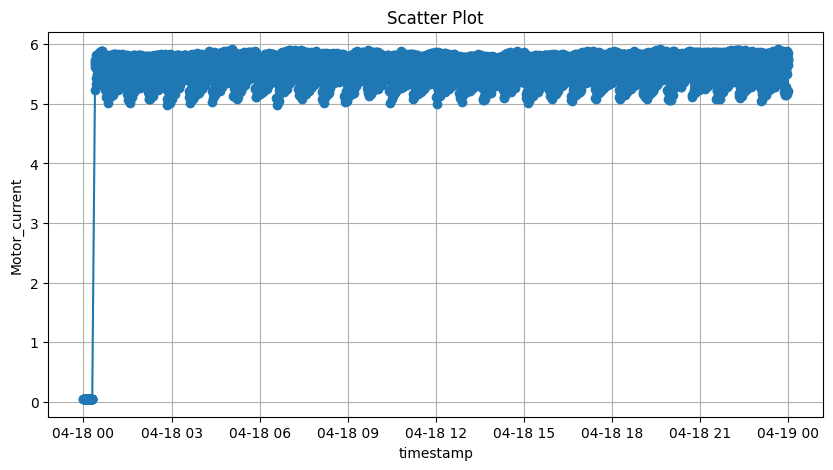

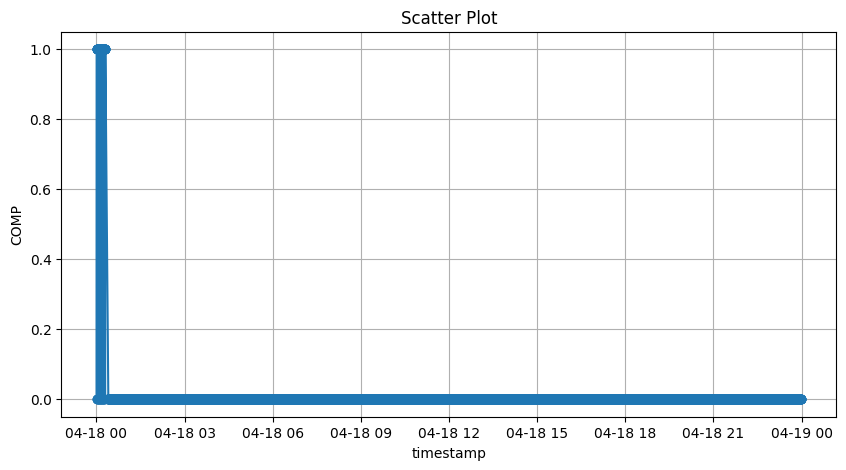

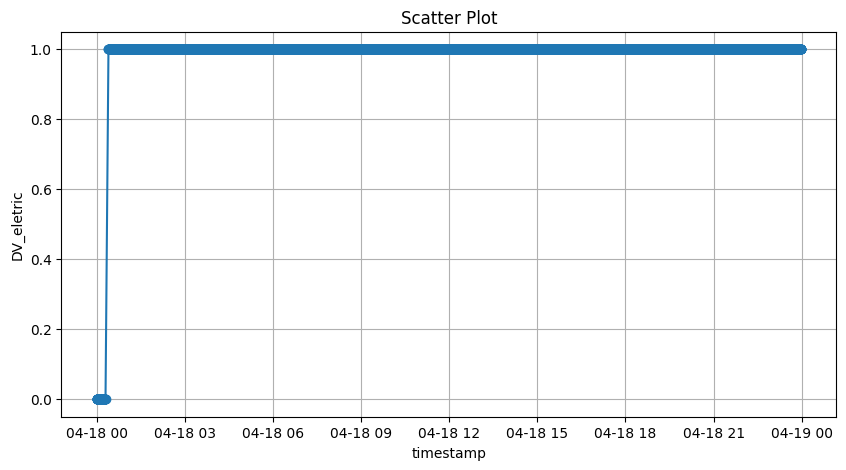

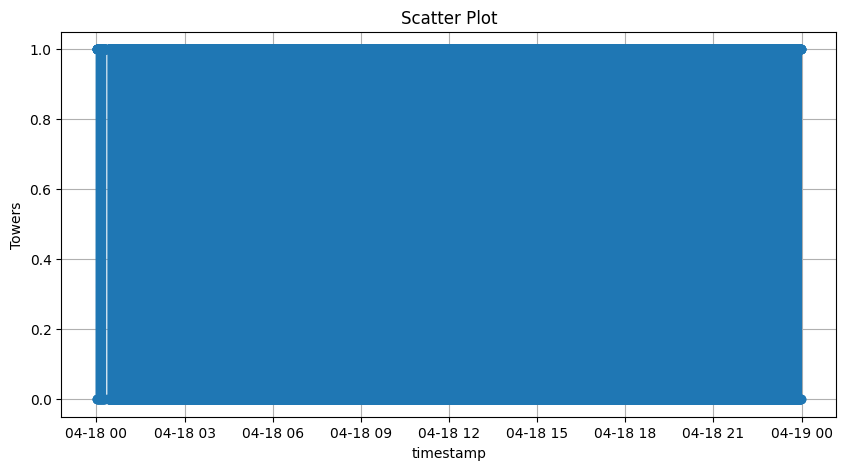

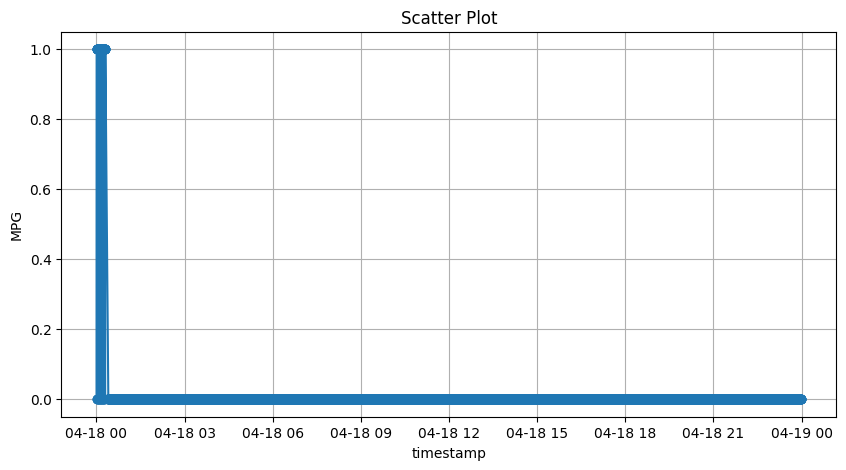

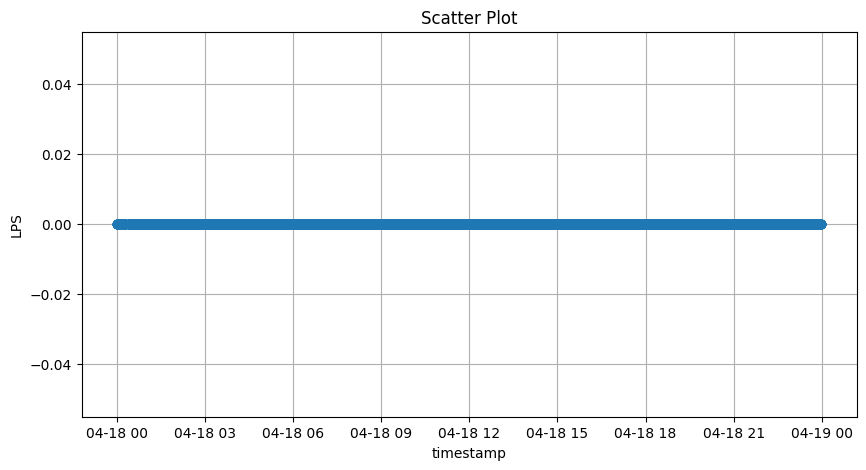

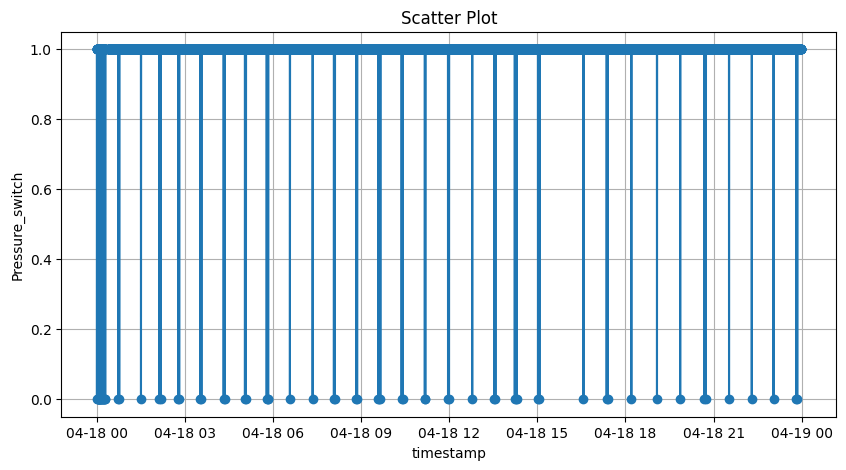

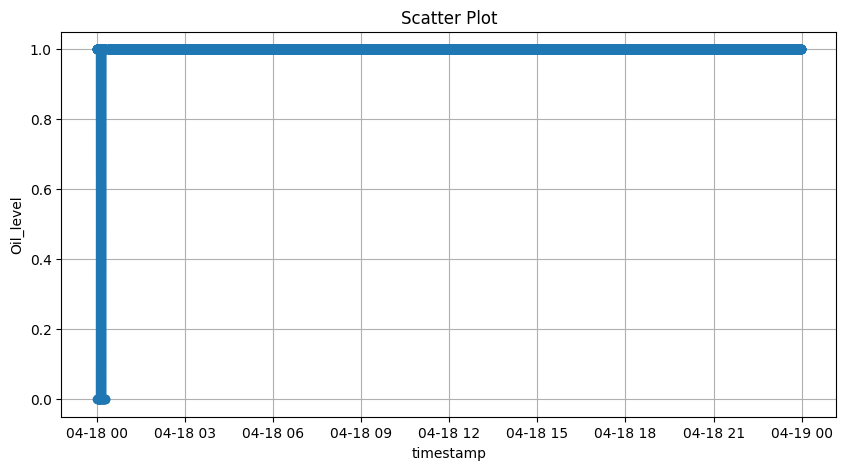

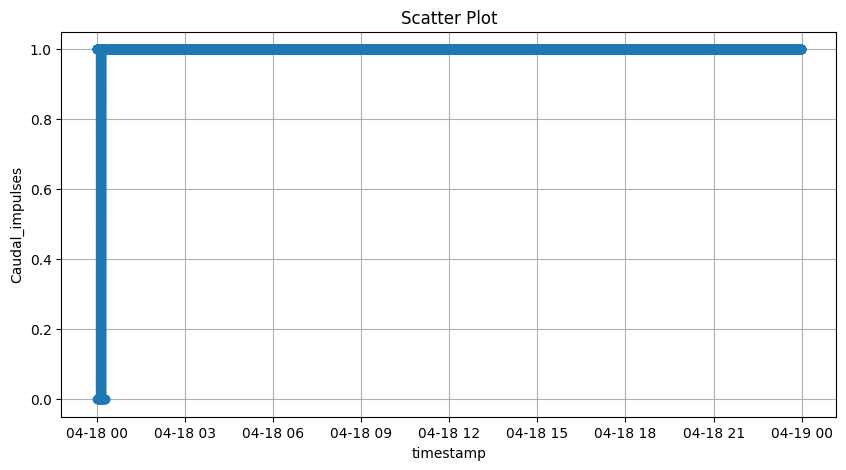

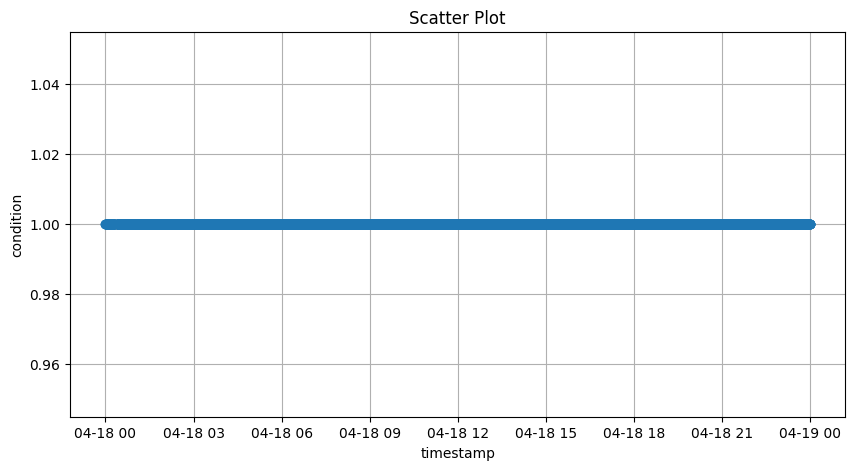

In [14]:
for i in column_names:
    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df2, f1_start, f1_finish), "timestamp", i)

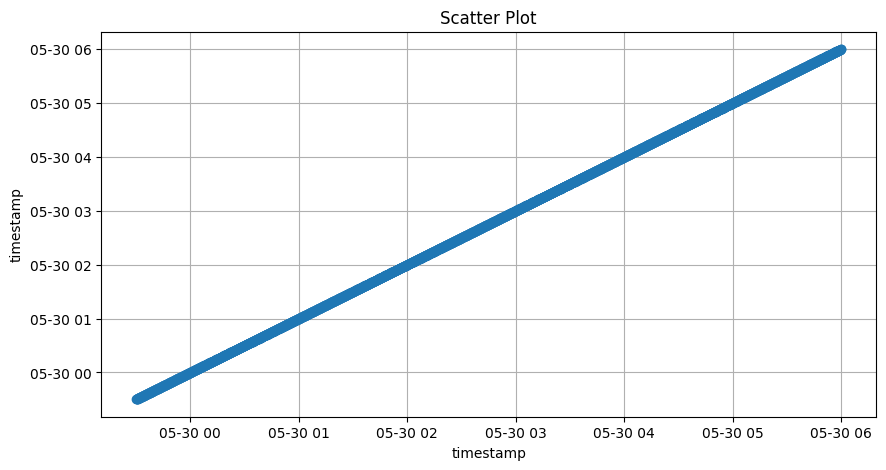

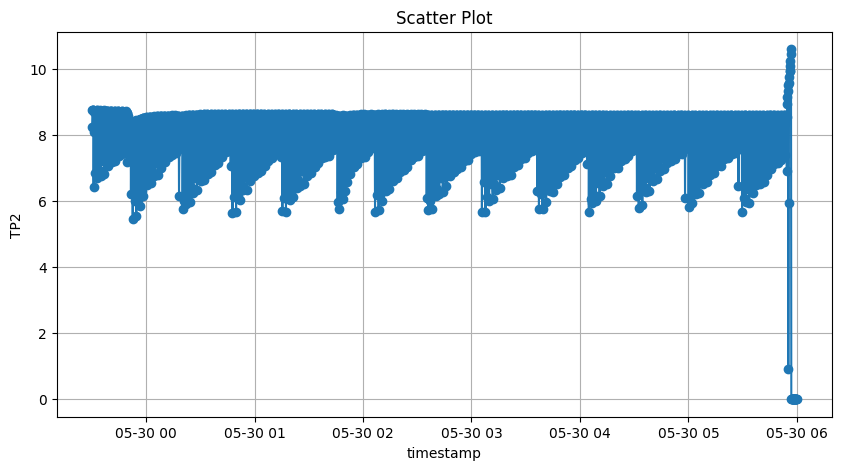

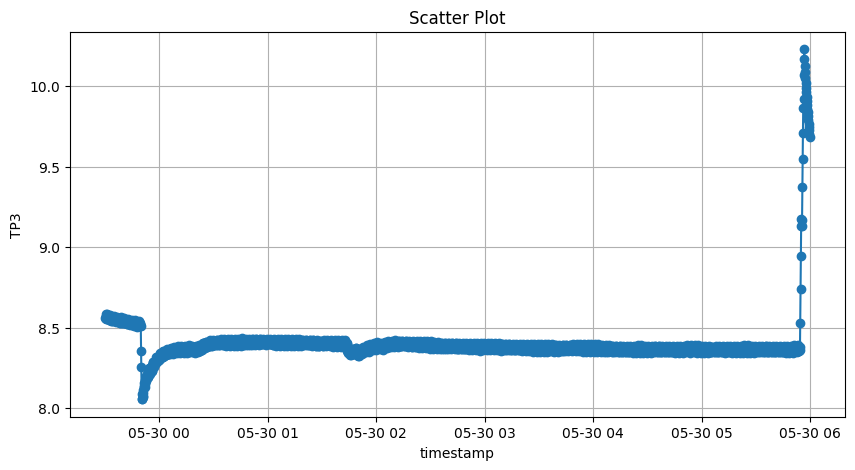

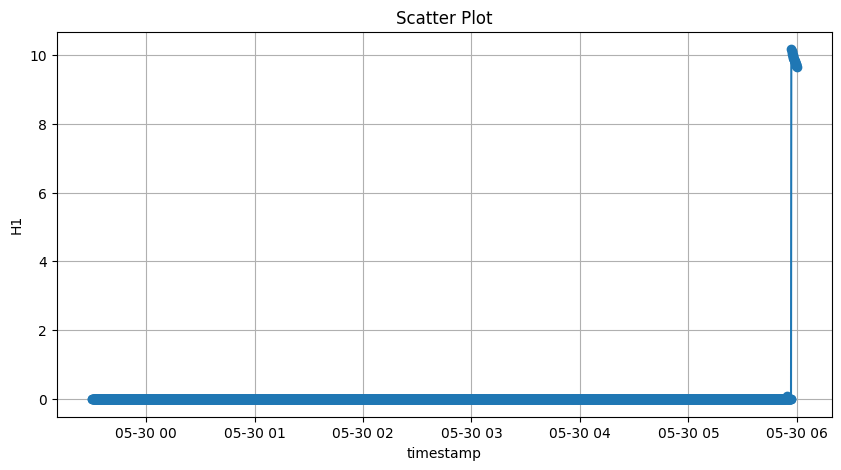

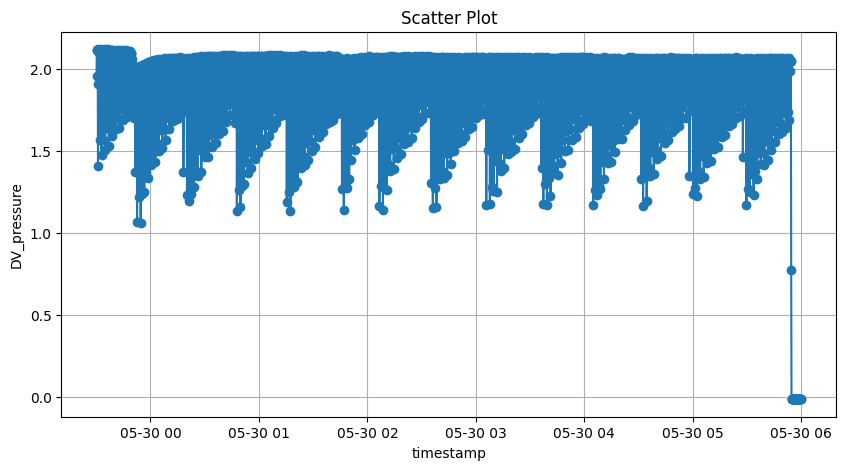

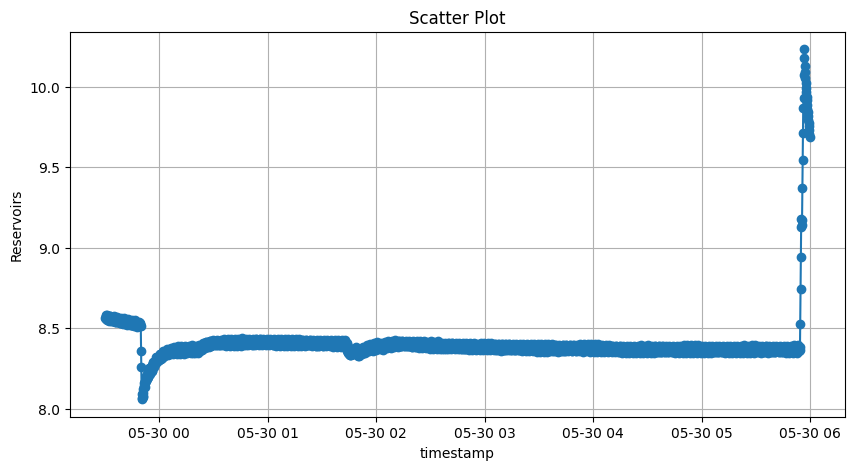

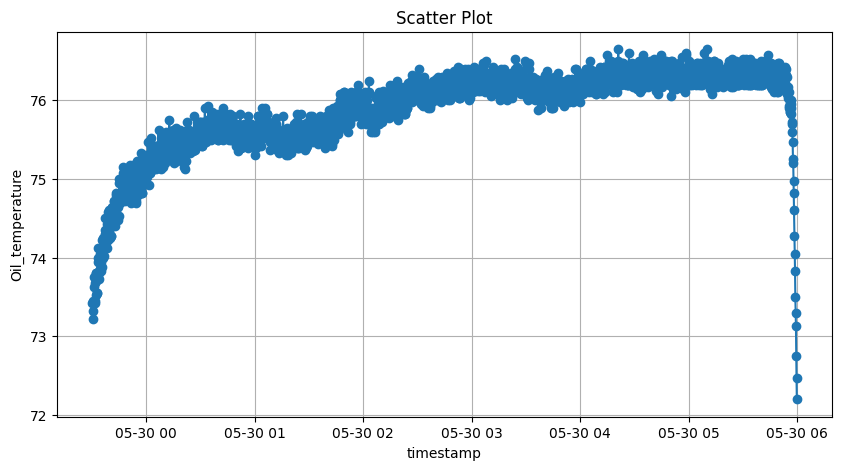

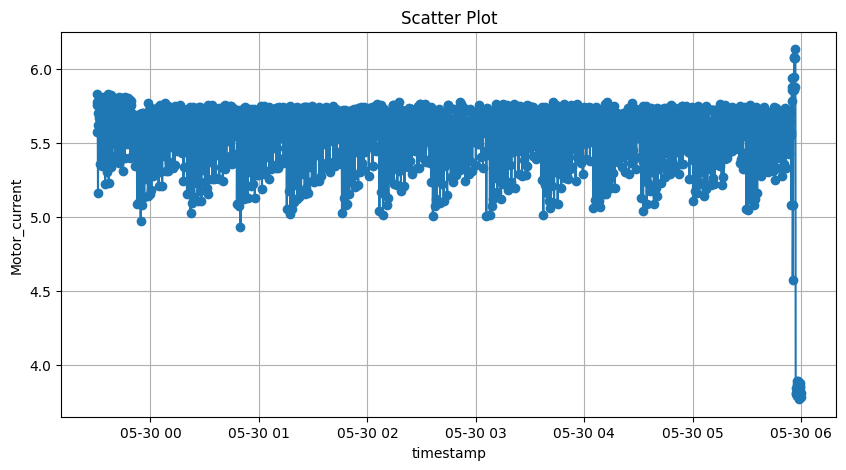

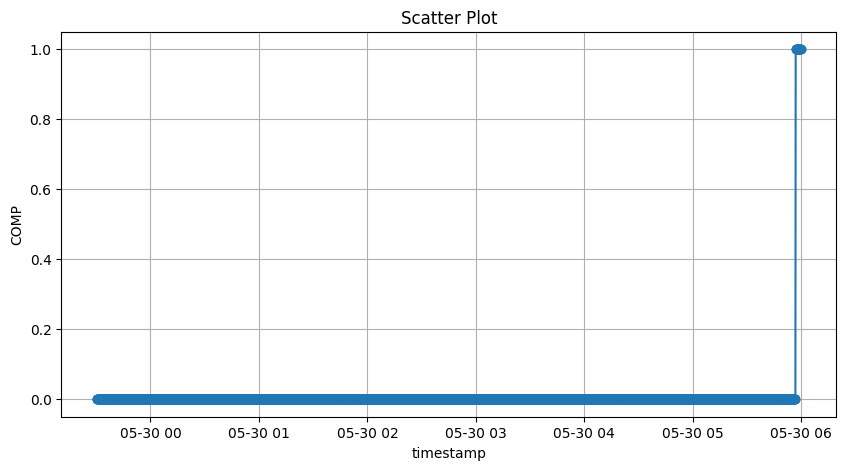

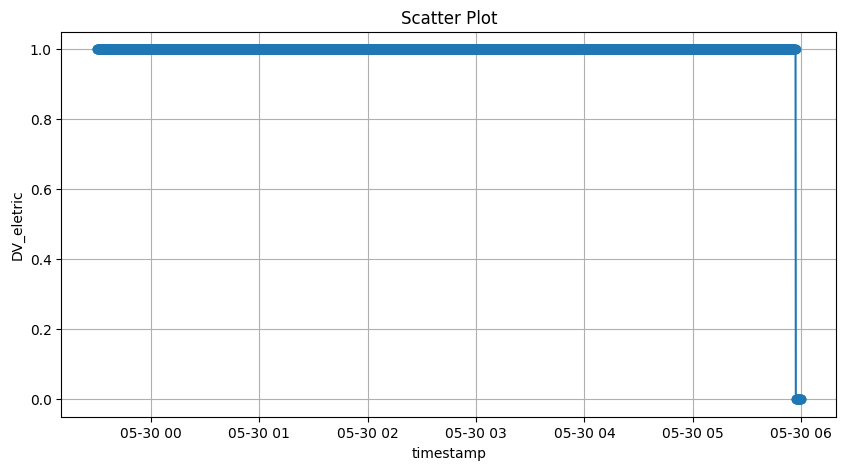

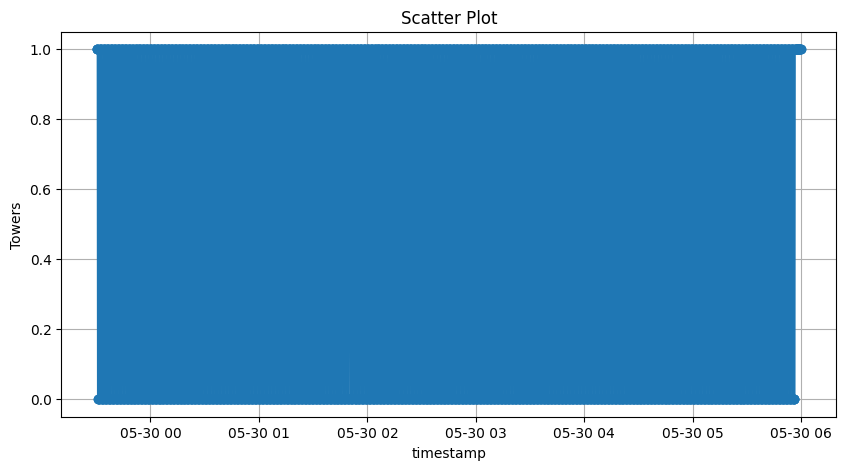

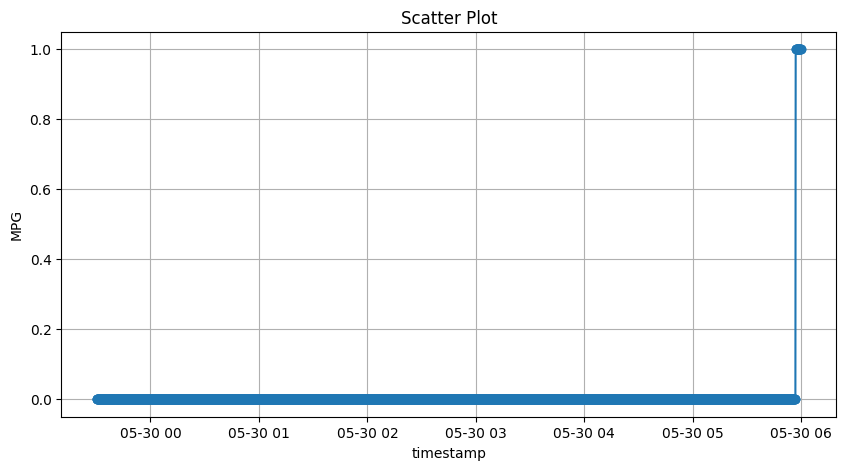

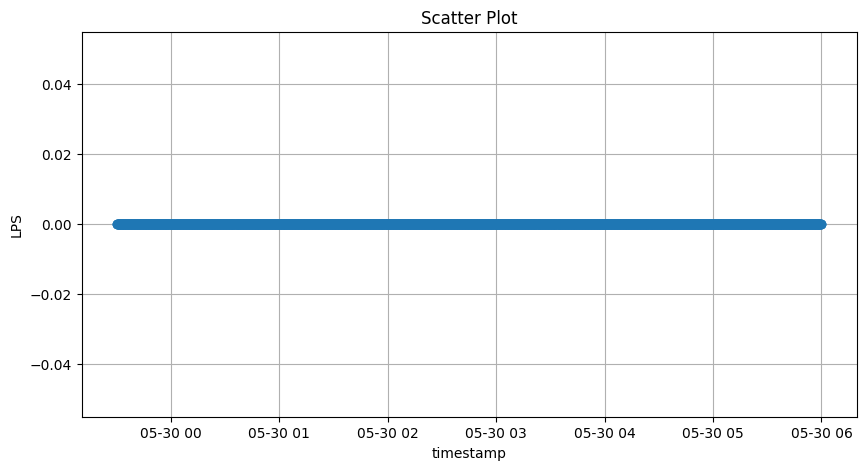

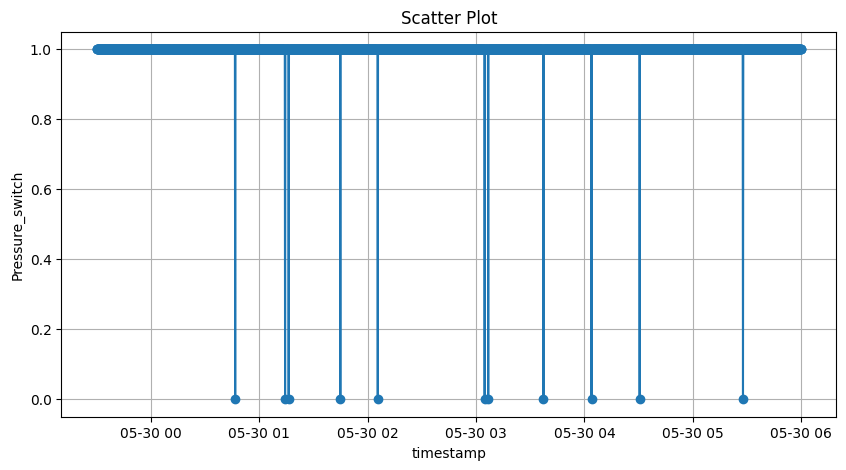

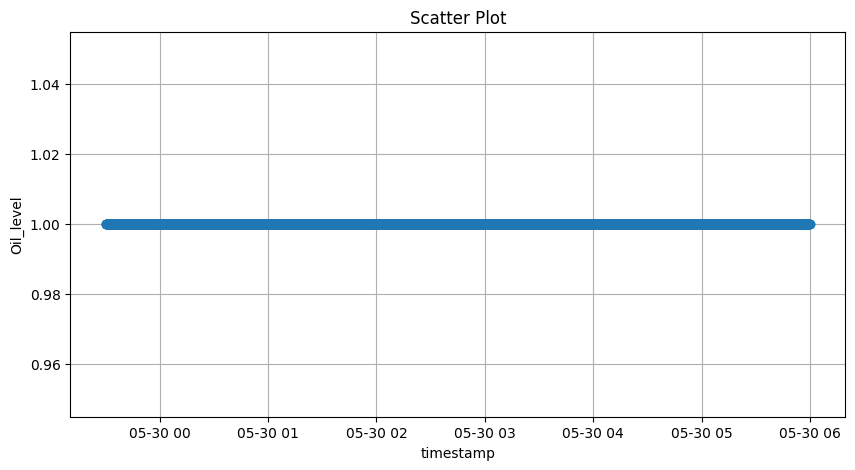

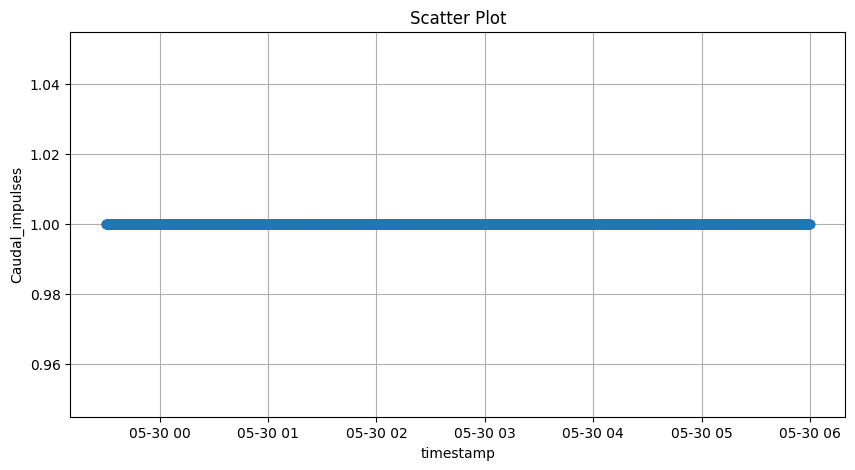

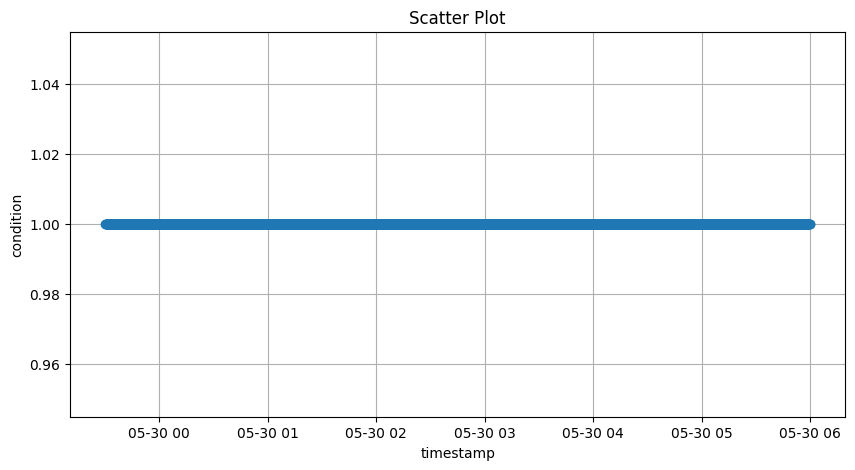

In [15]:
for i in column_names:
    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df2, f2_start, f2_finish), "timestamp", i)

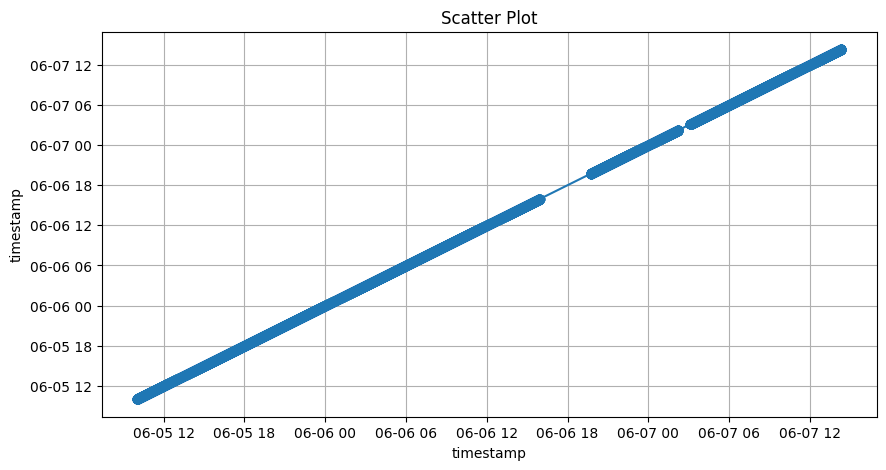

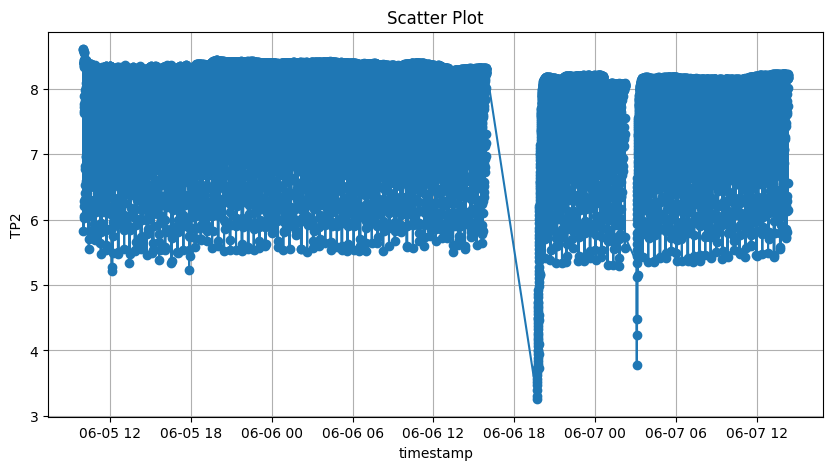

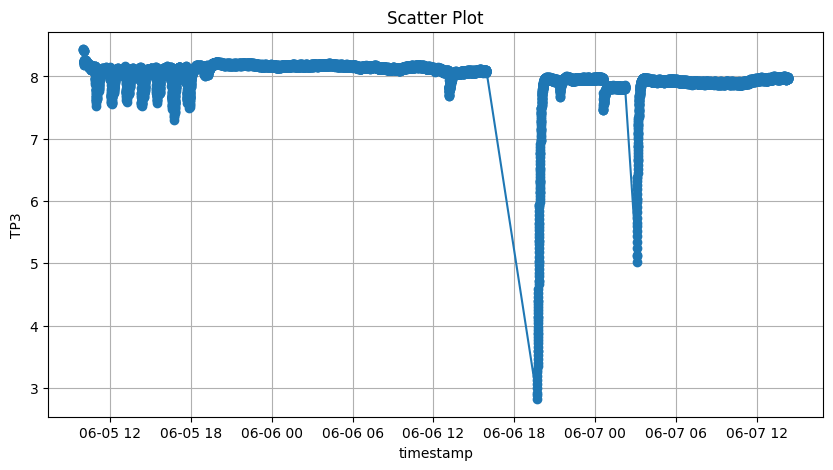

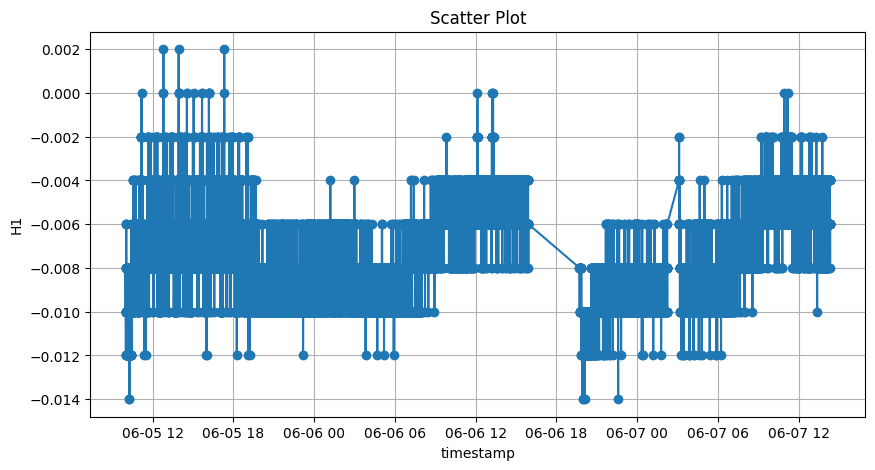

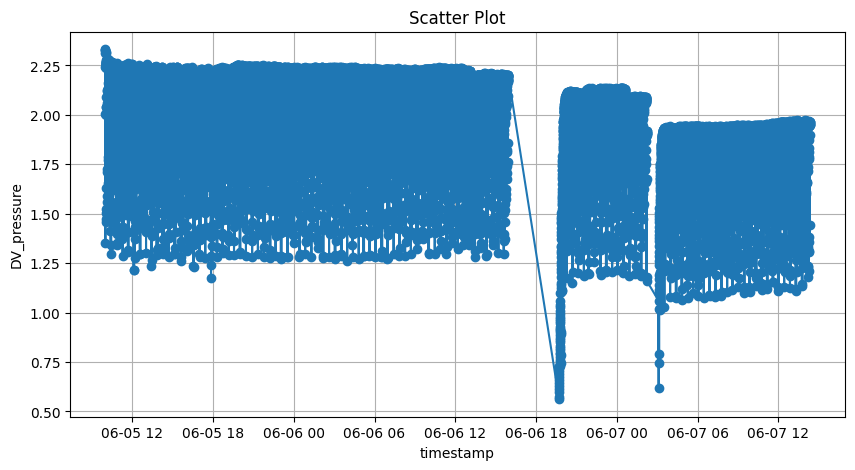

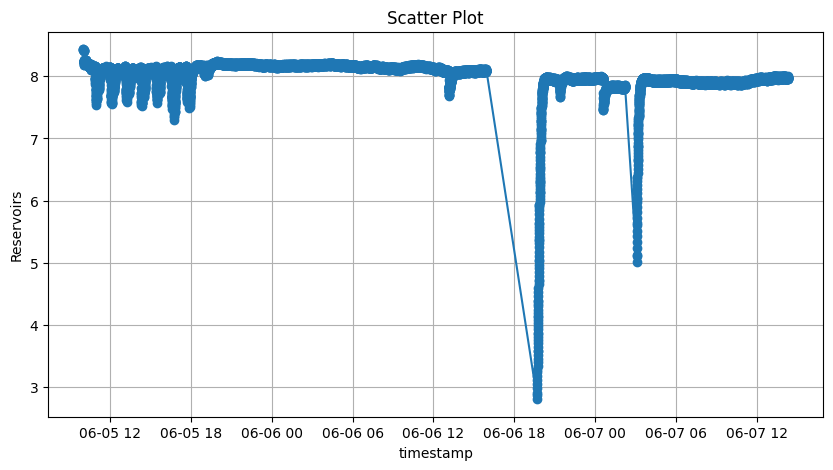

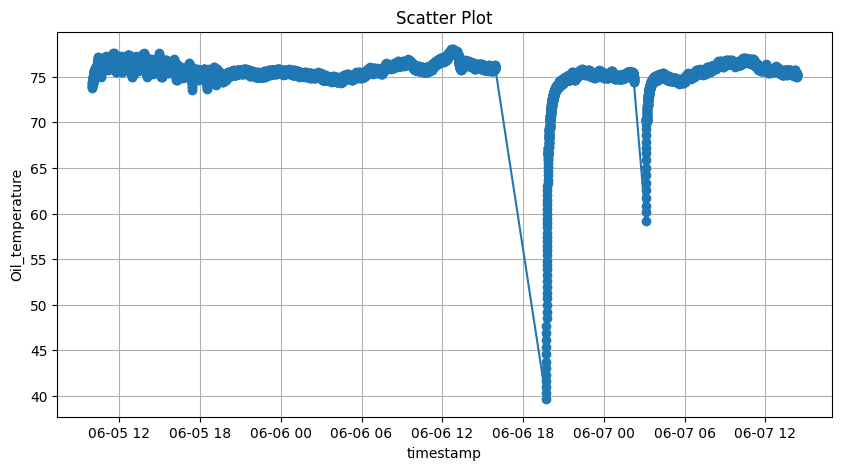

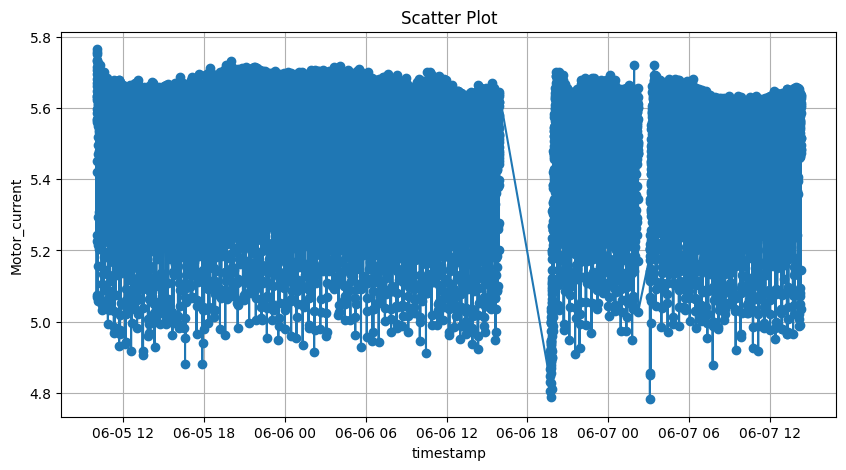

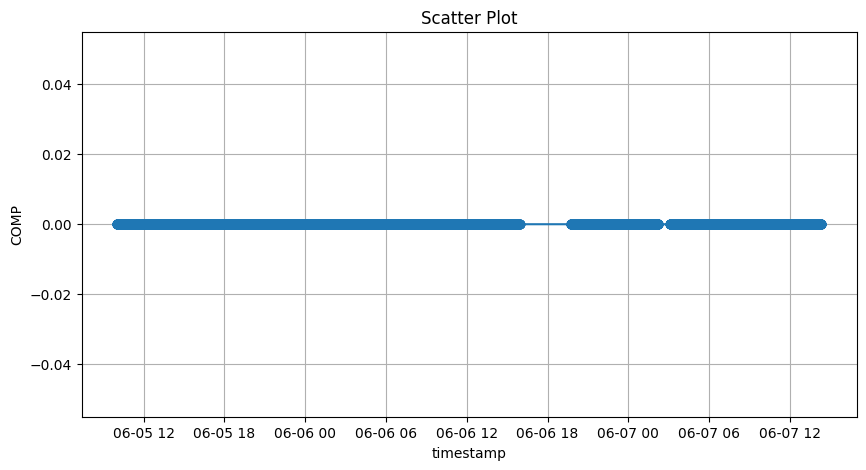

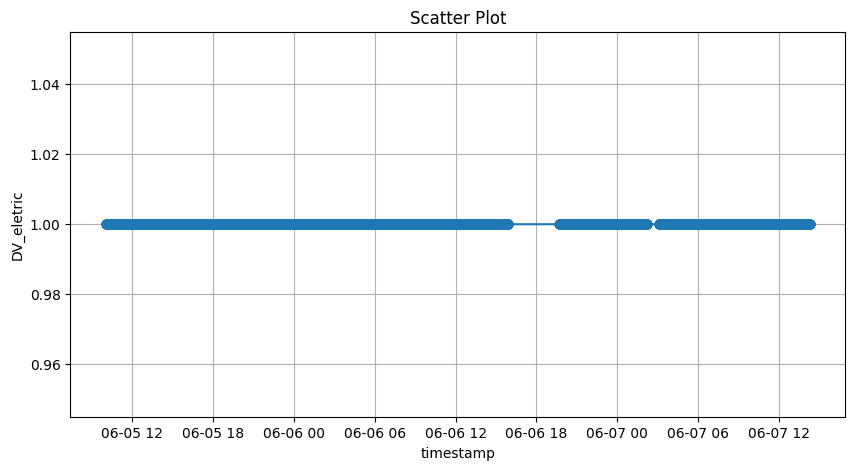

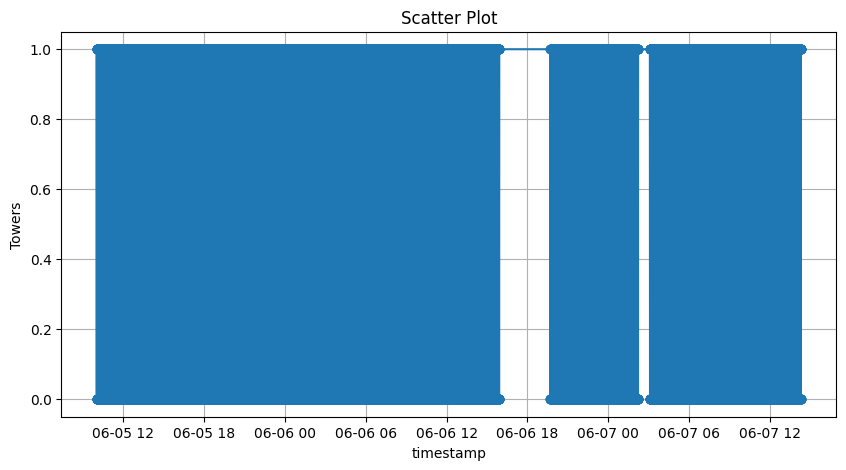

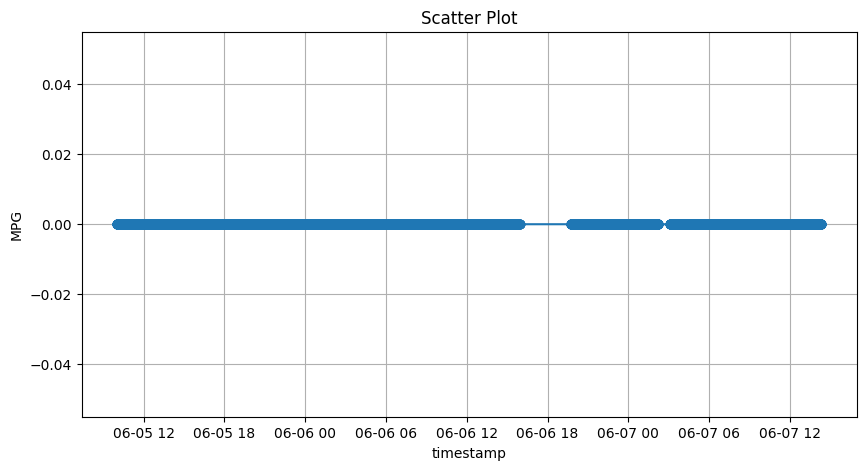

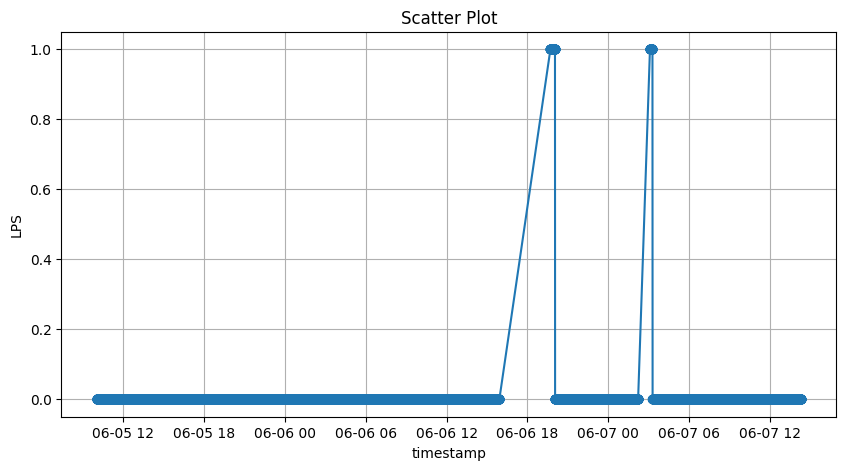

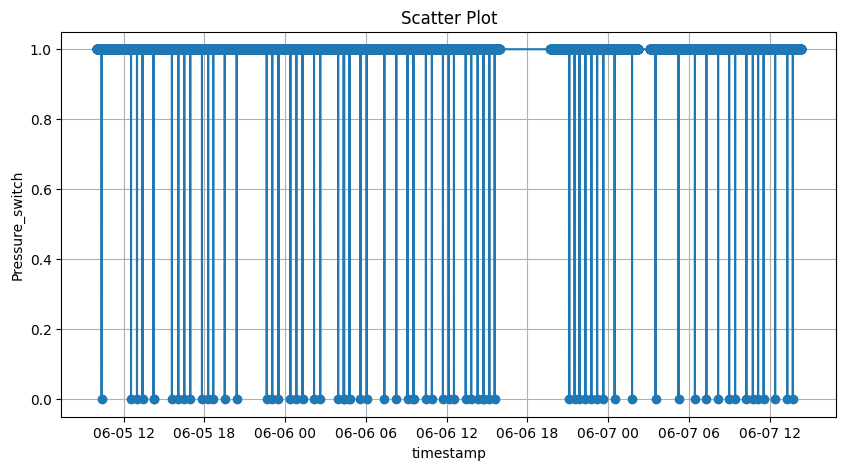

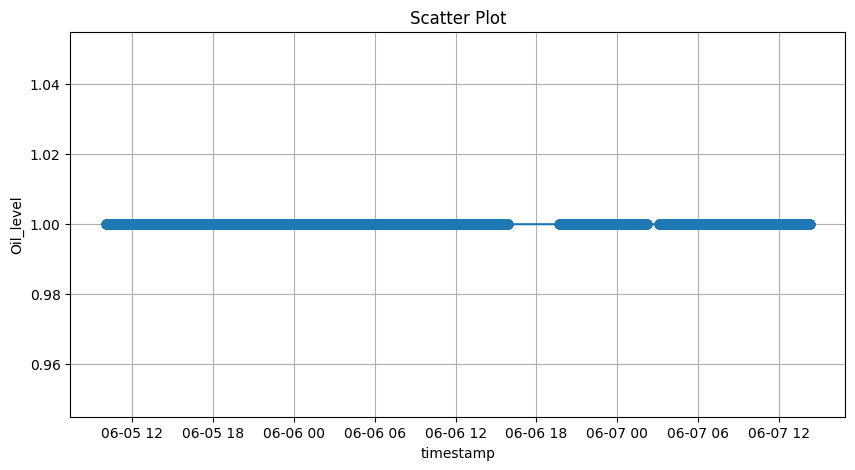

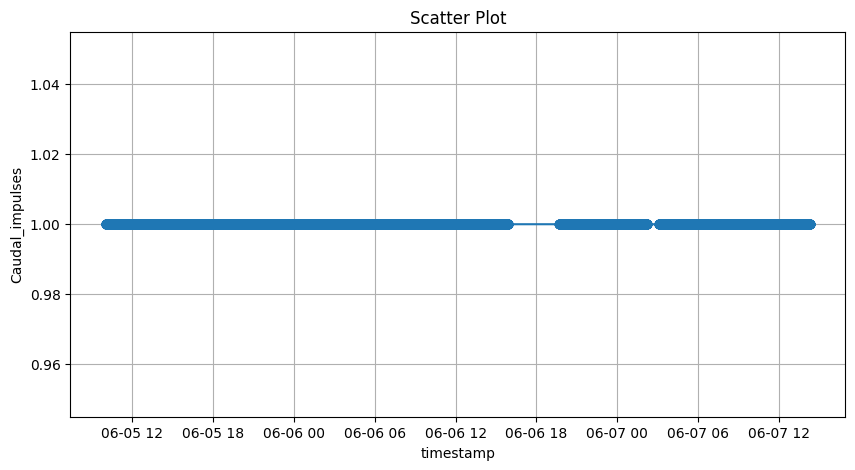

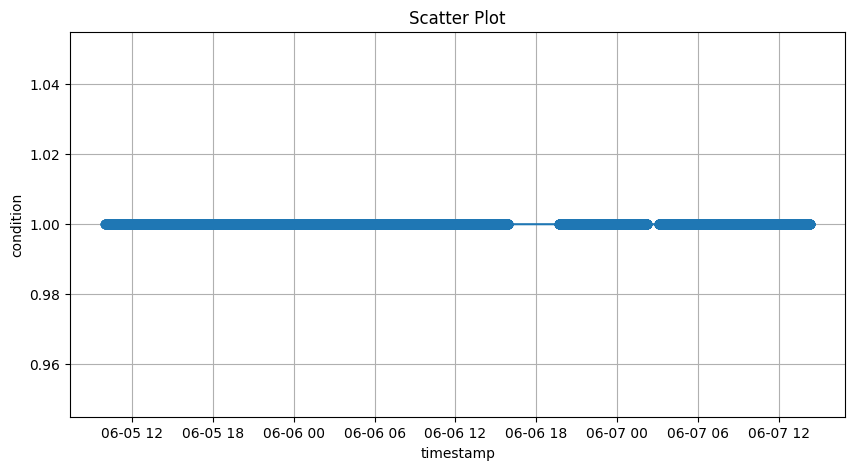

In [16]:
for i in column_names:
    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df2, f3_start, f3_finish), "timestamp", i)

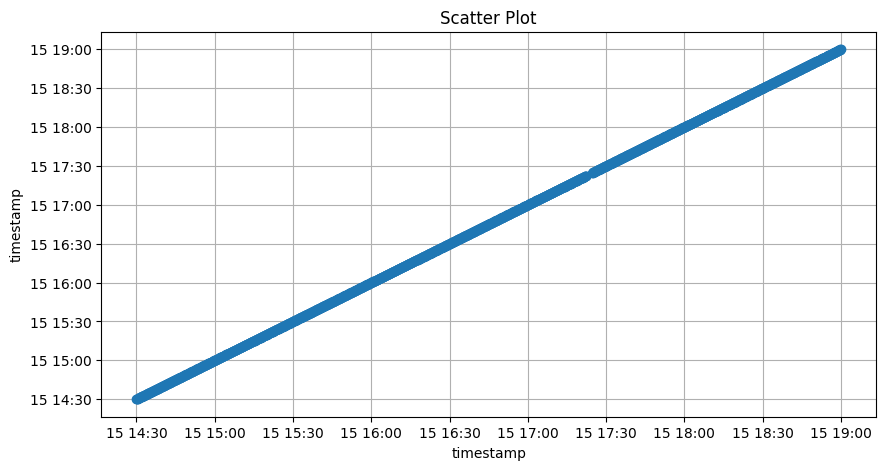

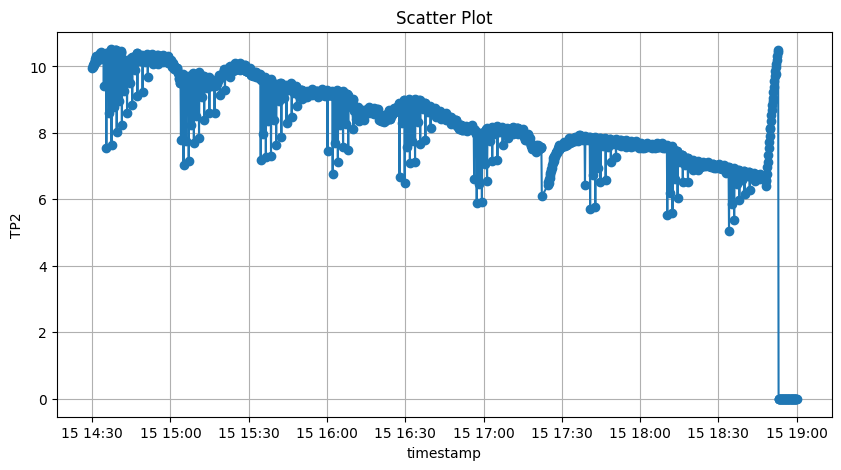

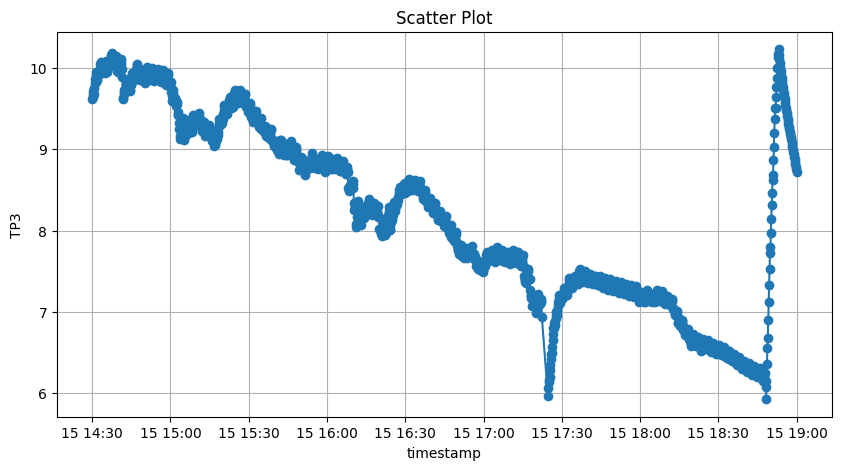

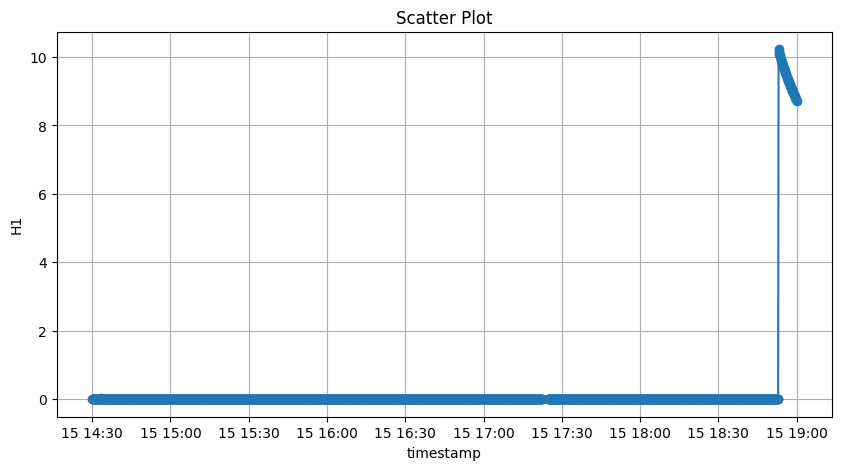

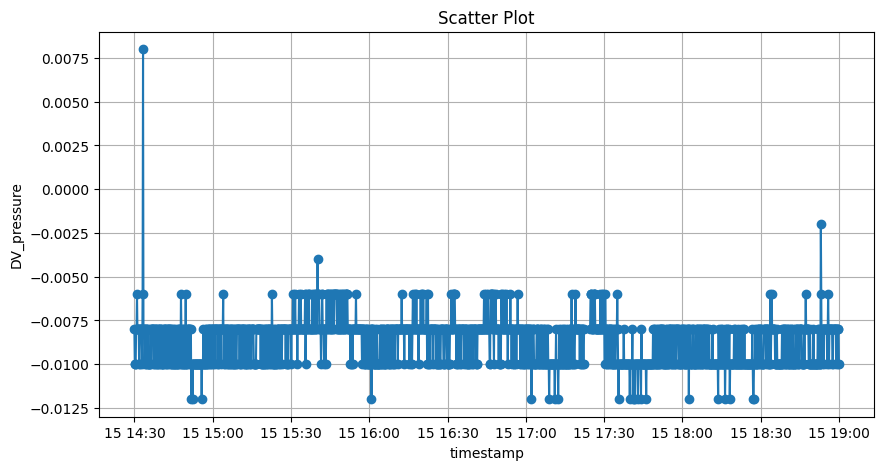

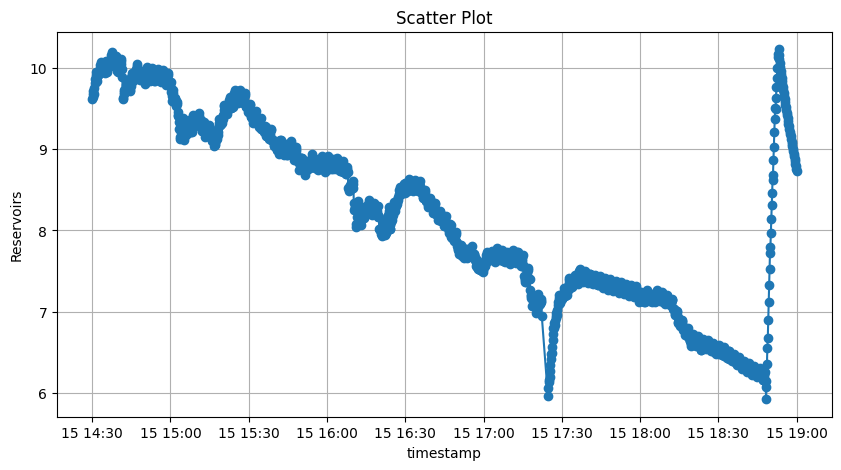

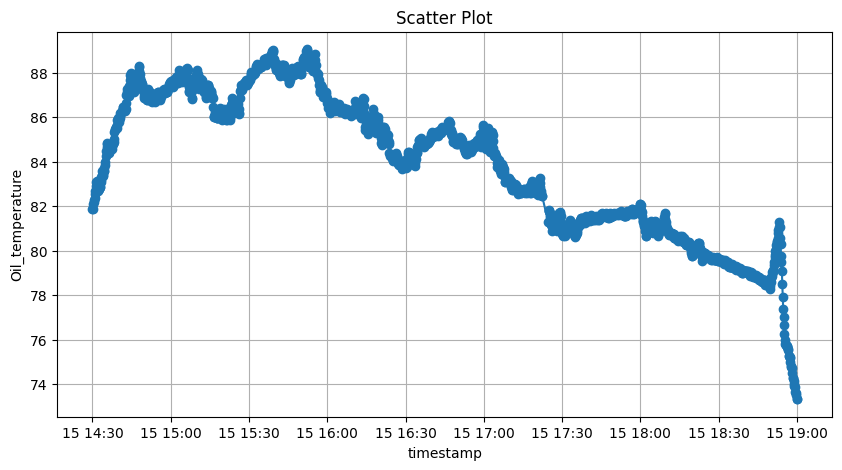

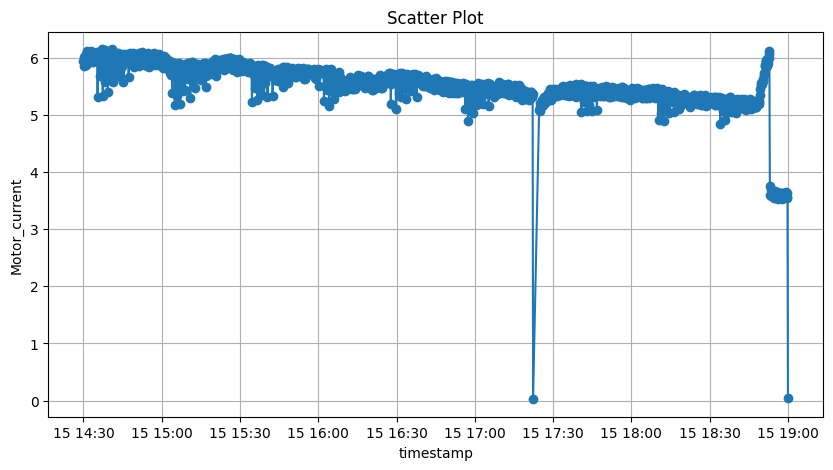

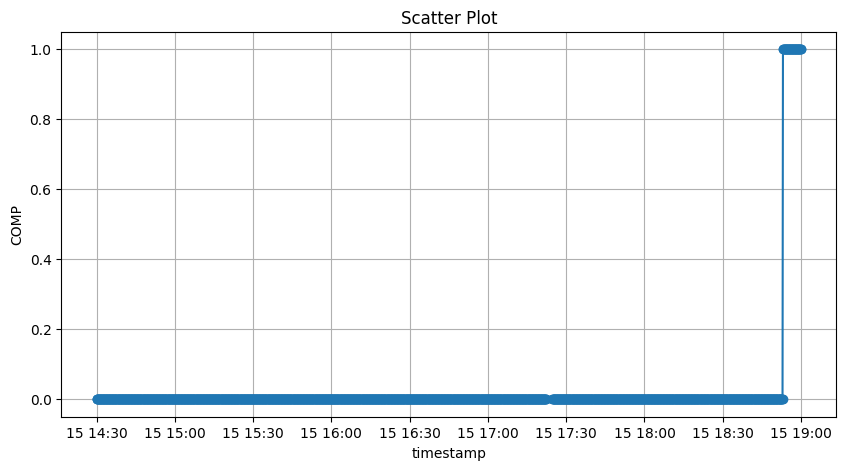

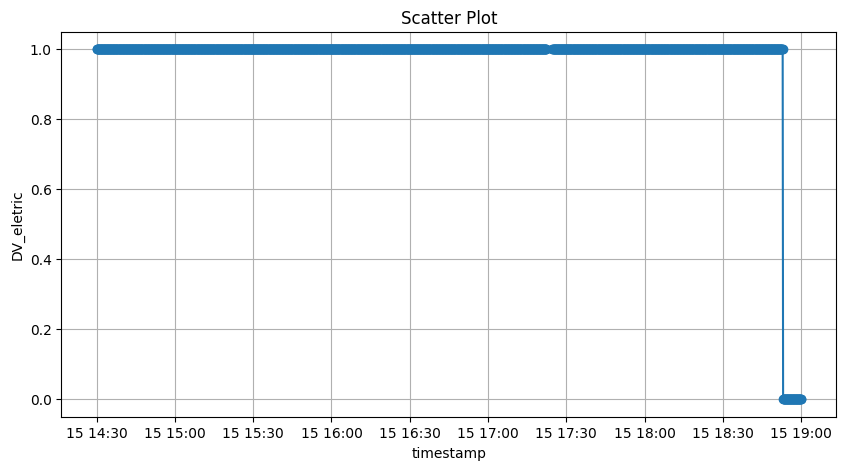

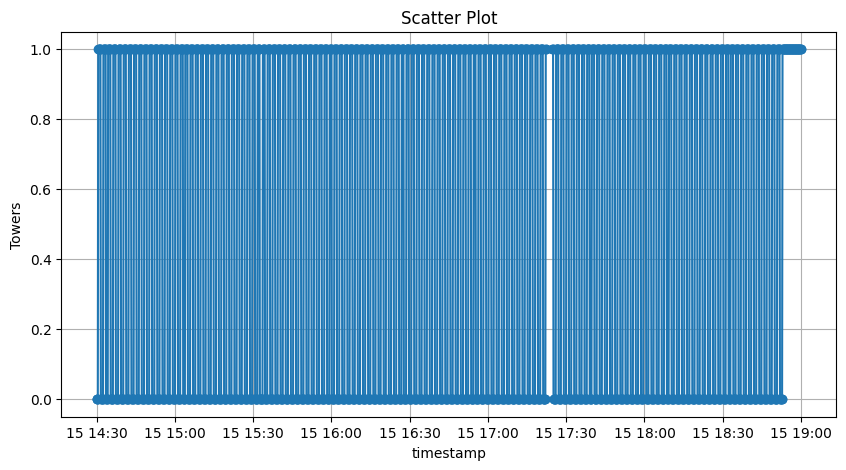

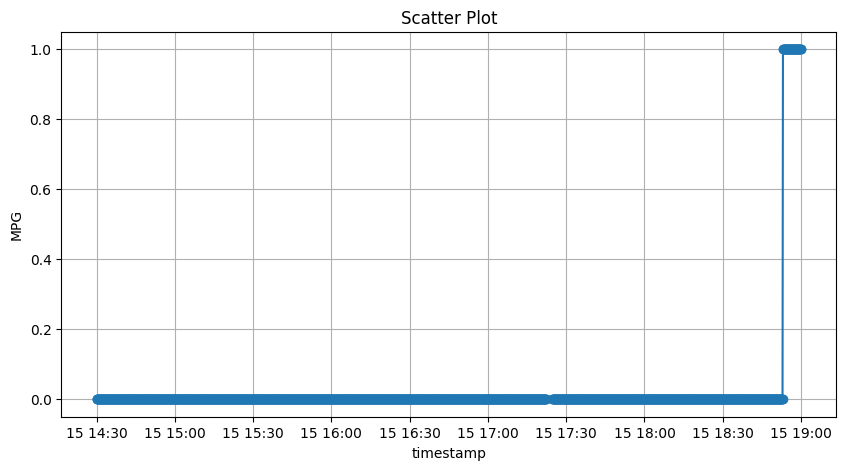

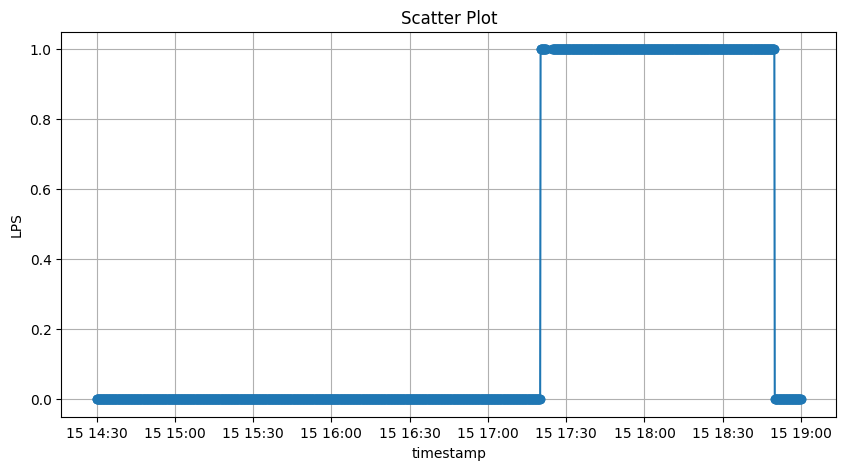

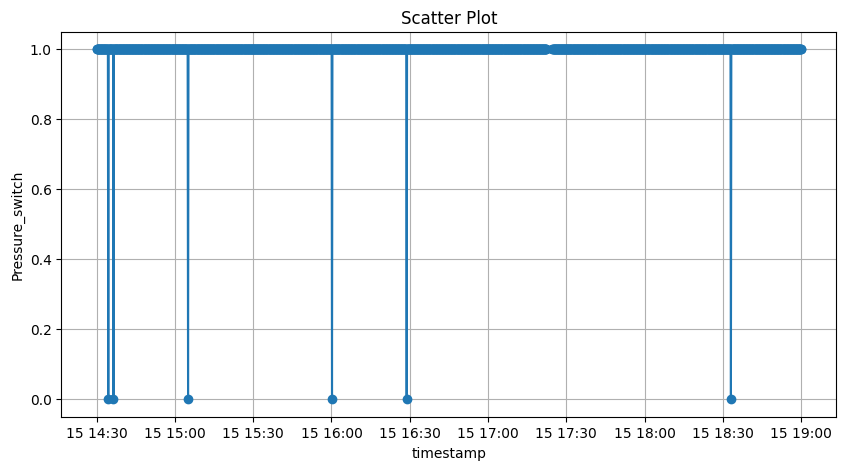

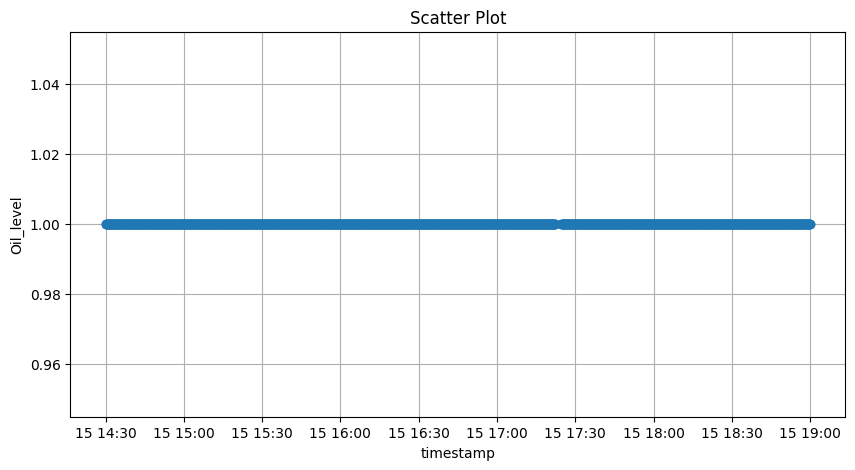

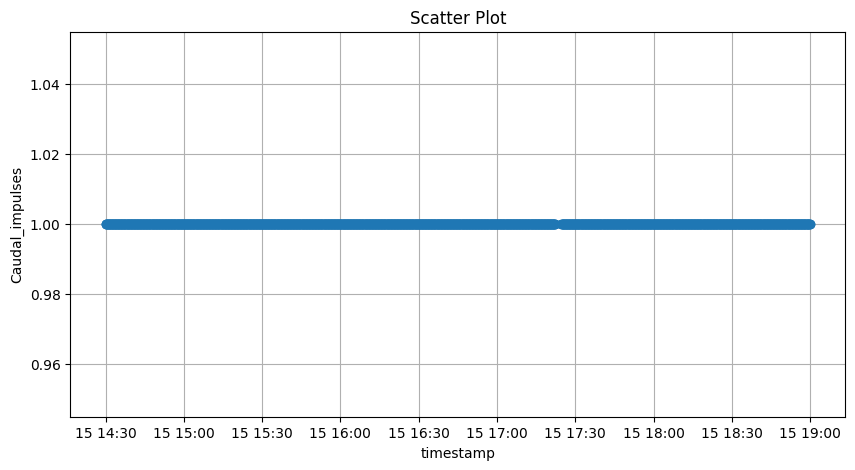

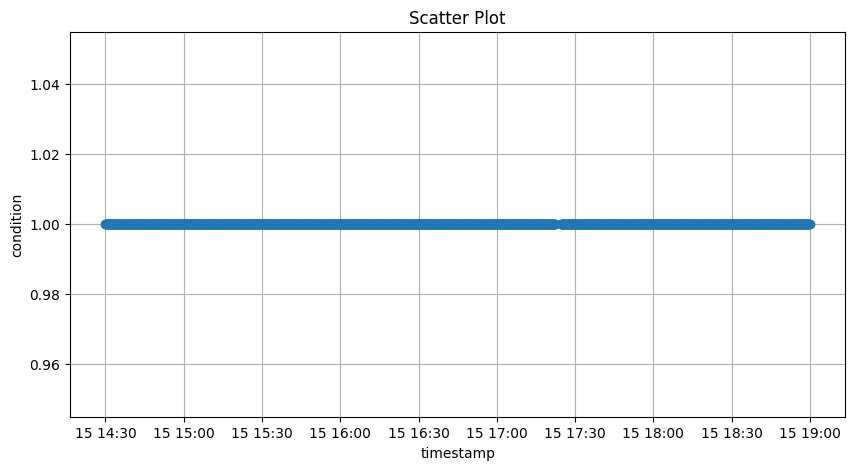

In [17]:
for i in column_names:
    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df2, f4_start, f4_finish), "timestamp", i)

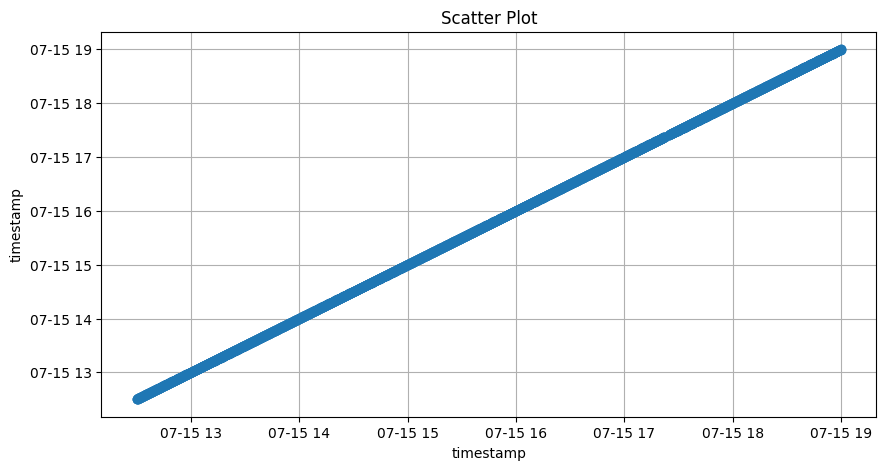

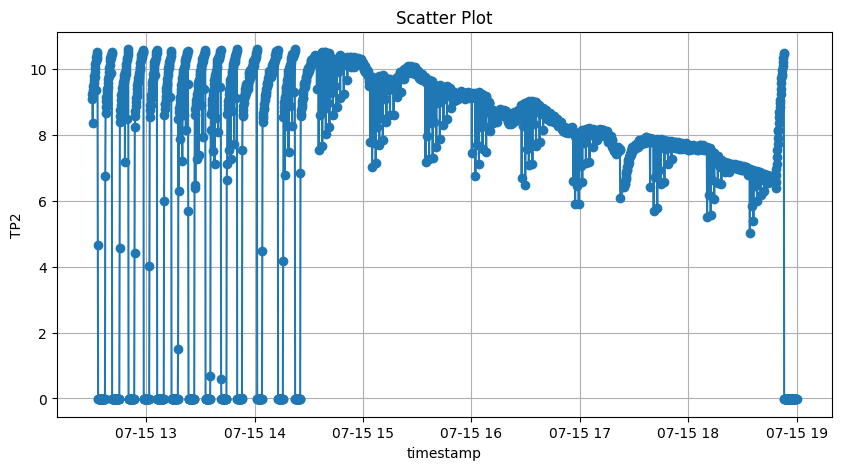

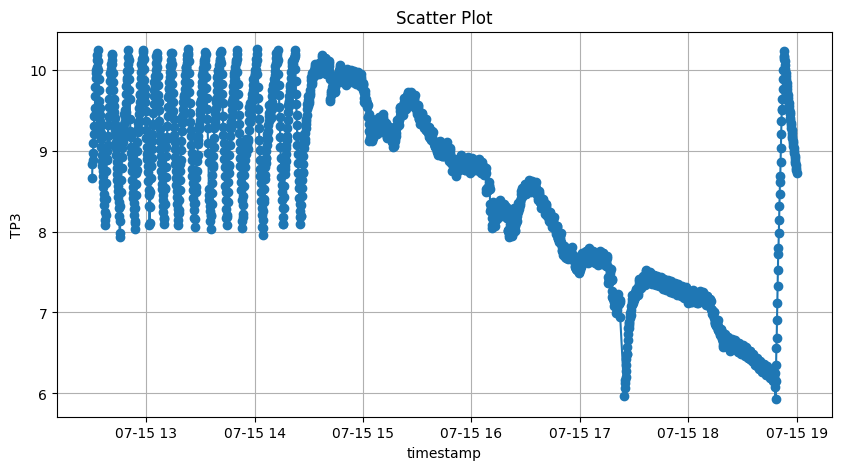

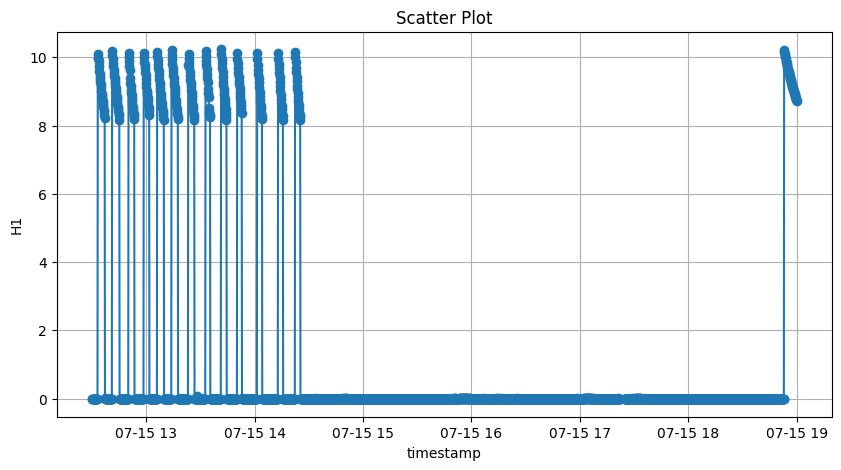

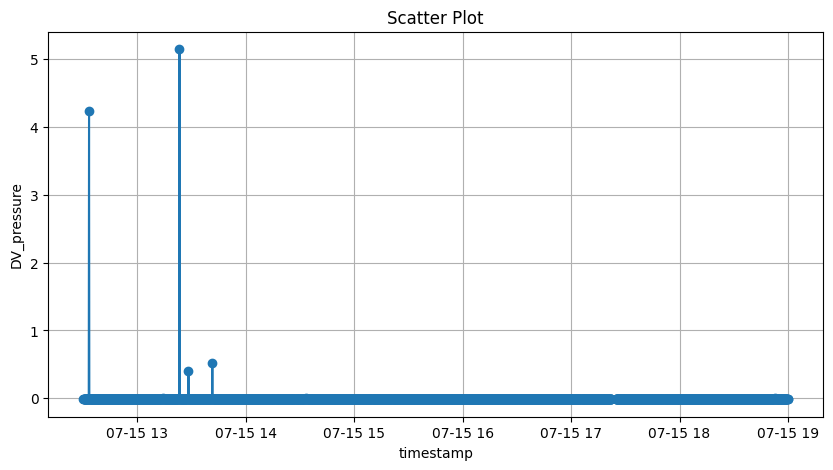

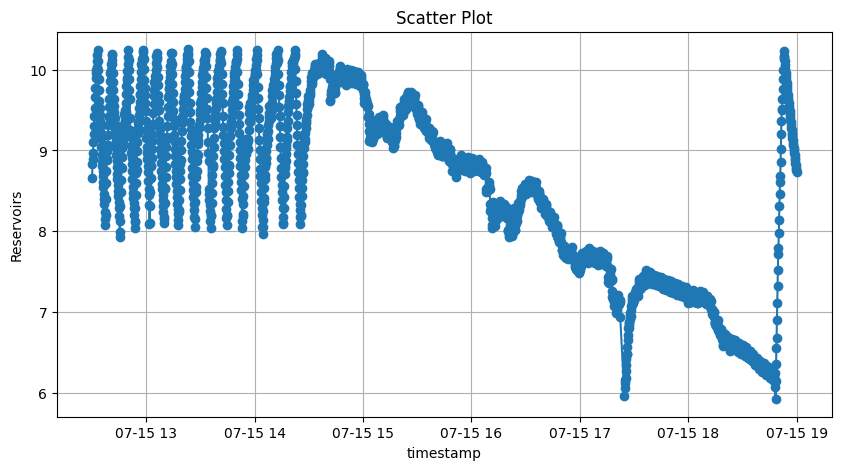

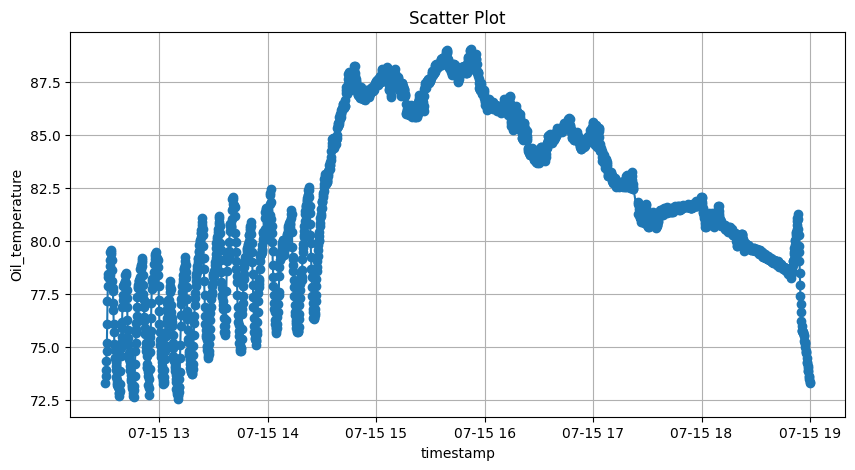

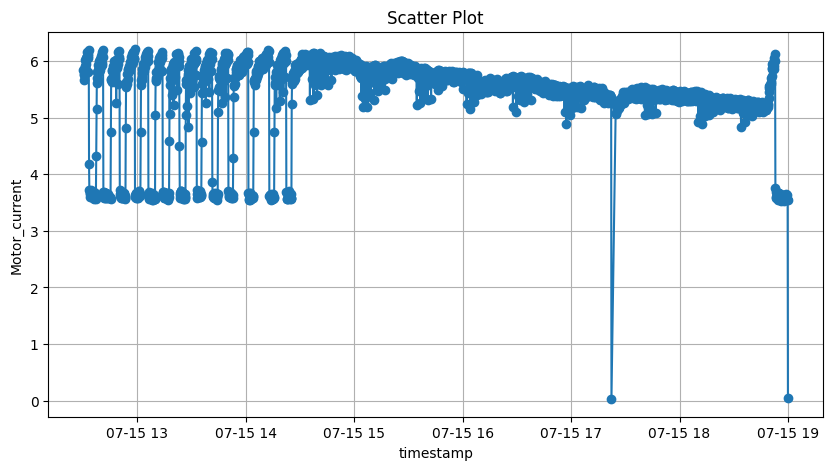

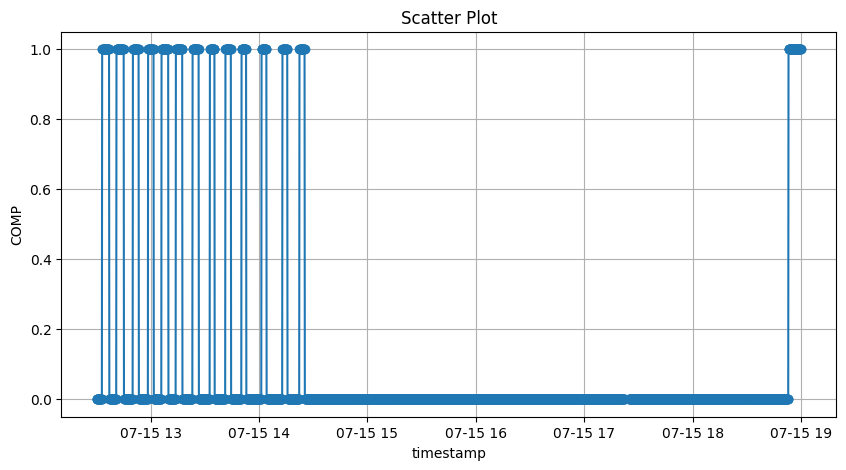

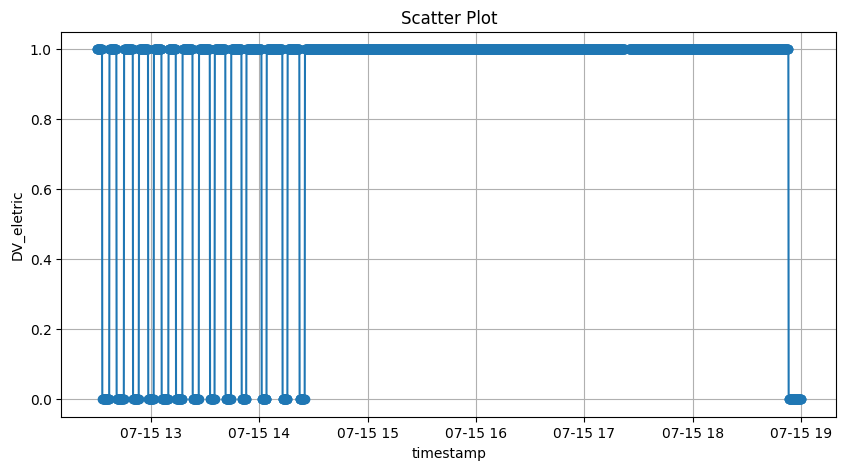

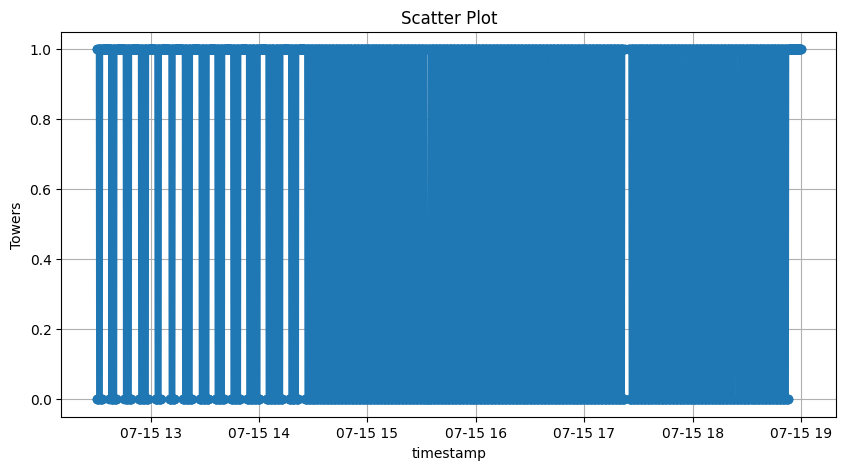

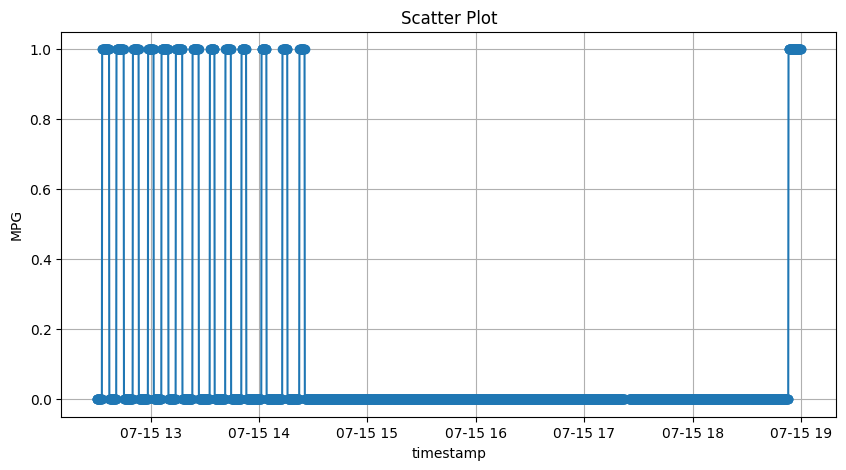

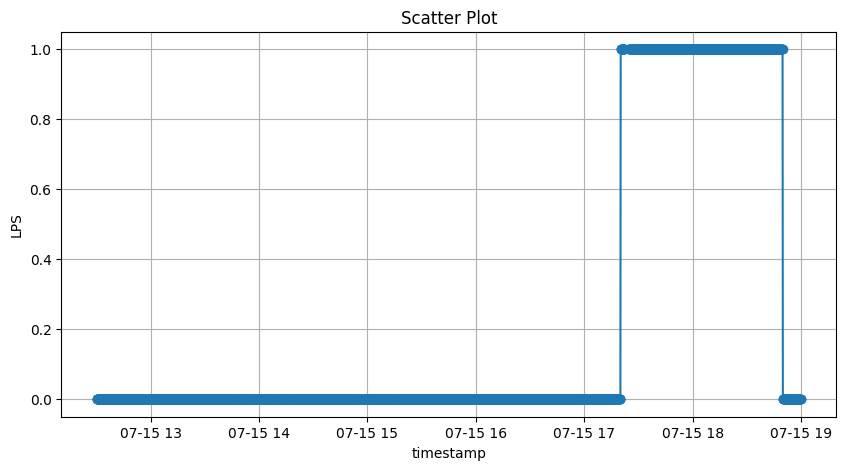

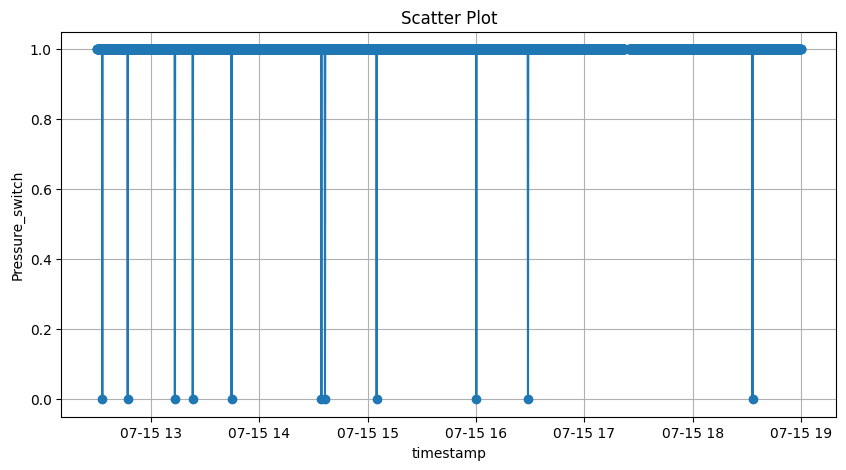

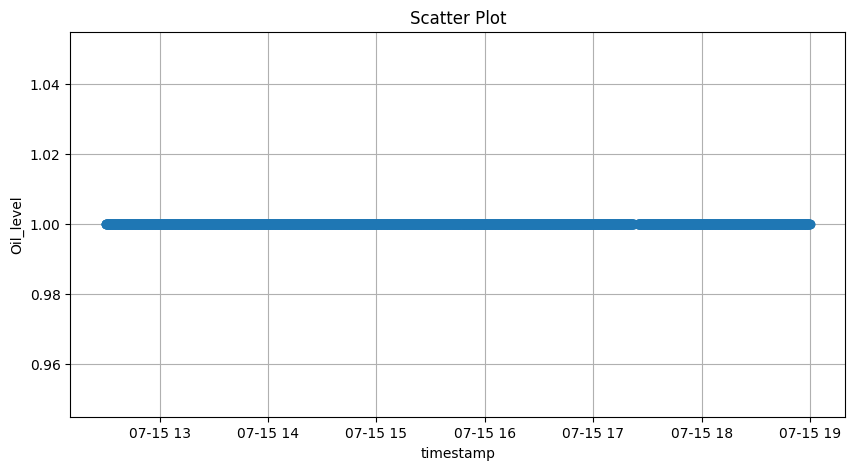

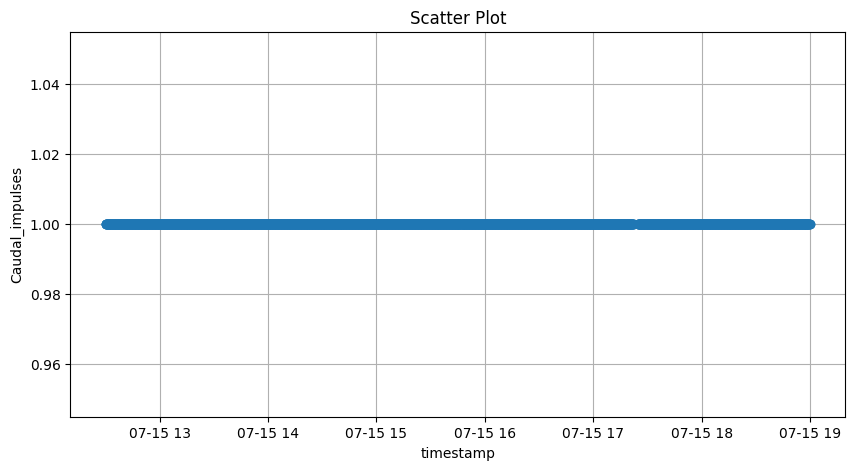

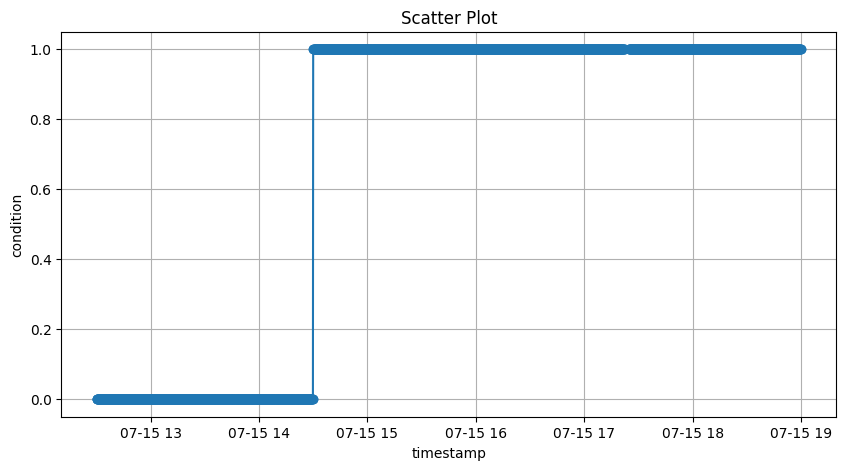

In [19]:
# I am also looking to the values before the faiulue occurs

for i in column_names:
    mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df2, "2020-07-15 12:30:00", f4_finish), "timestamp", i)

In [52]:
df3a = mpt.change_the_values_by_applying_a_time_filter(df2, "2020-04-17 22:30:00" ,f1_start, "condition", 2 )
df3b = mpt.change_the_values_by_applying_a_time_filter(df3a, "2020-05-29 22:00:00" ,f2_start, "condition", 2 )
df3c = mpt.change_the_values_by_applying_a_time_filter(df3b, "2020-06-05 08:30:00" ,f3_start, "condition", 2 )
df3 = mpt.change_the_values_by_applying_a_time_filter(df3c, "2020-07-15 13:00:00" ,f4_start, "condition", 2 )

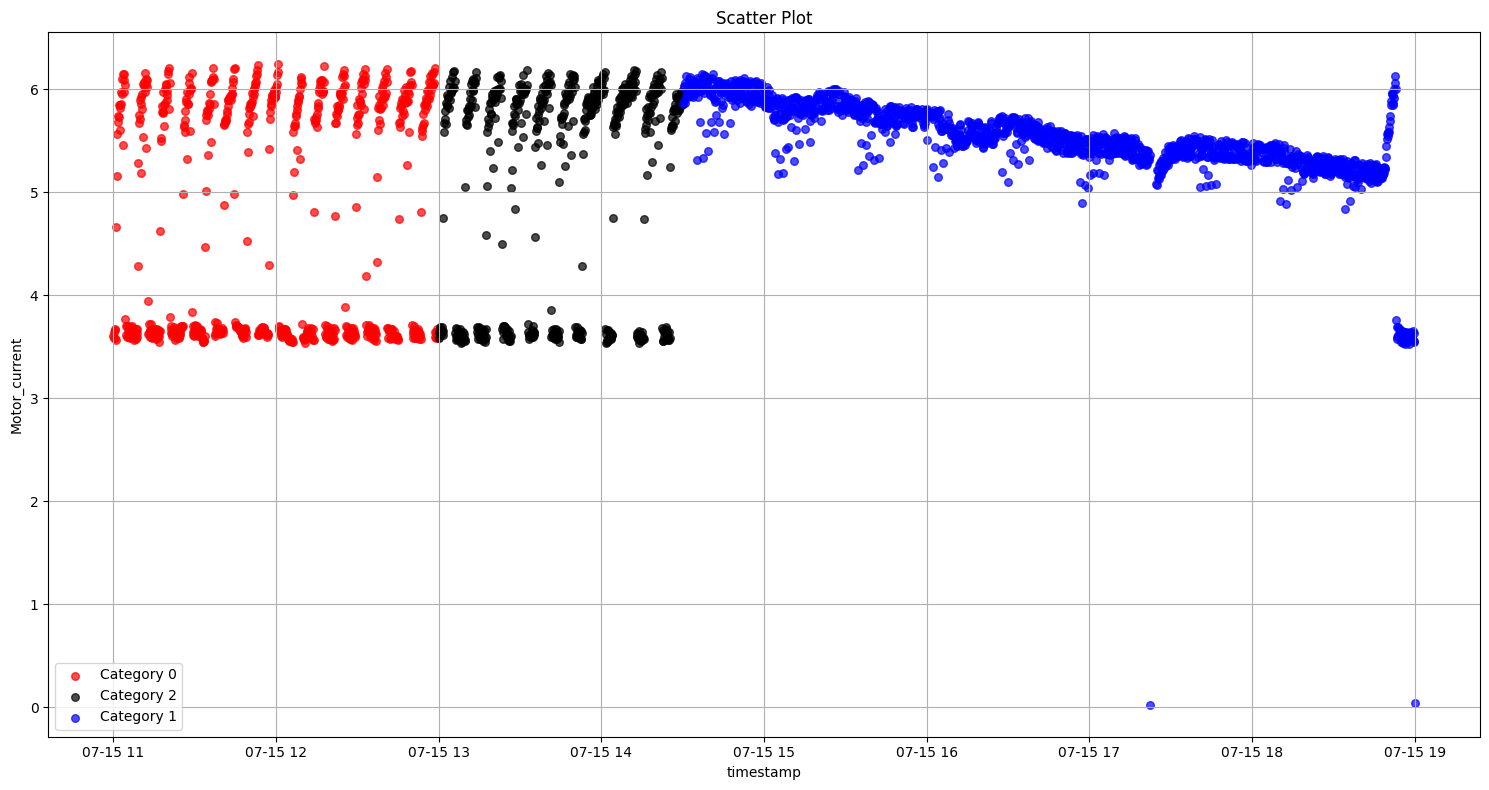

In [53]:
mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df3, "2020-07-15 11:00:00", "2020-07-15 19:00:00"), "timestamp", "Motor_current", "condition")

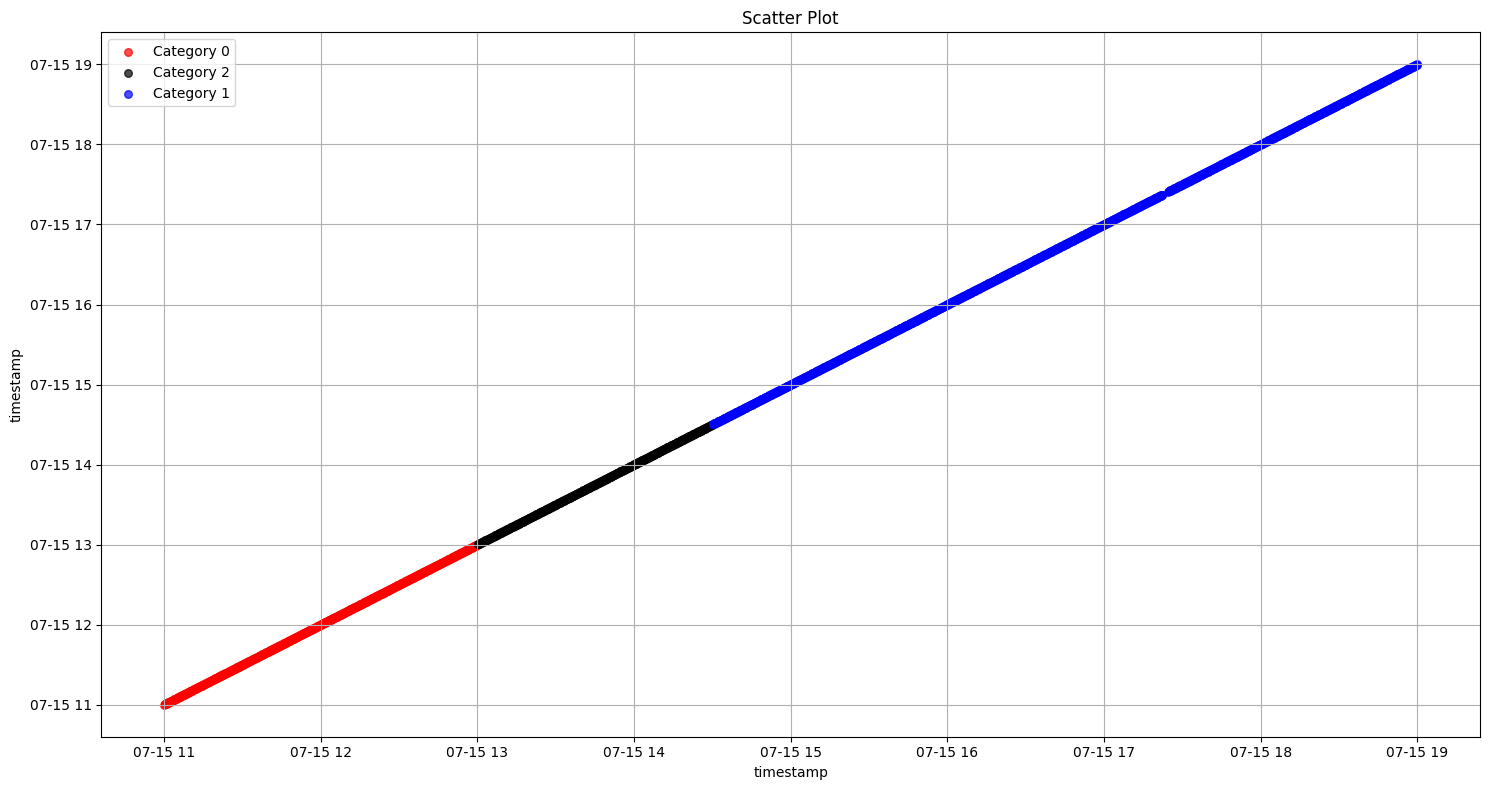

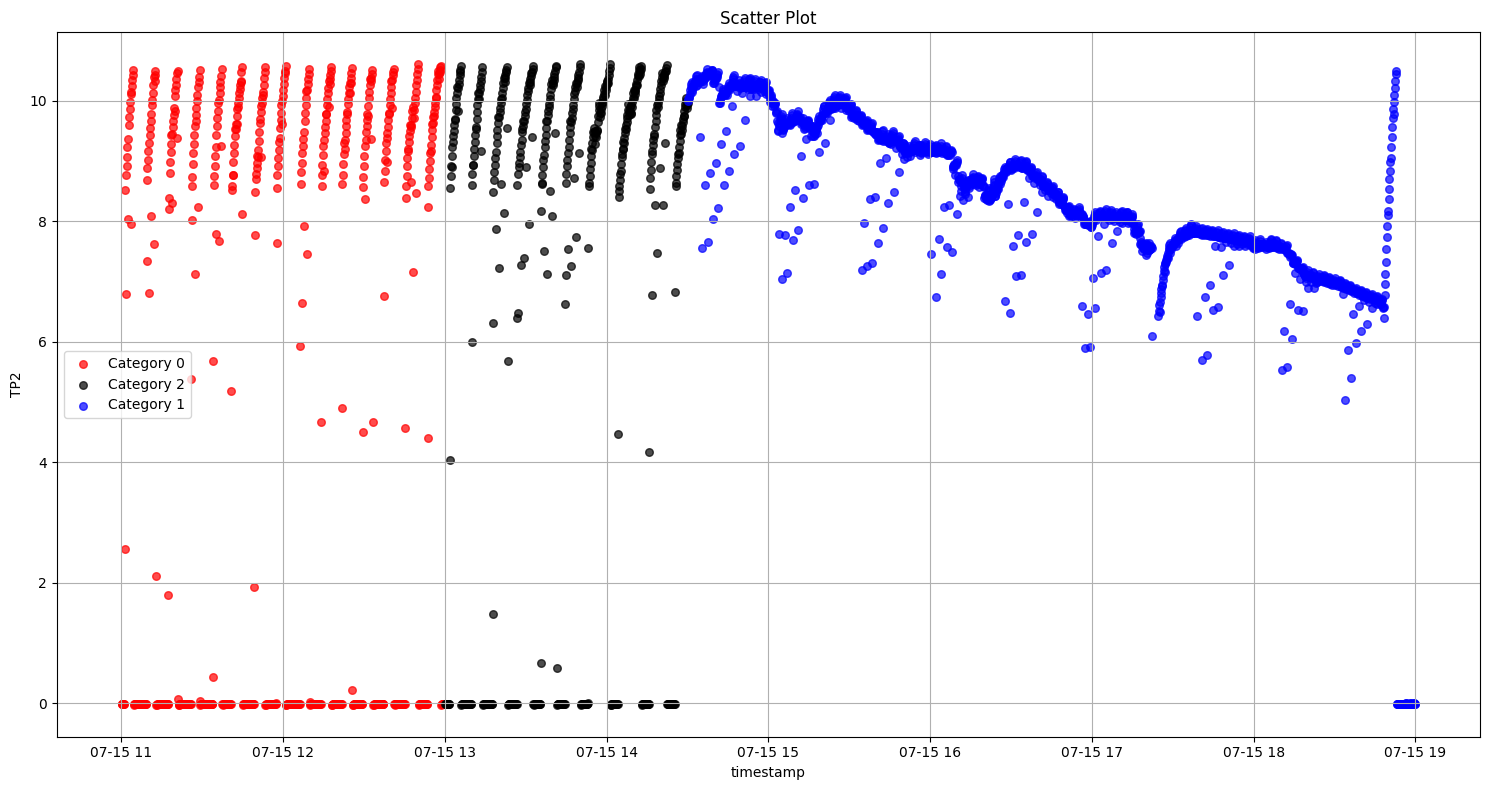

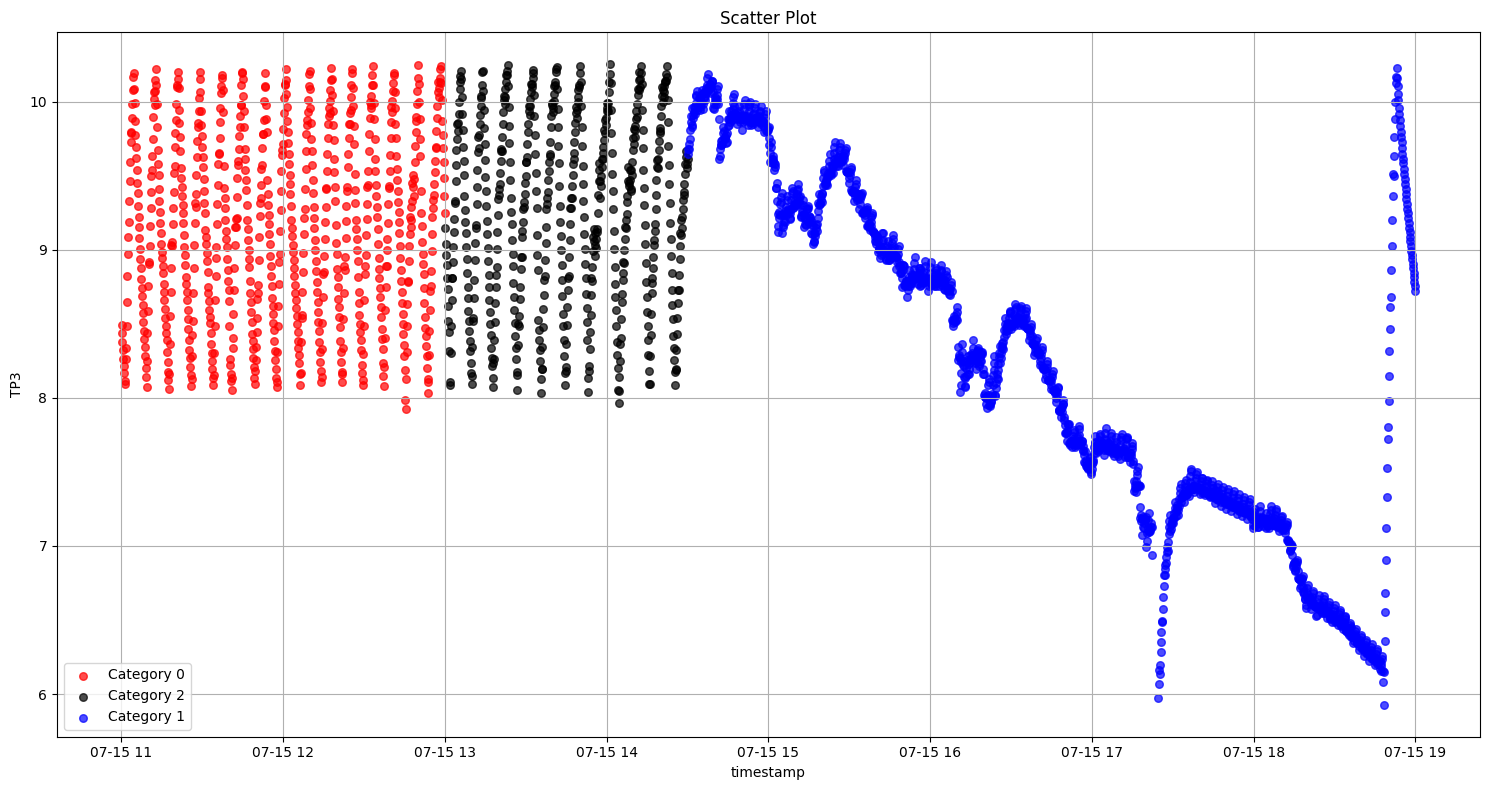

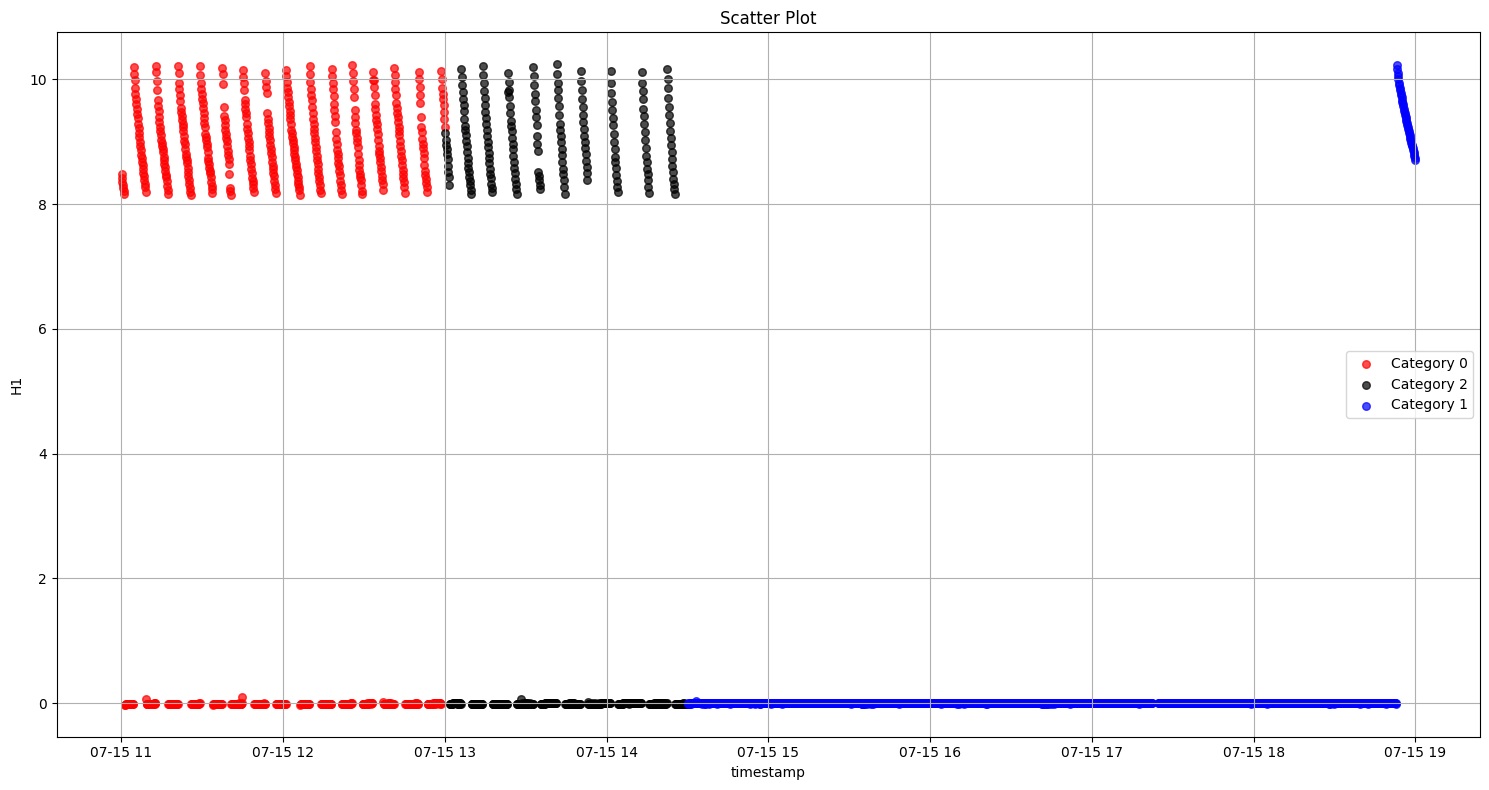

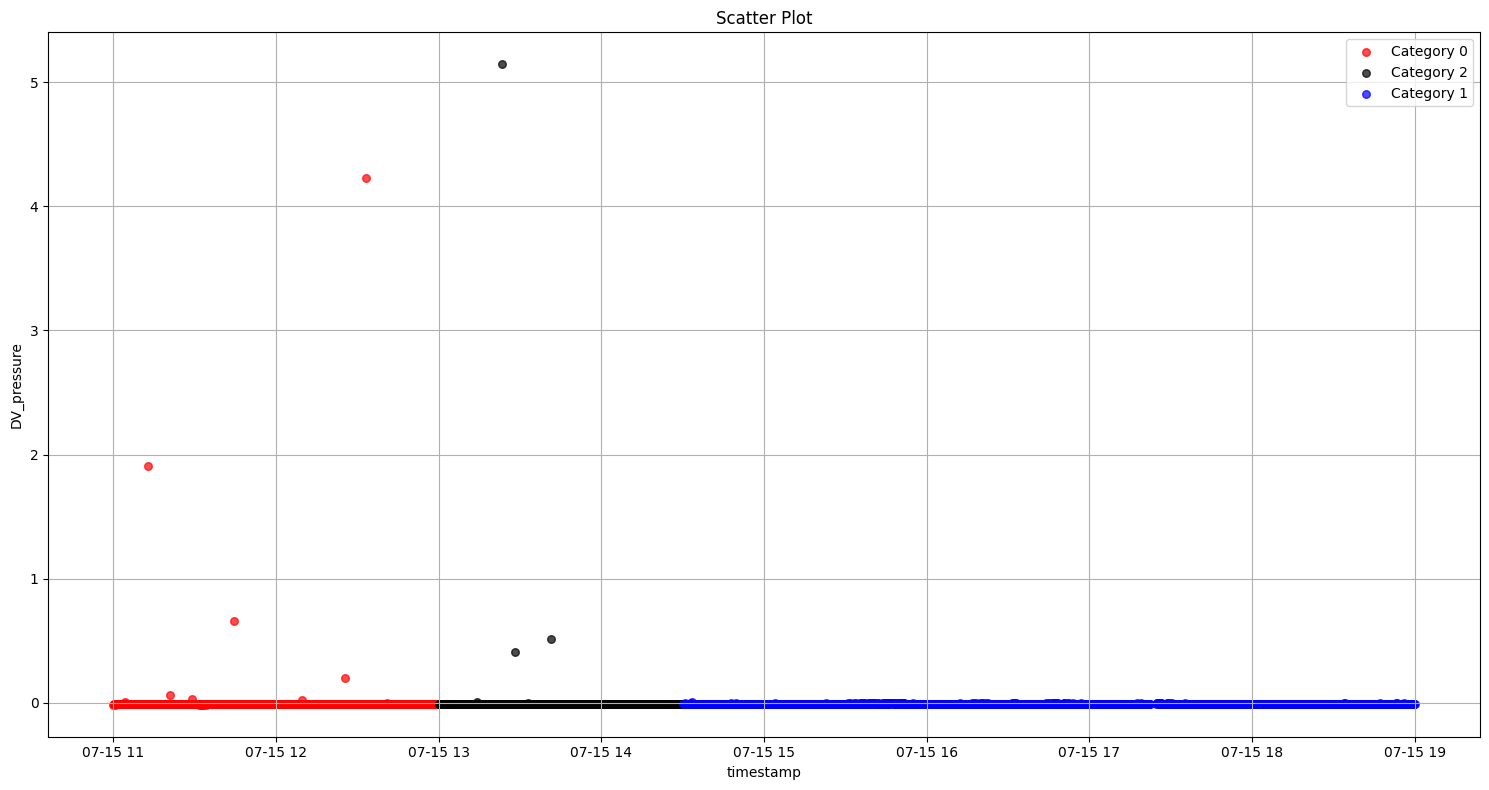

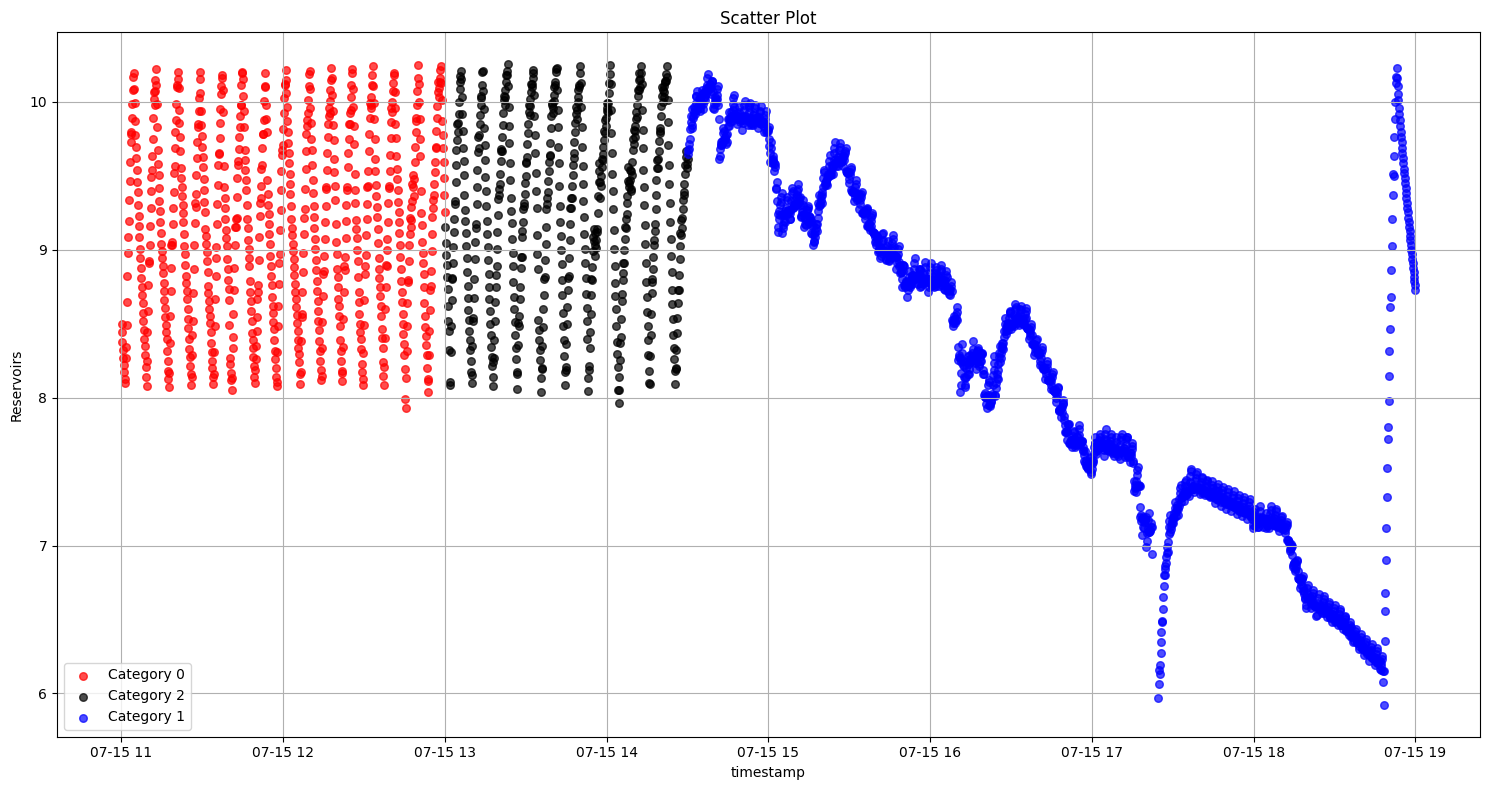

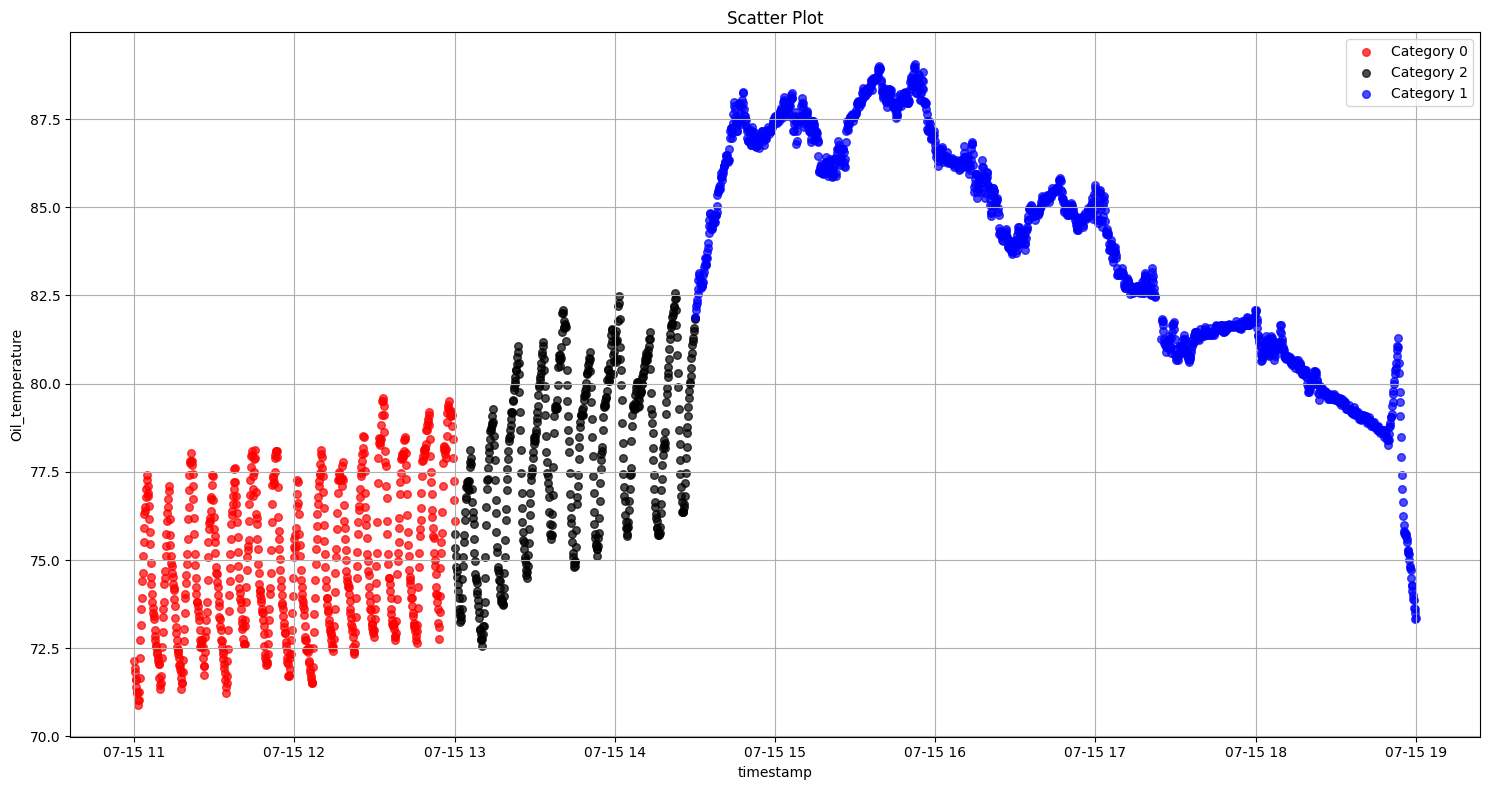

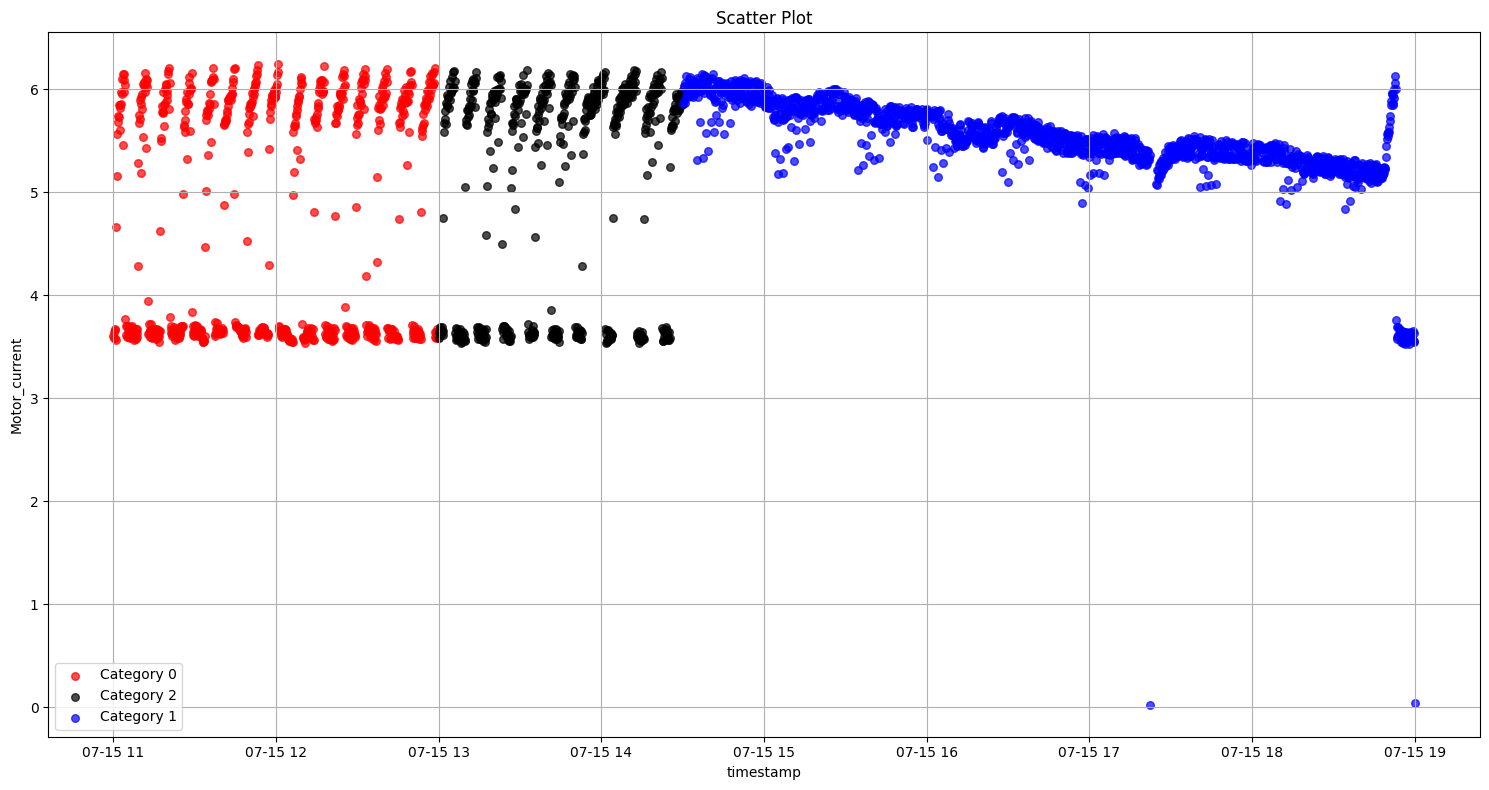

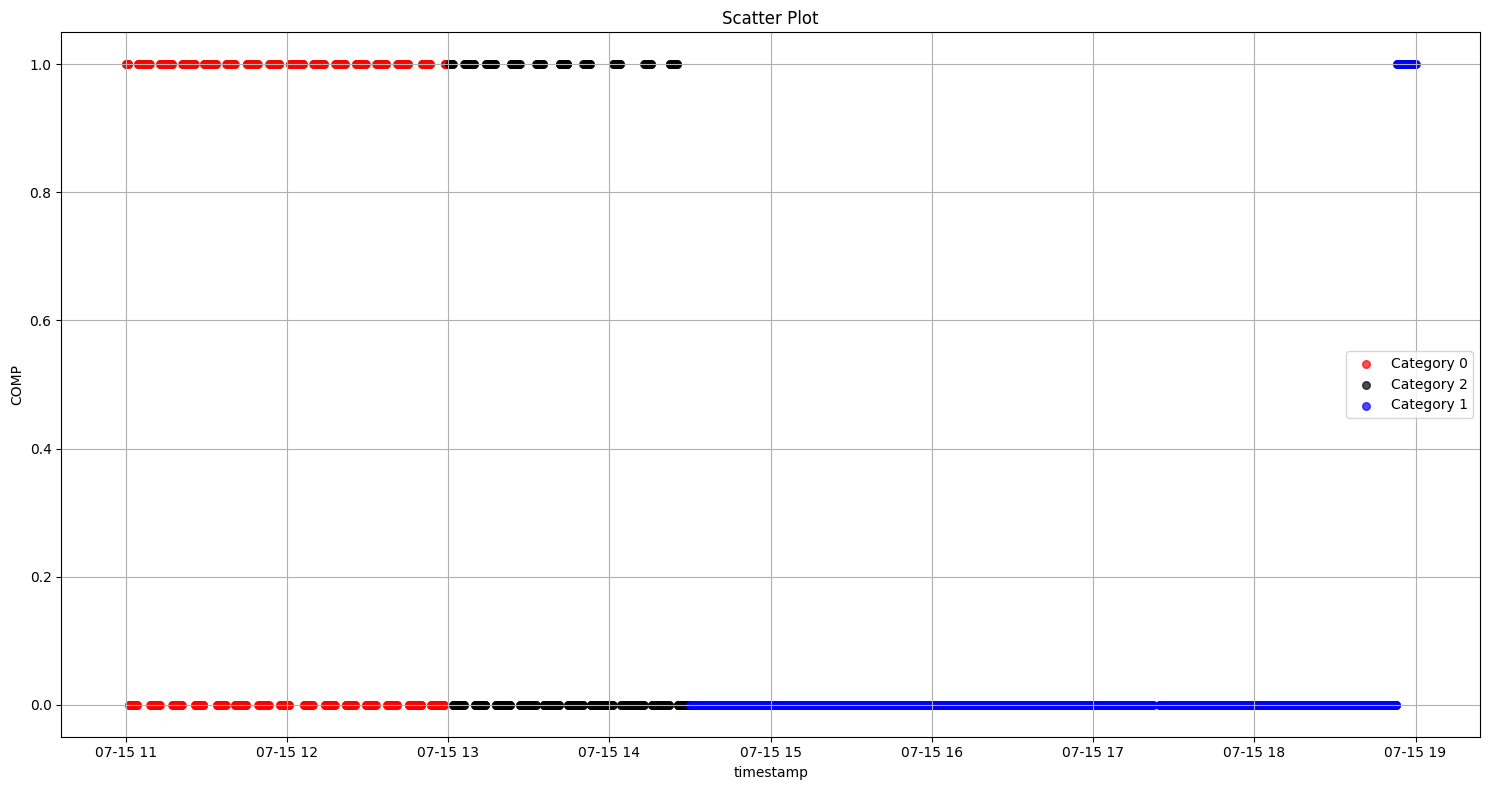

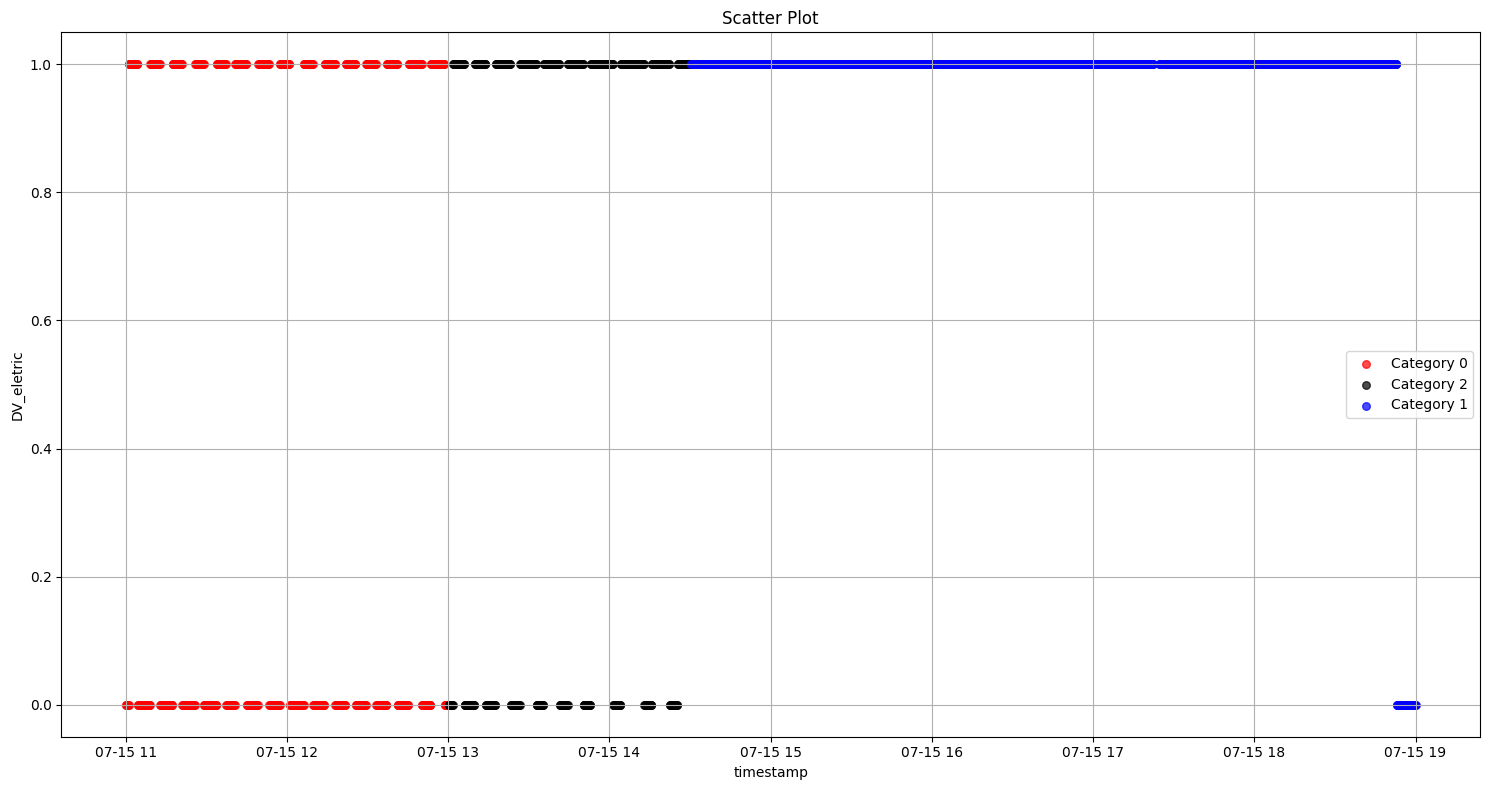

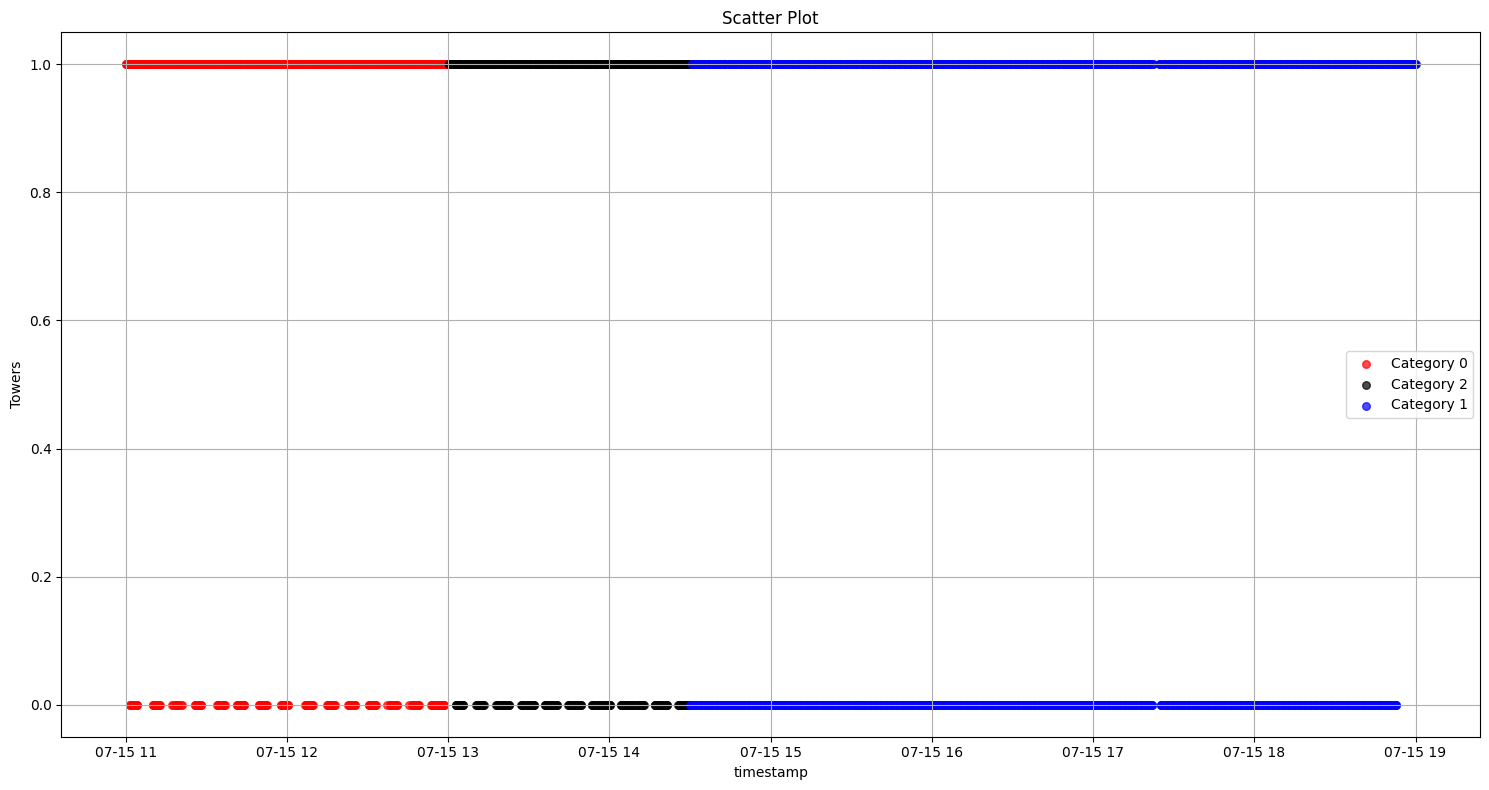

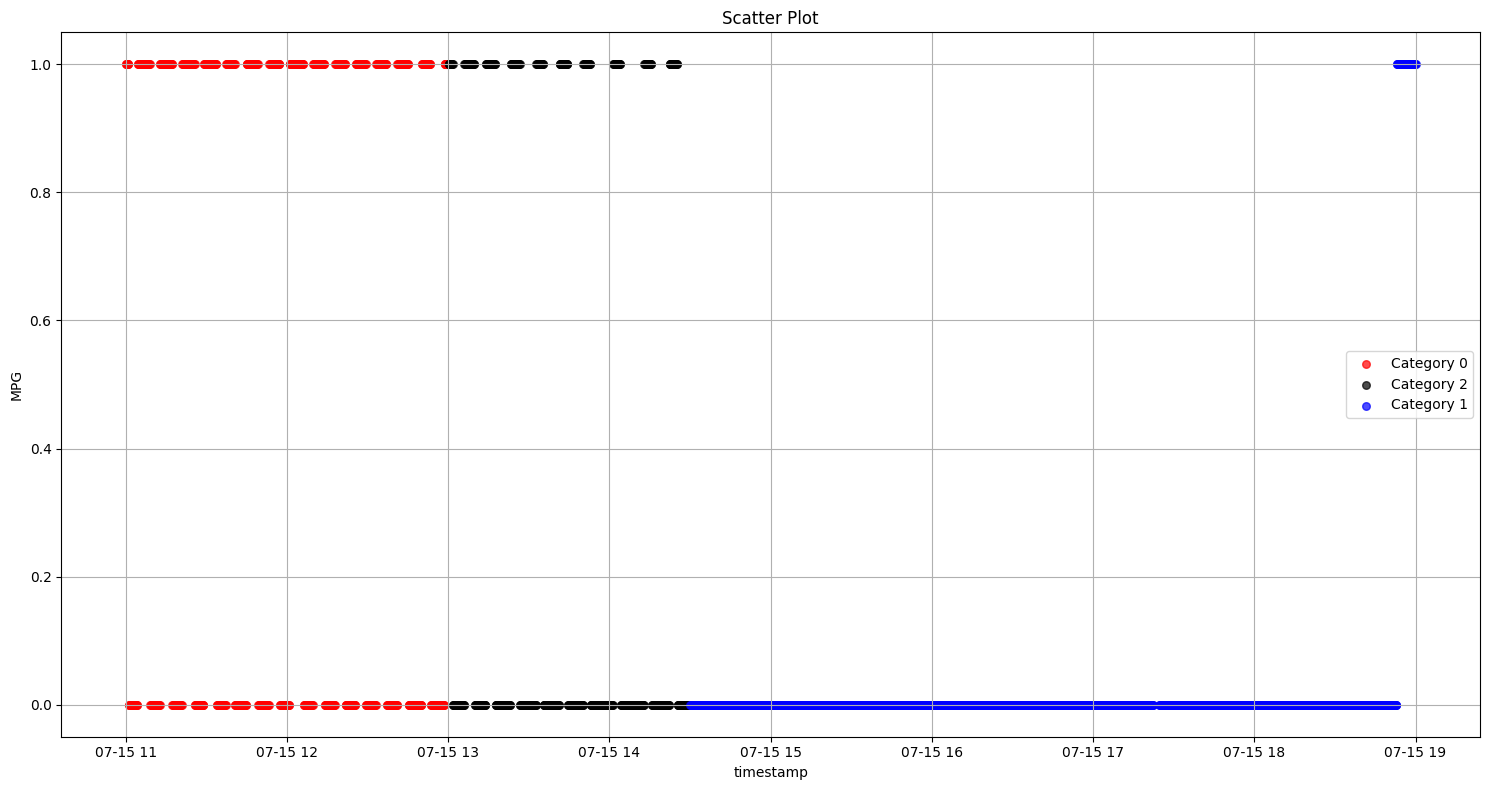

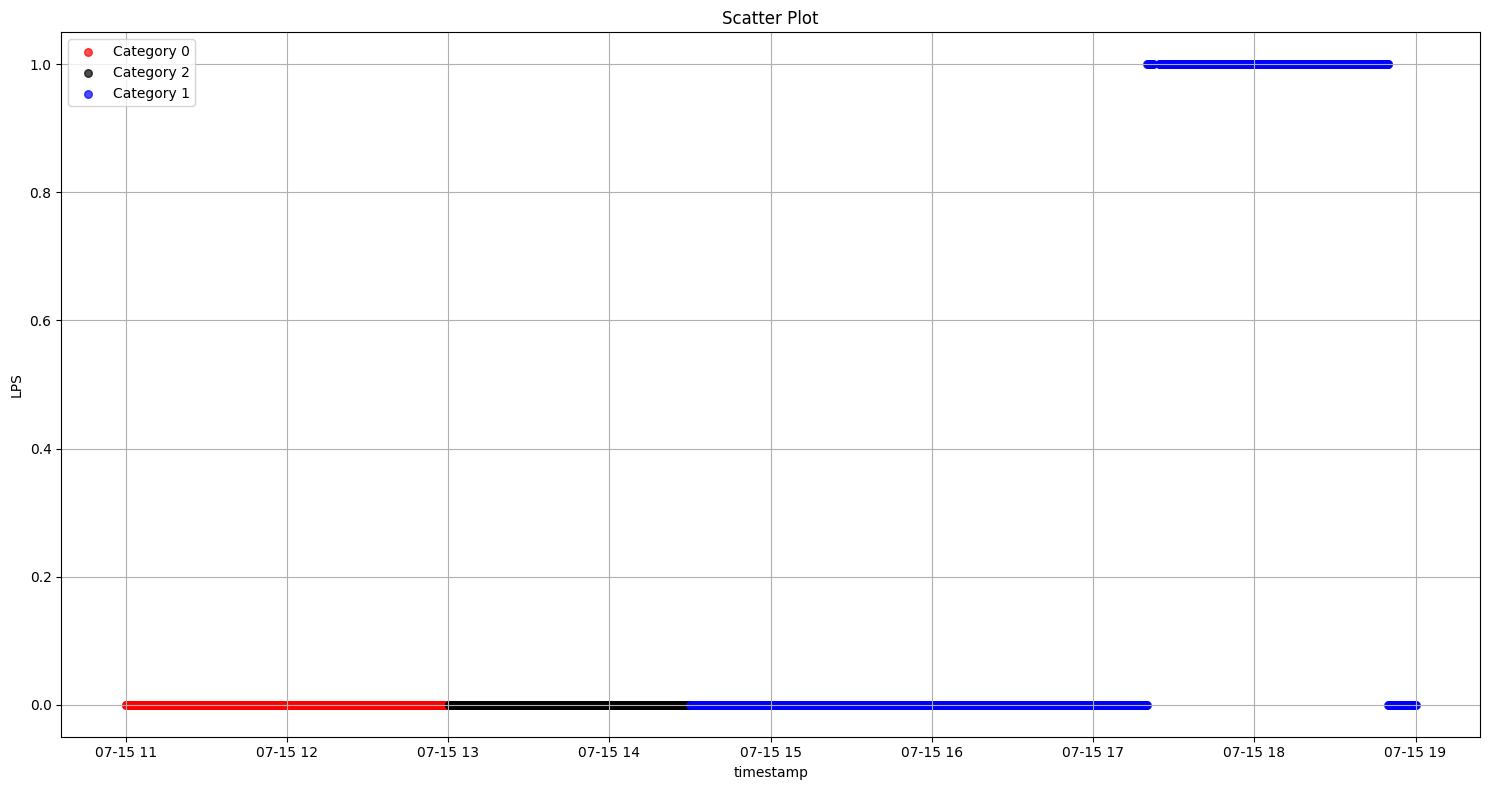

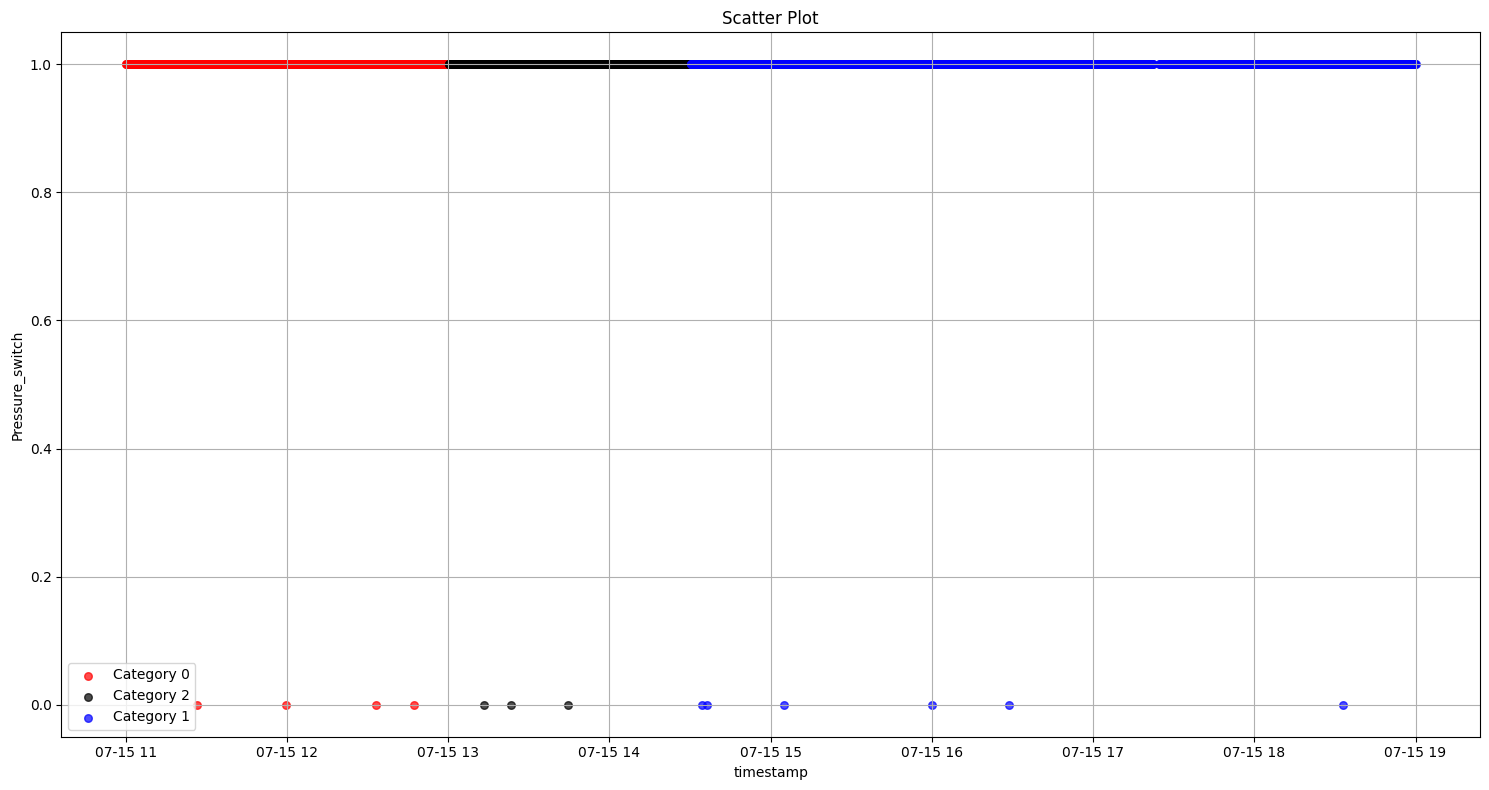

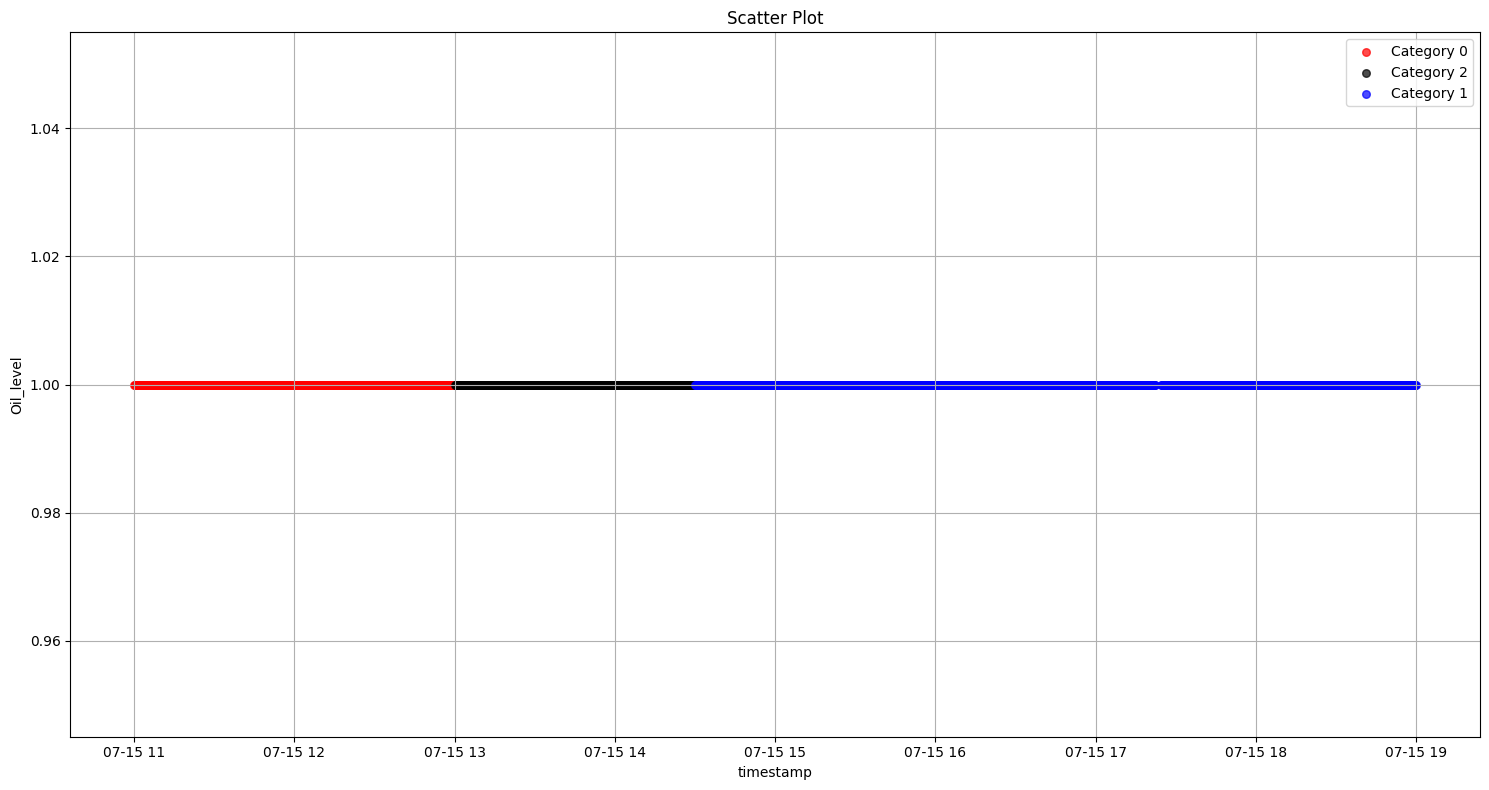

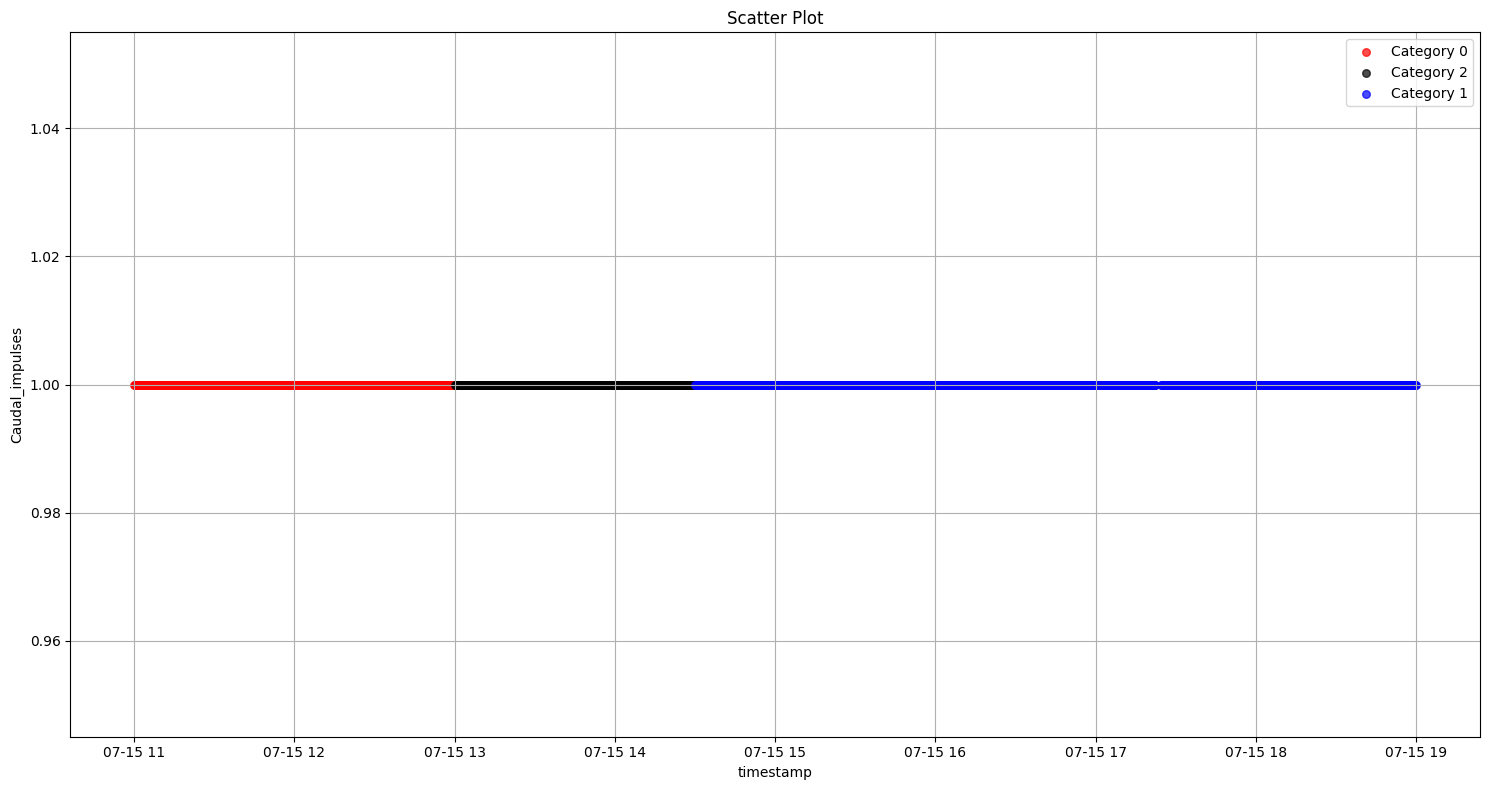

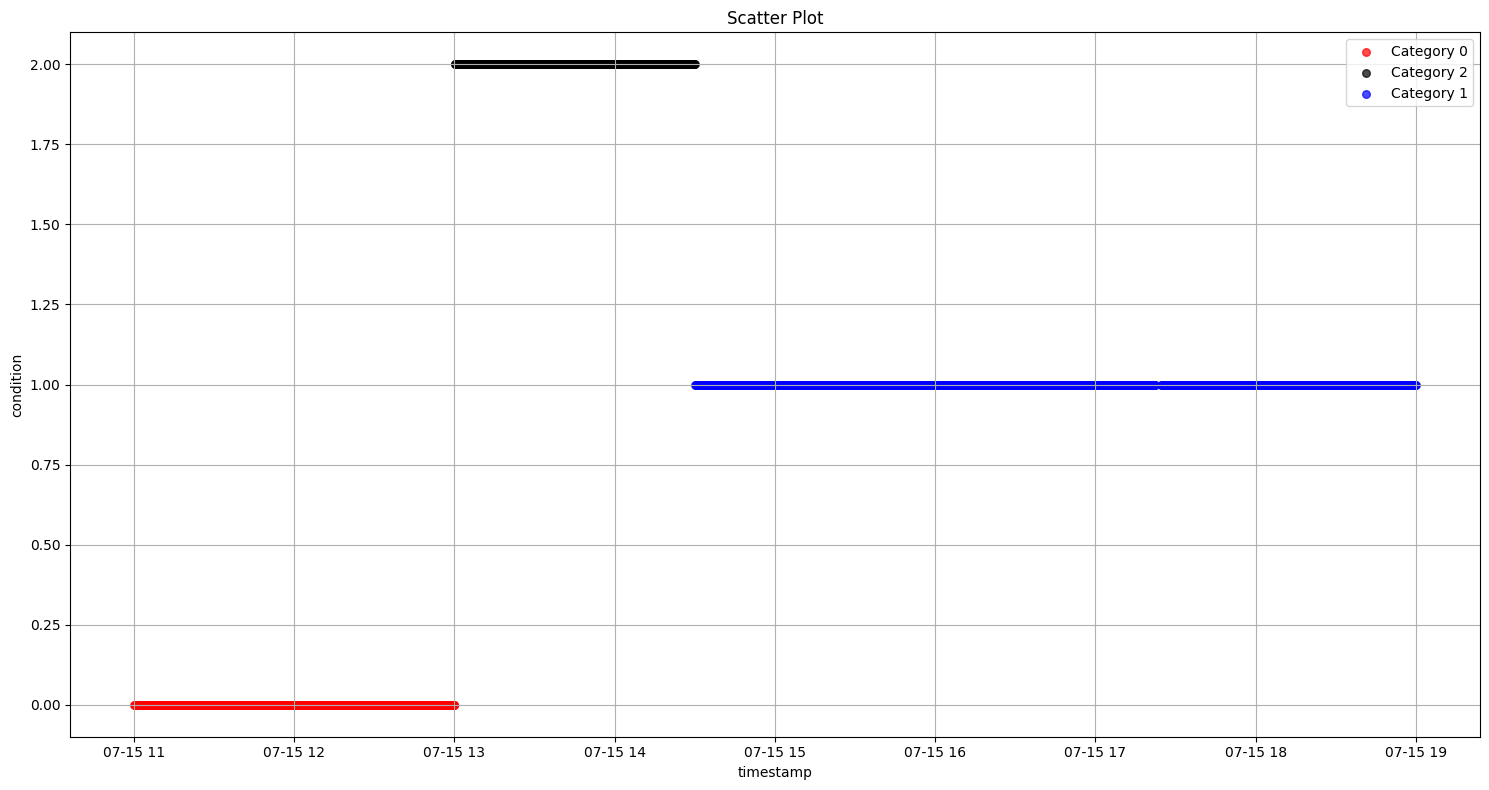

In [44]:
for i in column_names:
    mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df3, "2020-07-15 11:00:00", "2020-07-15 19:00:00"), "timestamp", i, "condition")

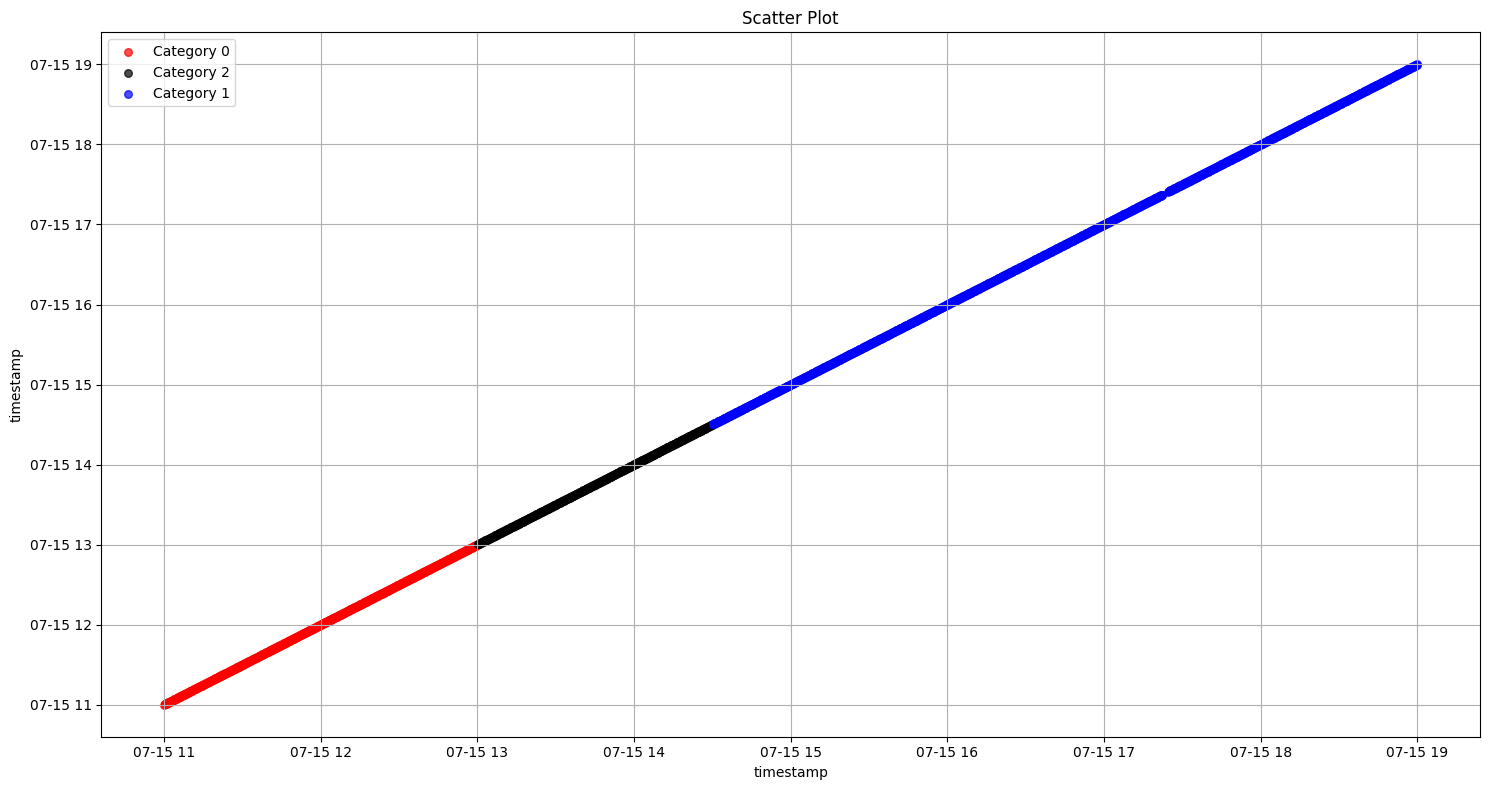

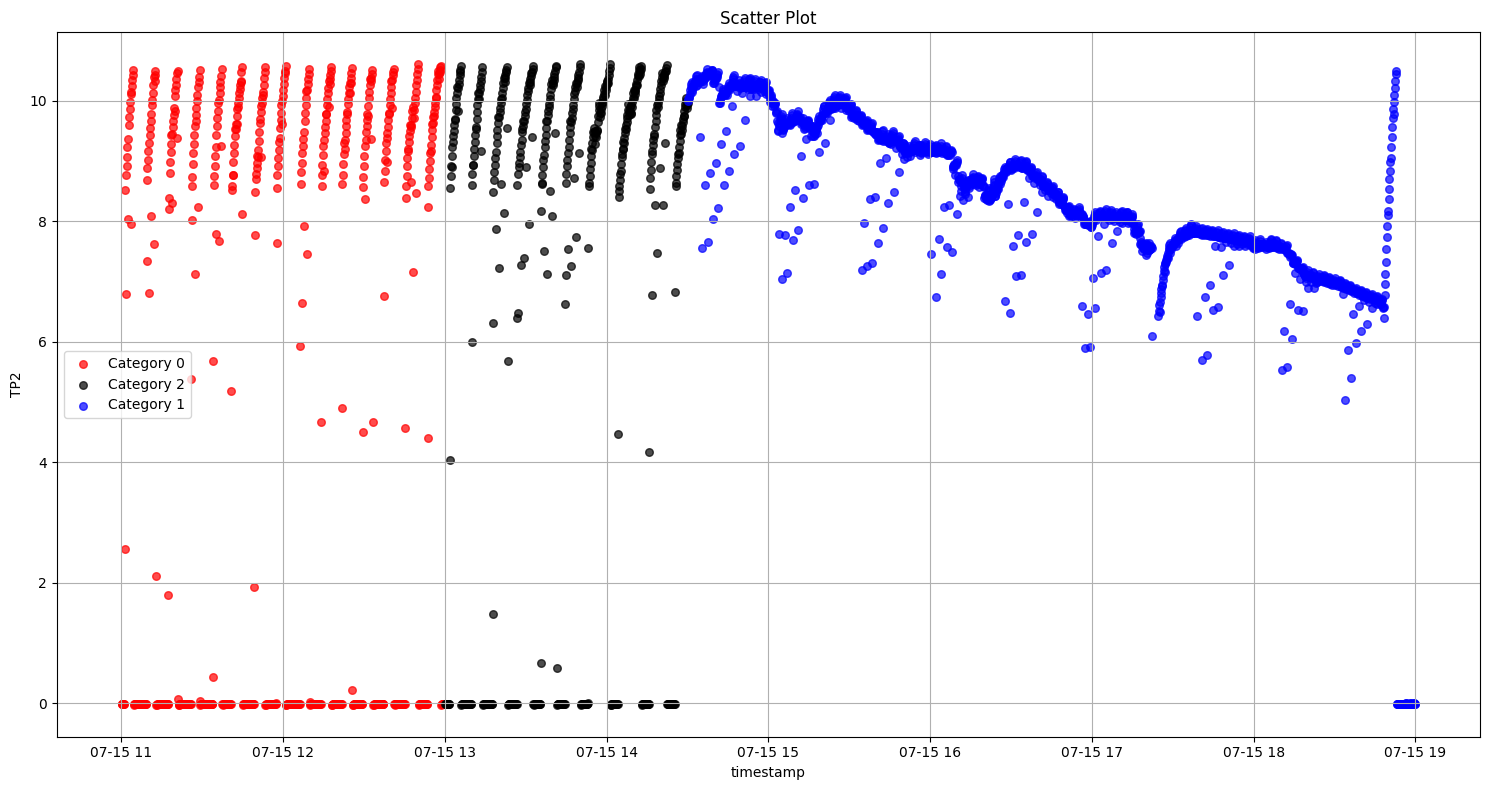

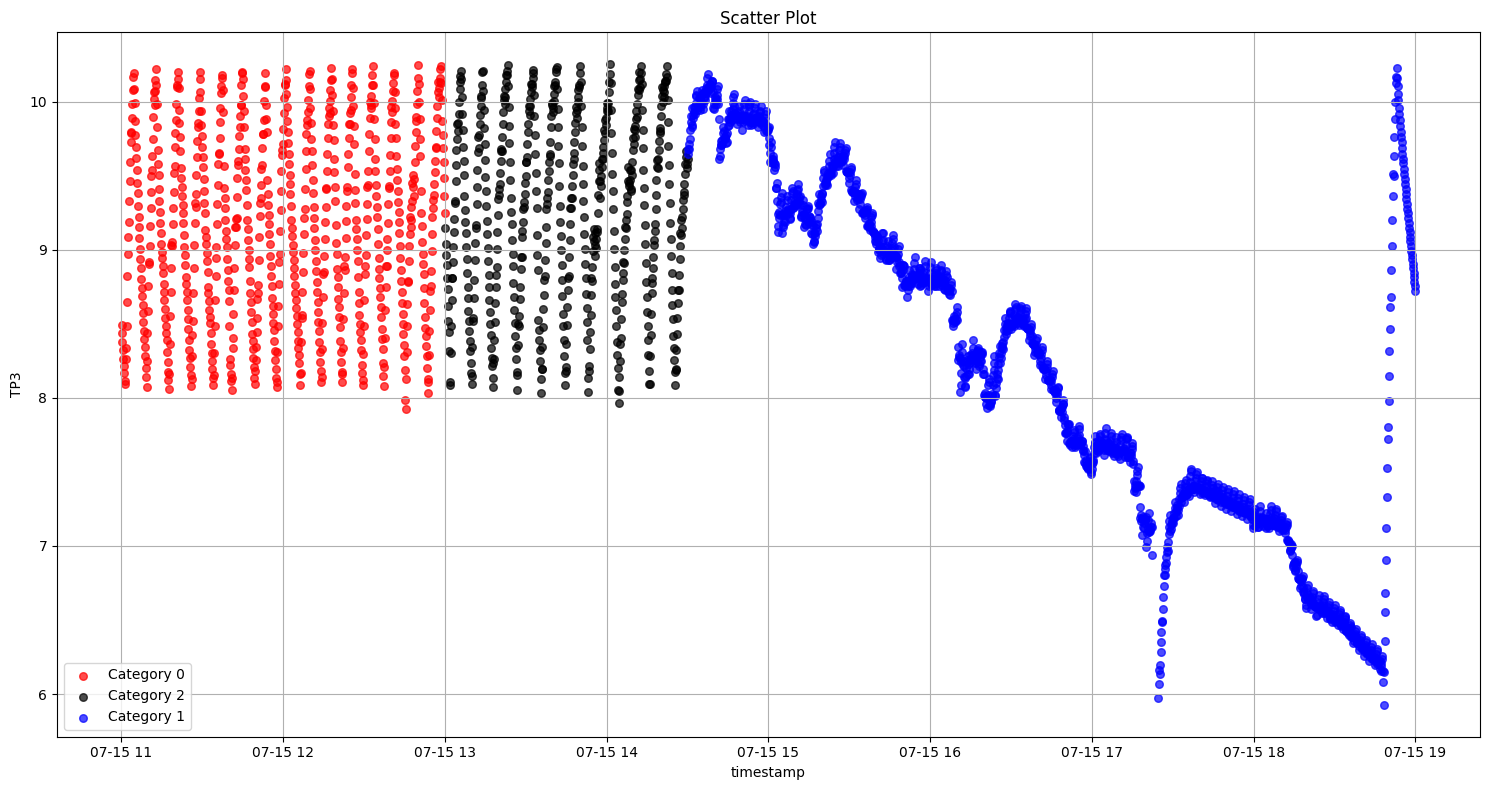

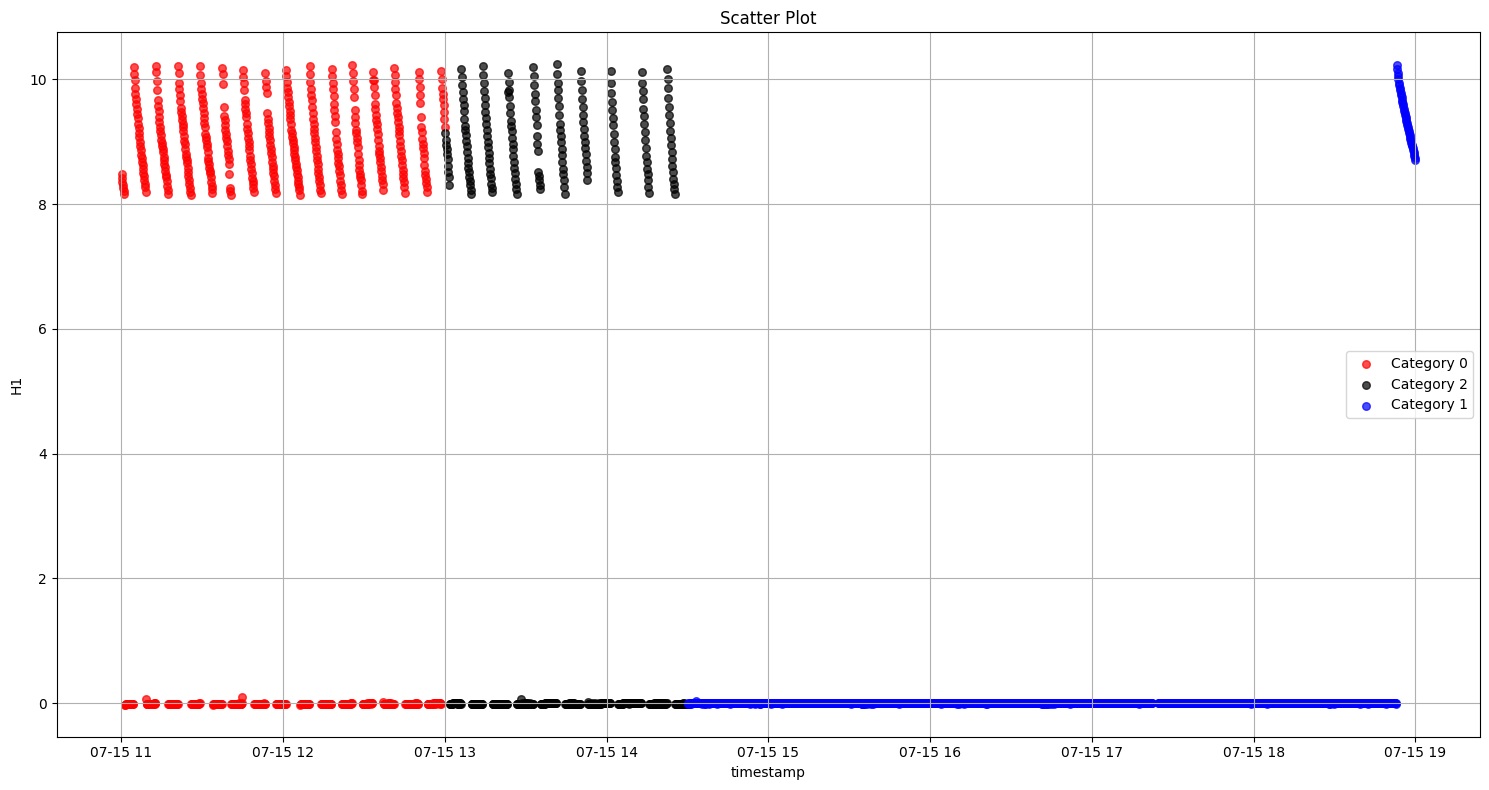

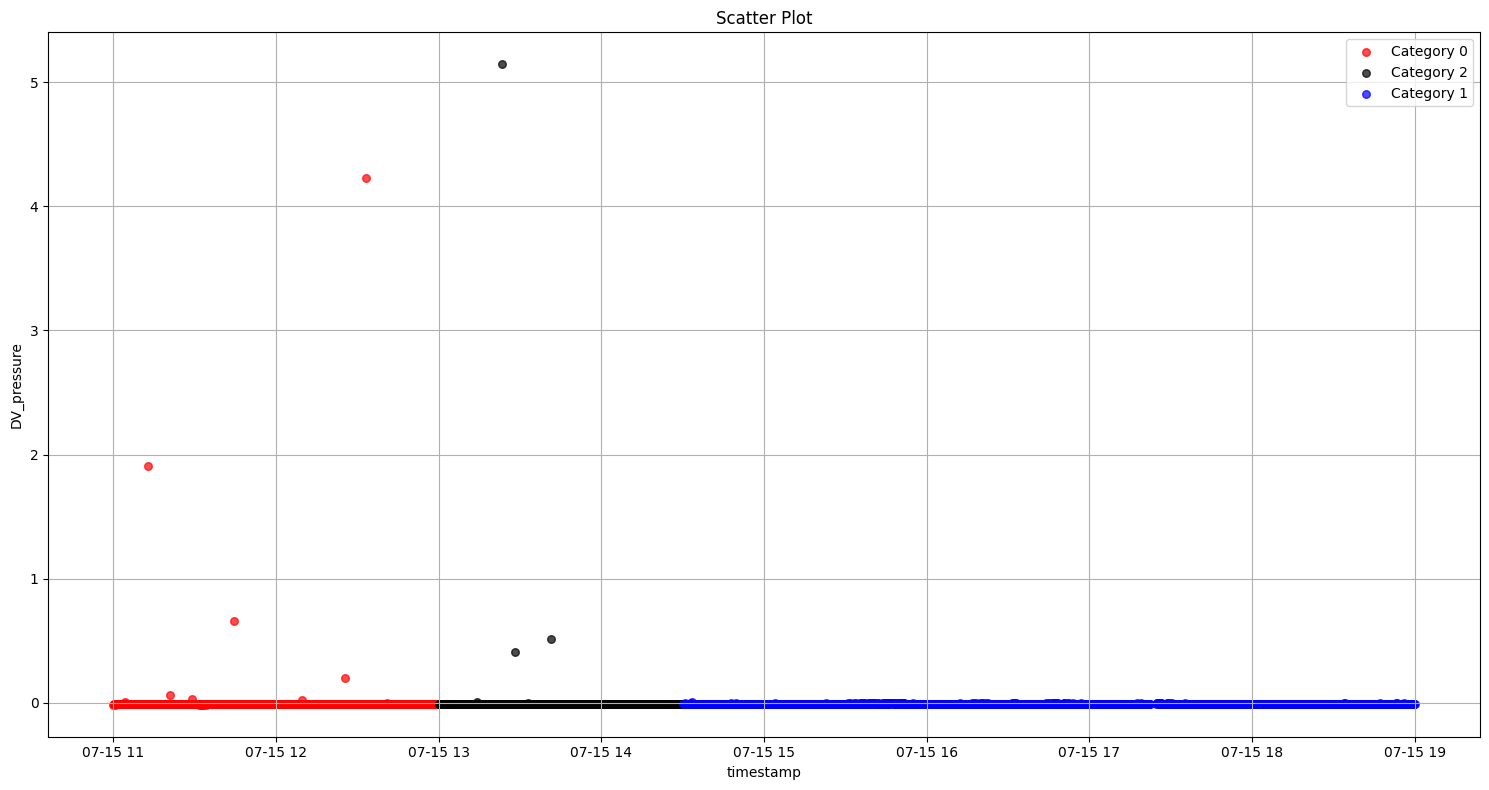

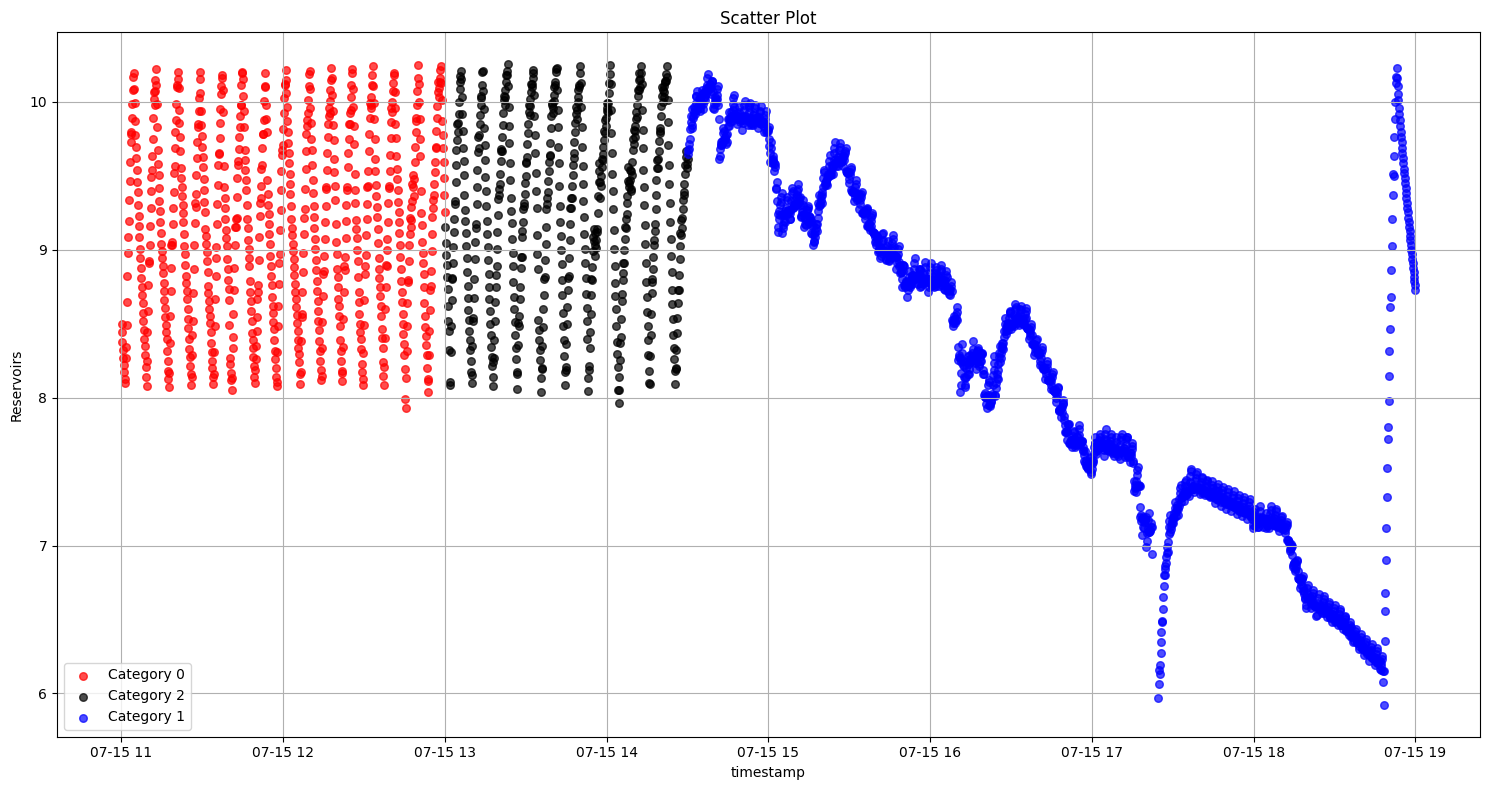

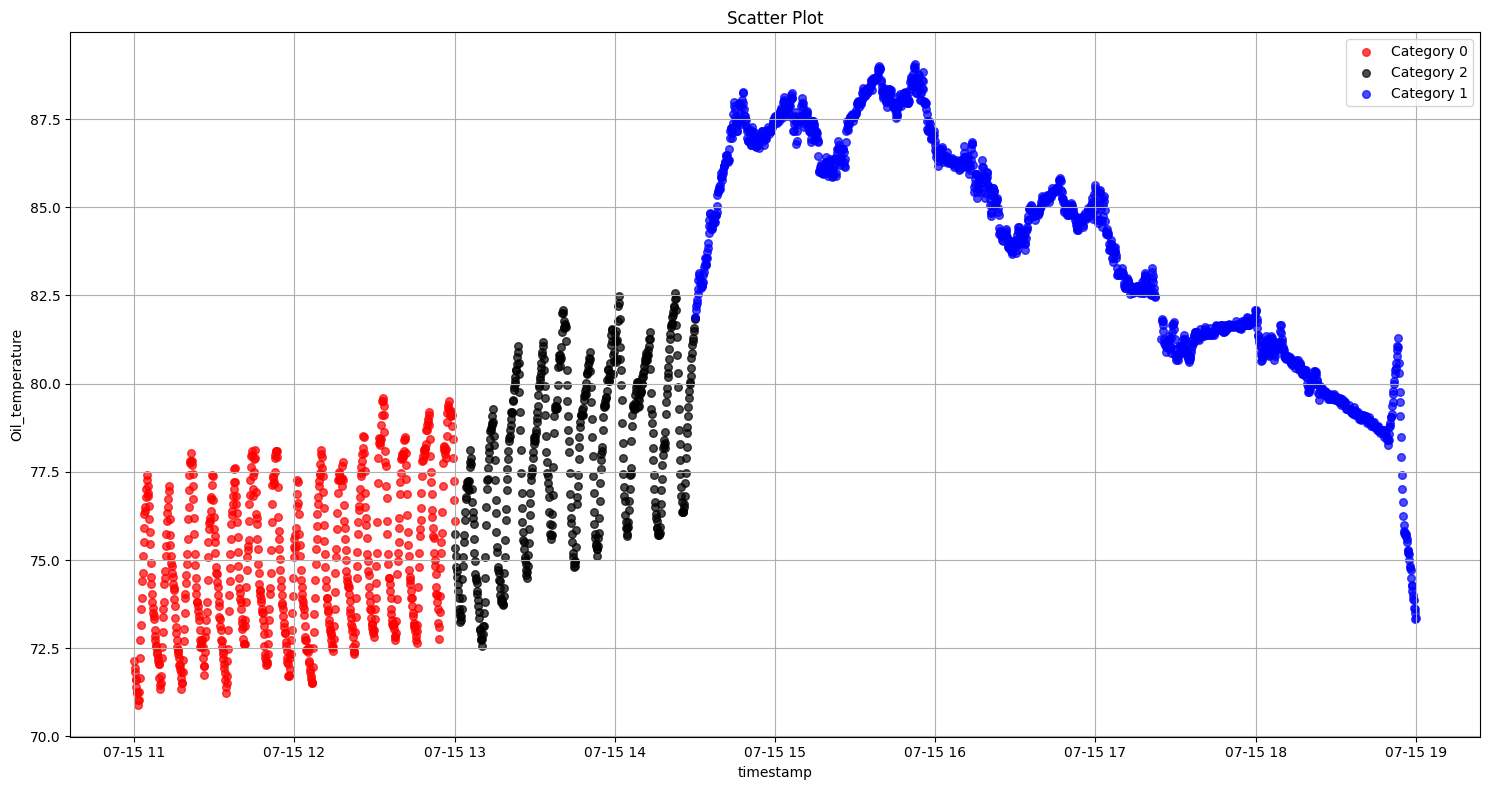

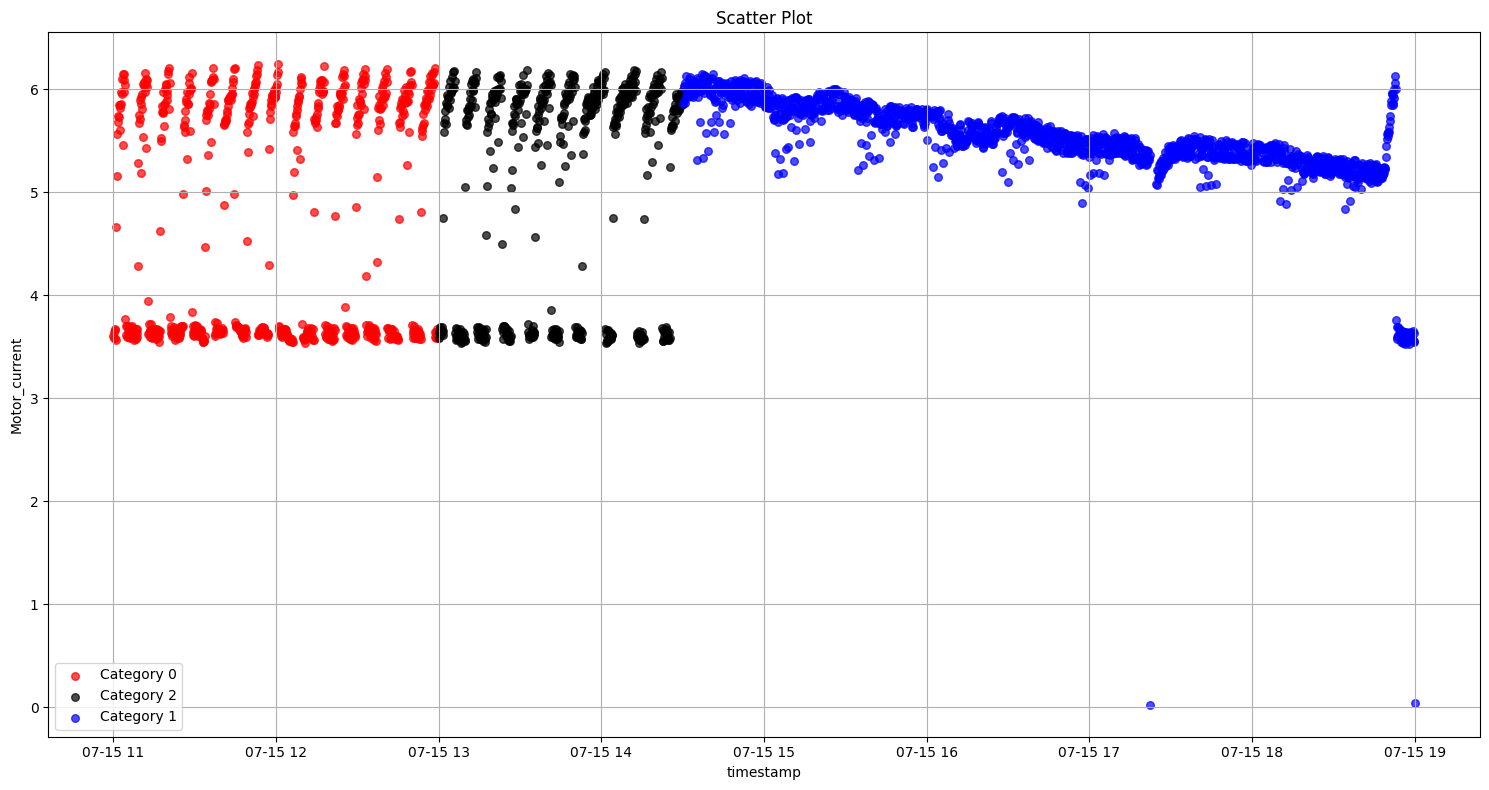

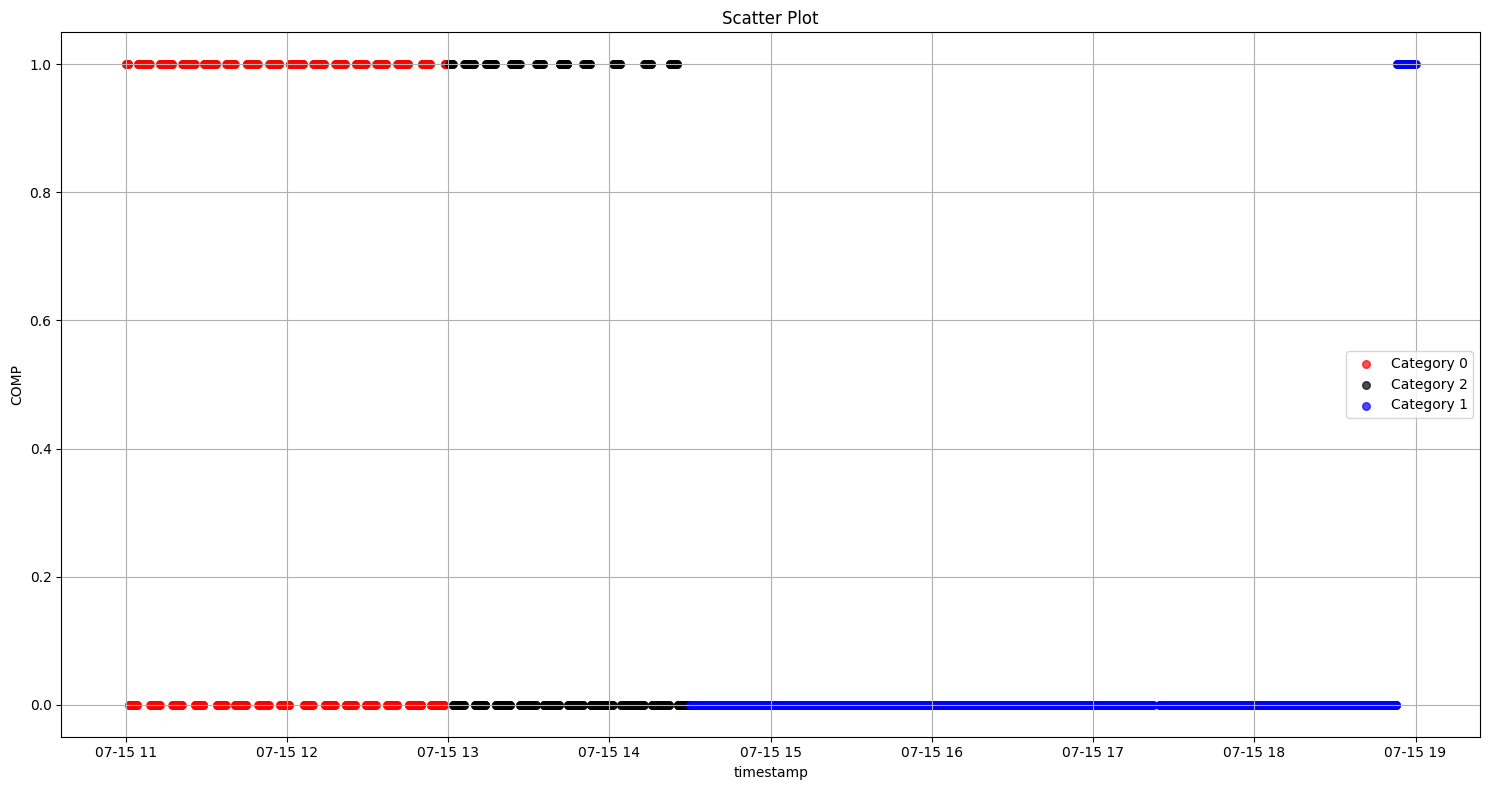

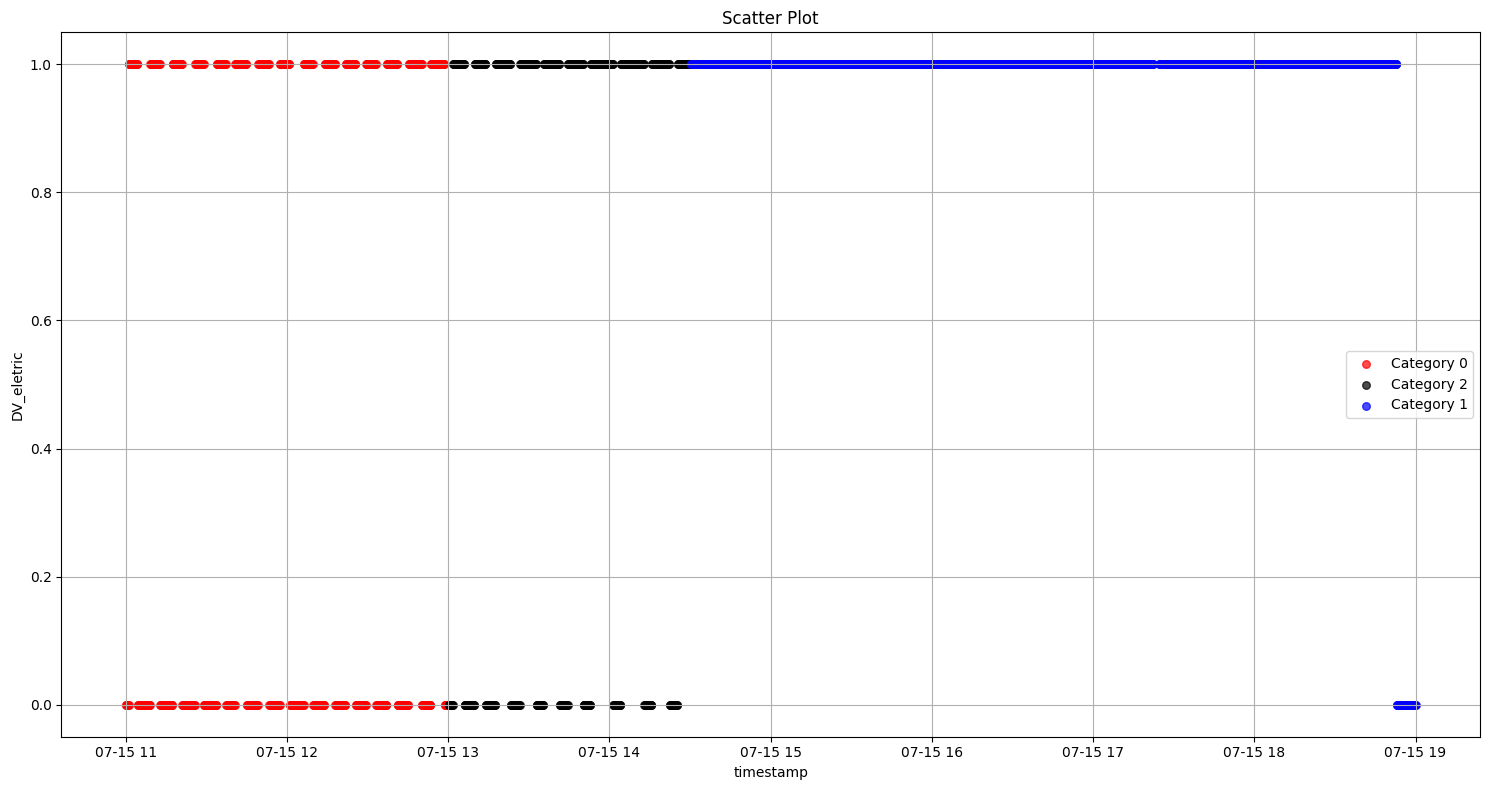

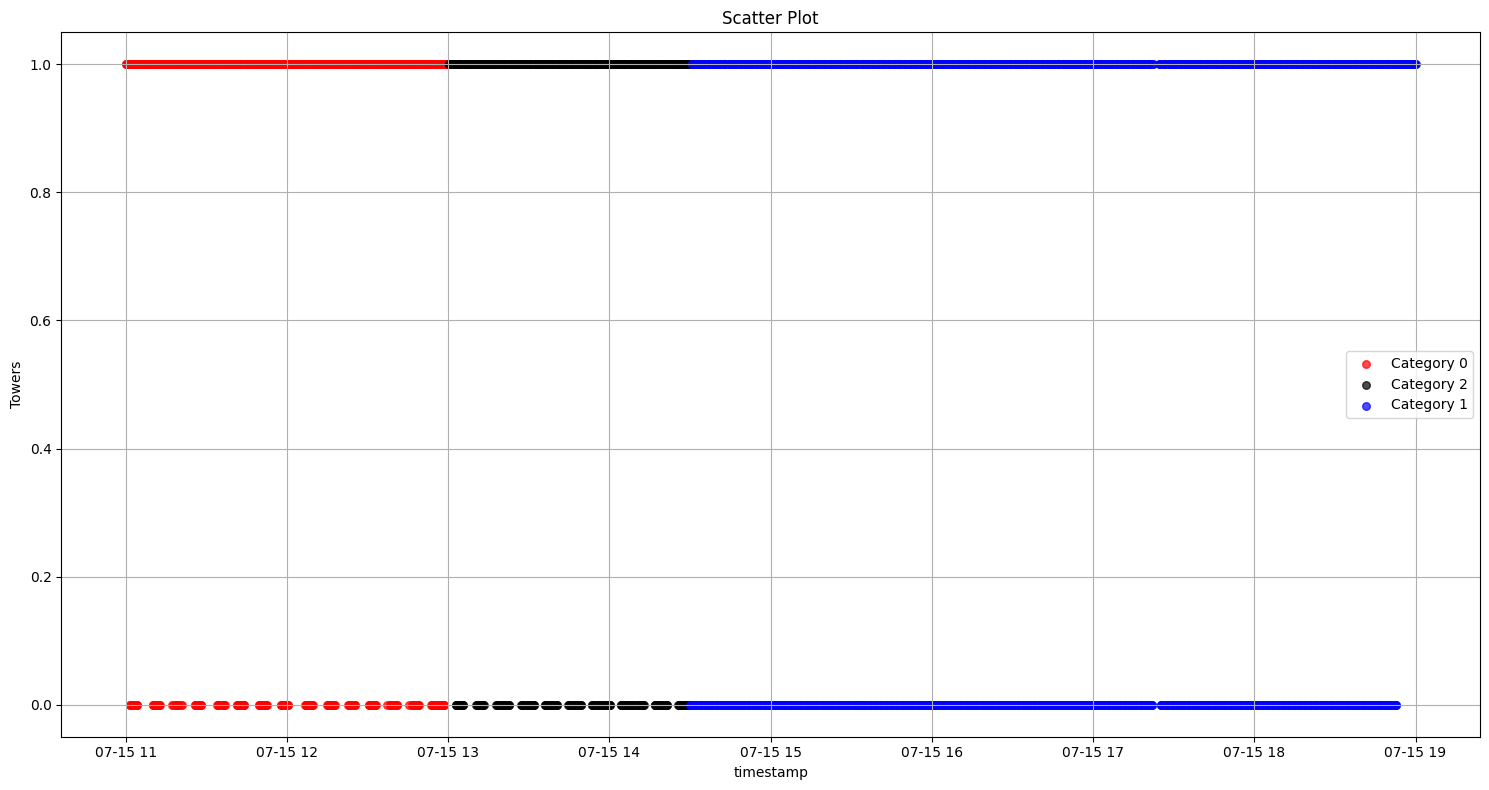

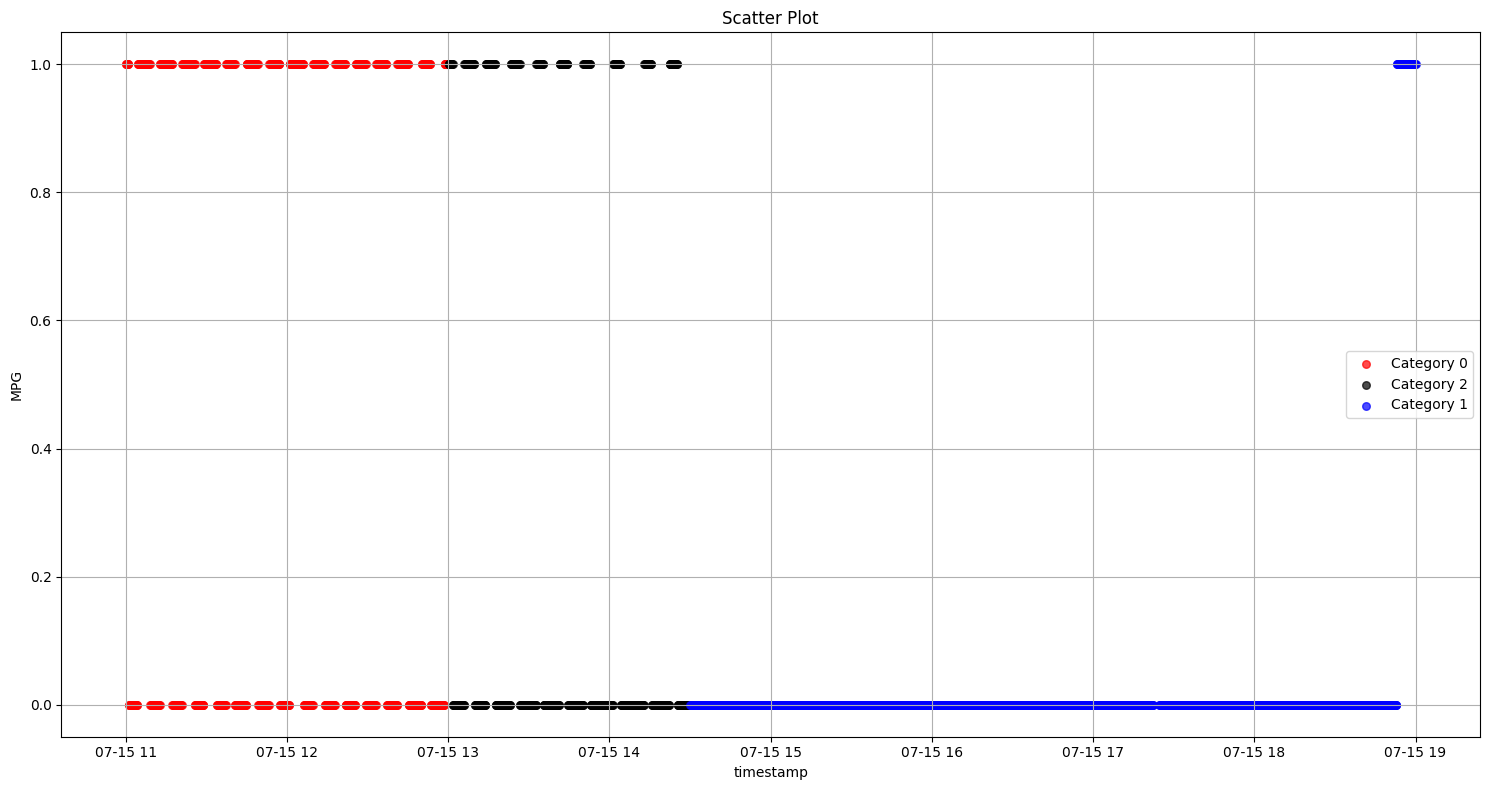

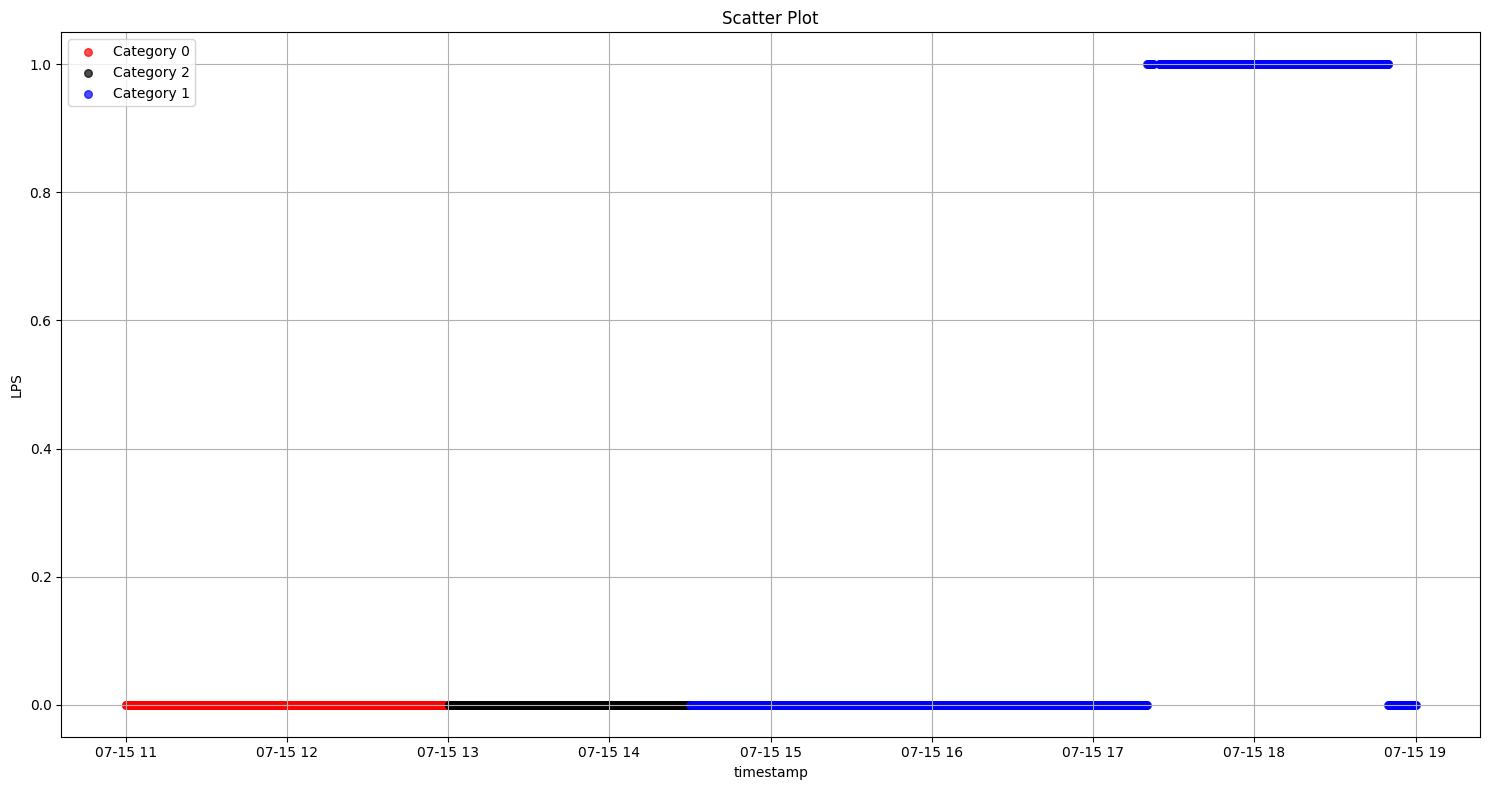

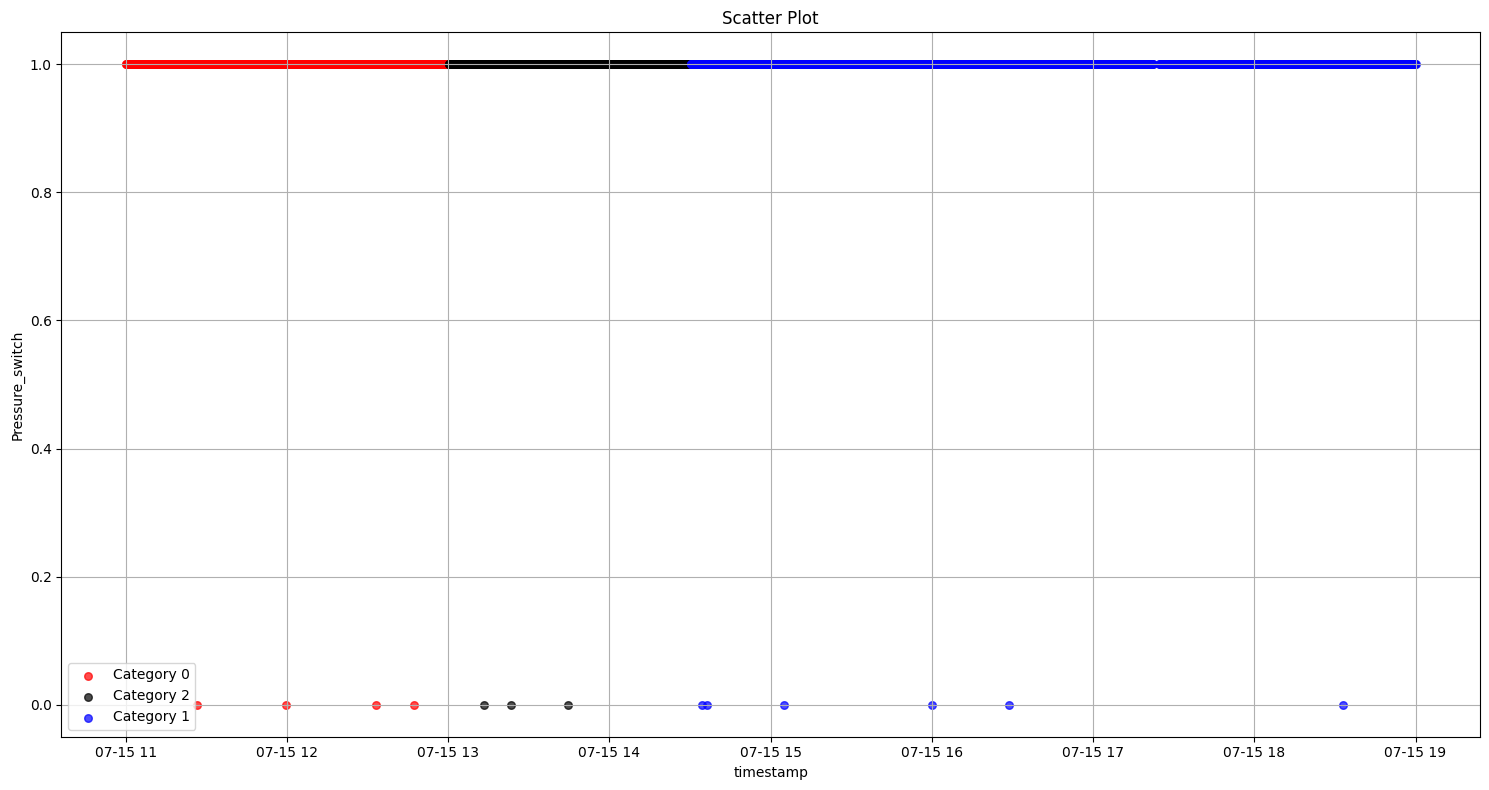

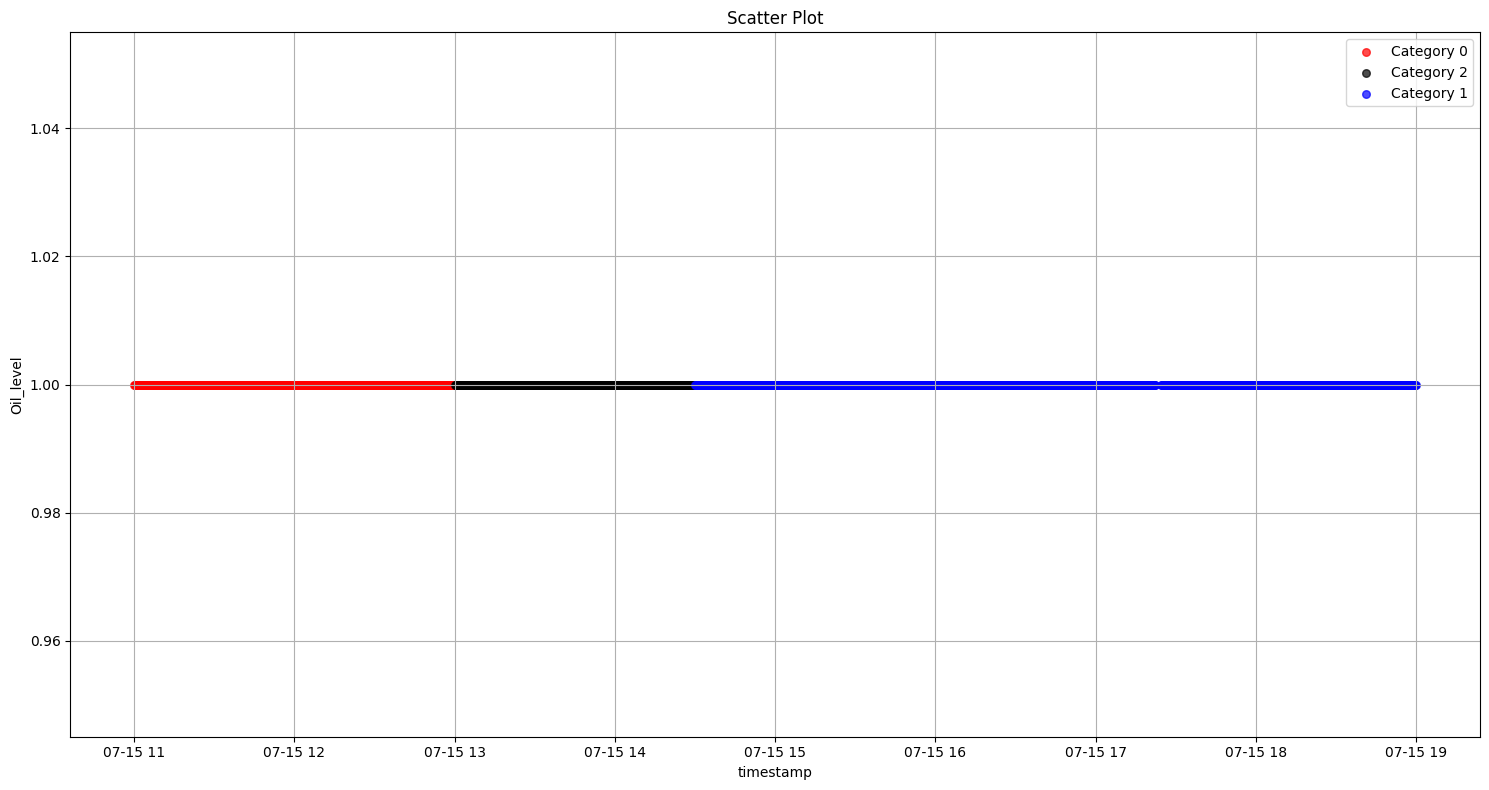

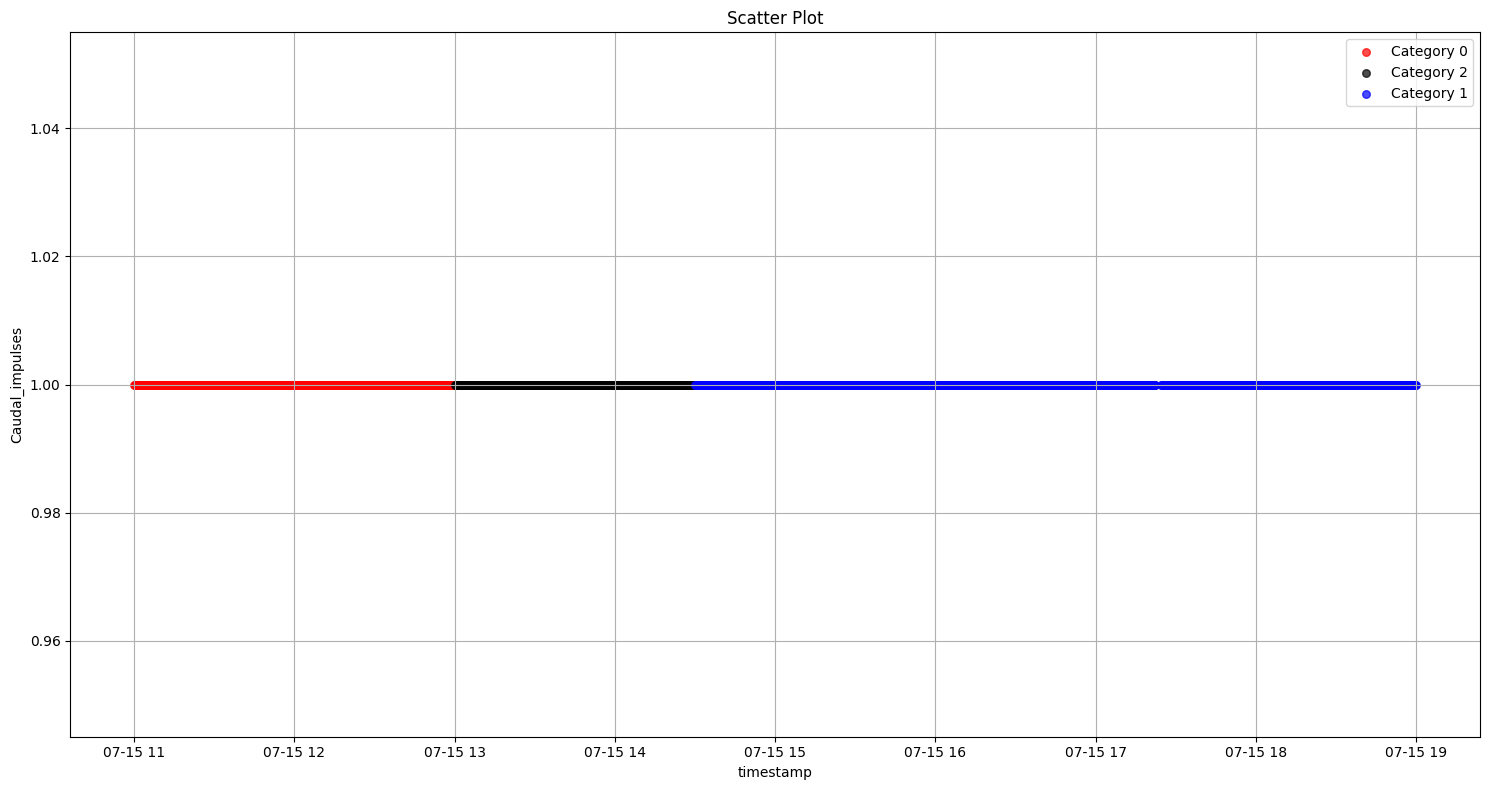

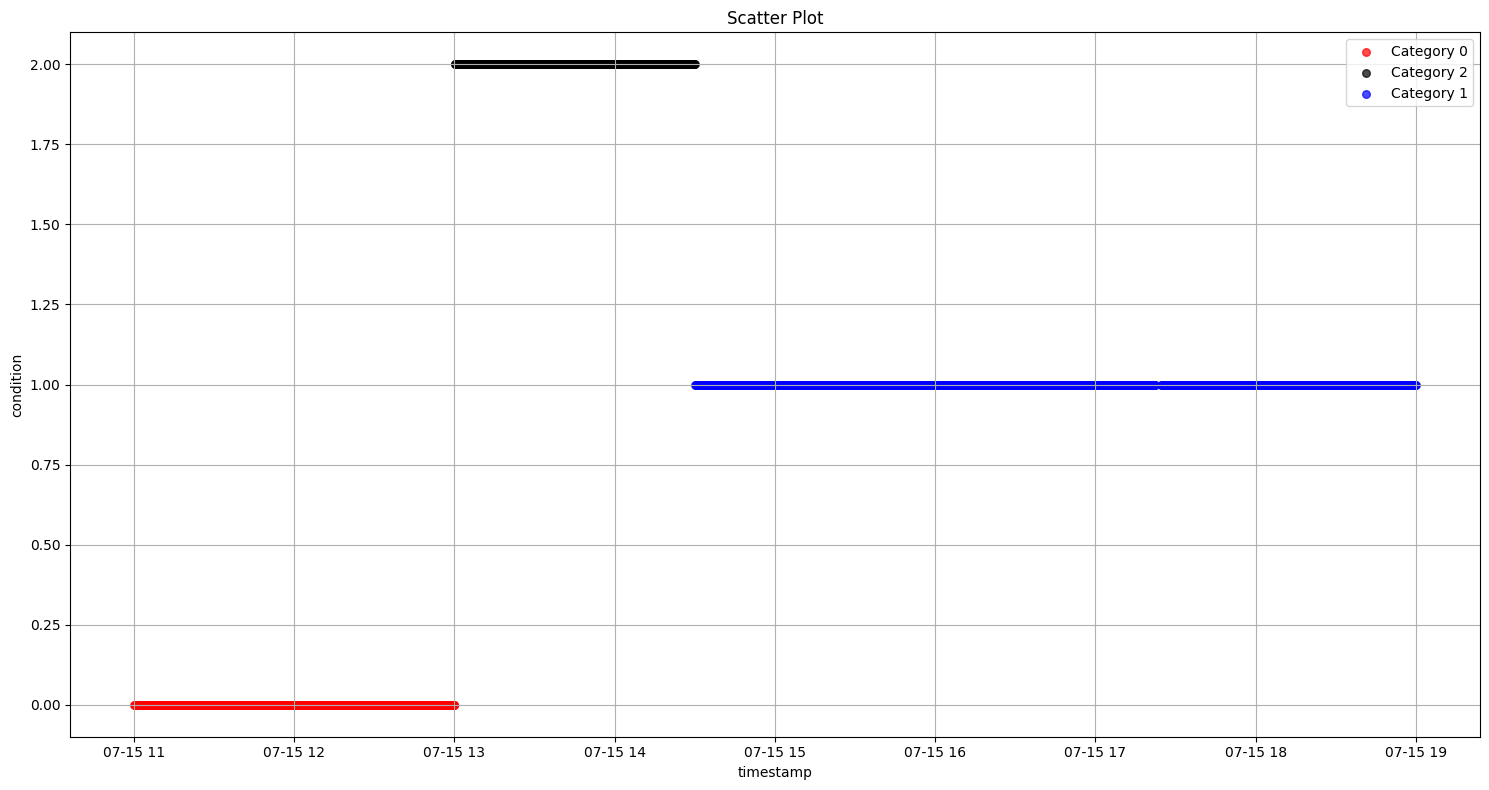

In [54]:
for i in column_names:
    mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df3, "2020-07-15 11:00:00", "2020-07-15 19:00:00"), "timestamp", i, "condition")

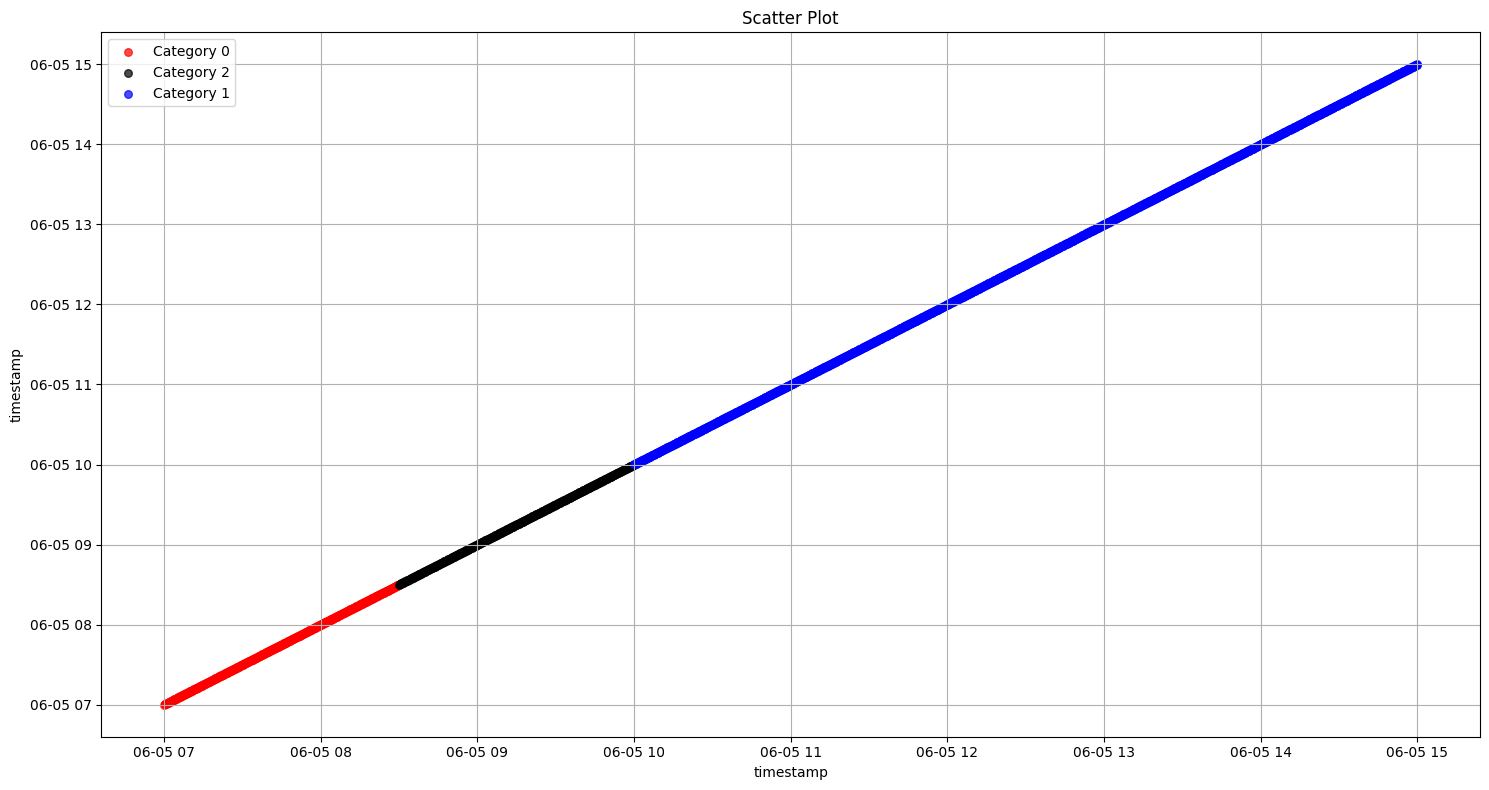

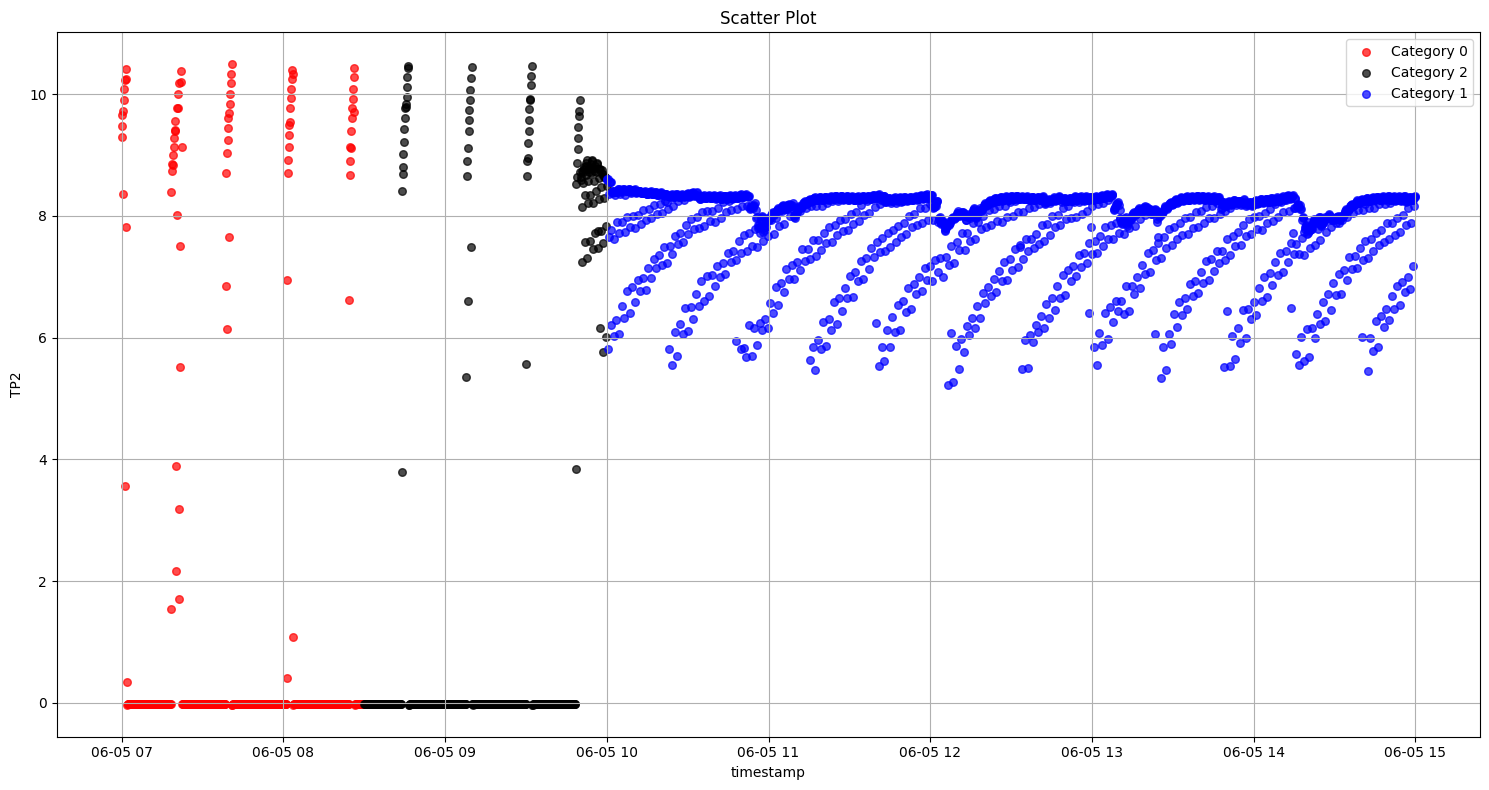

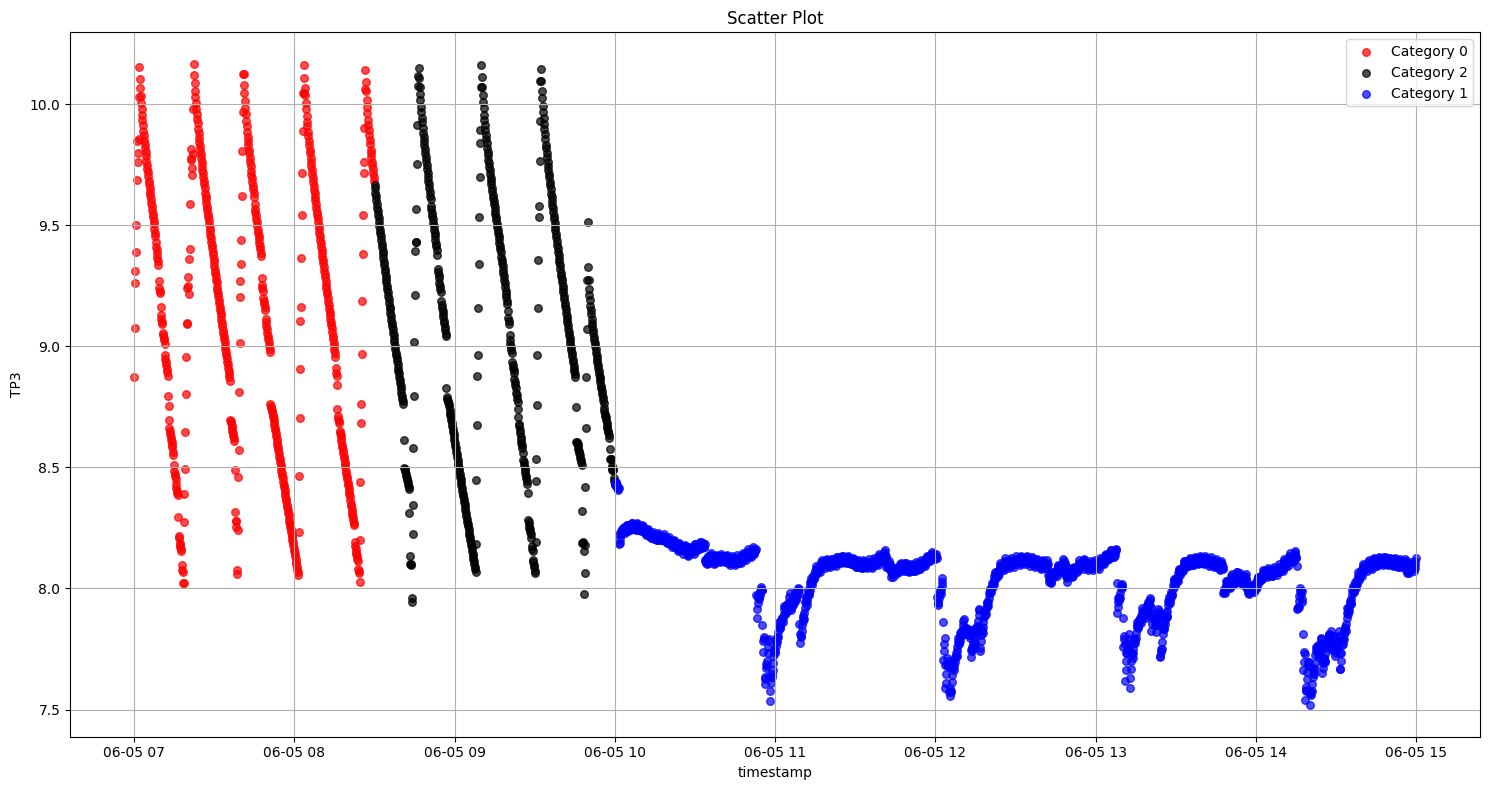

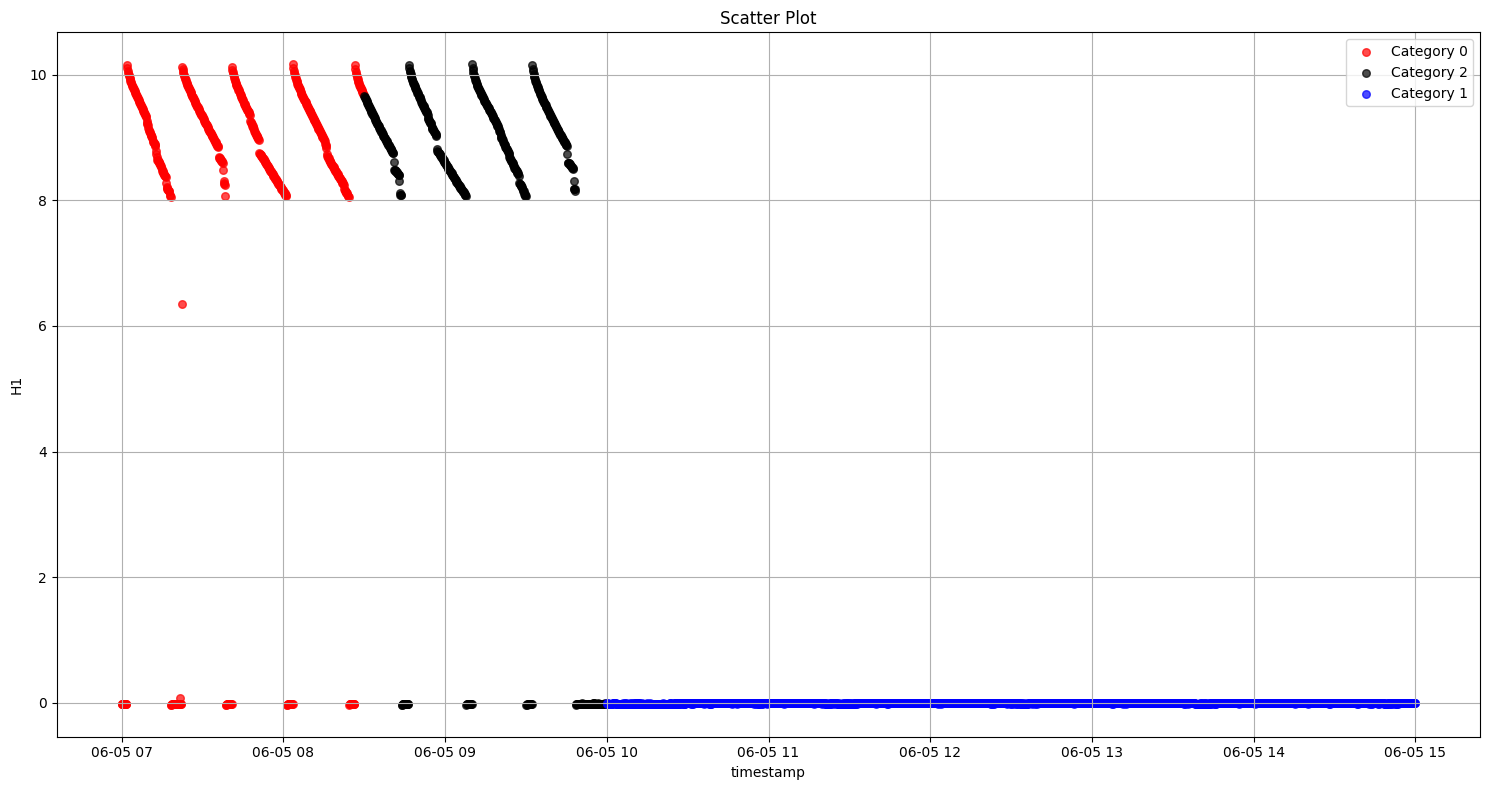

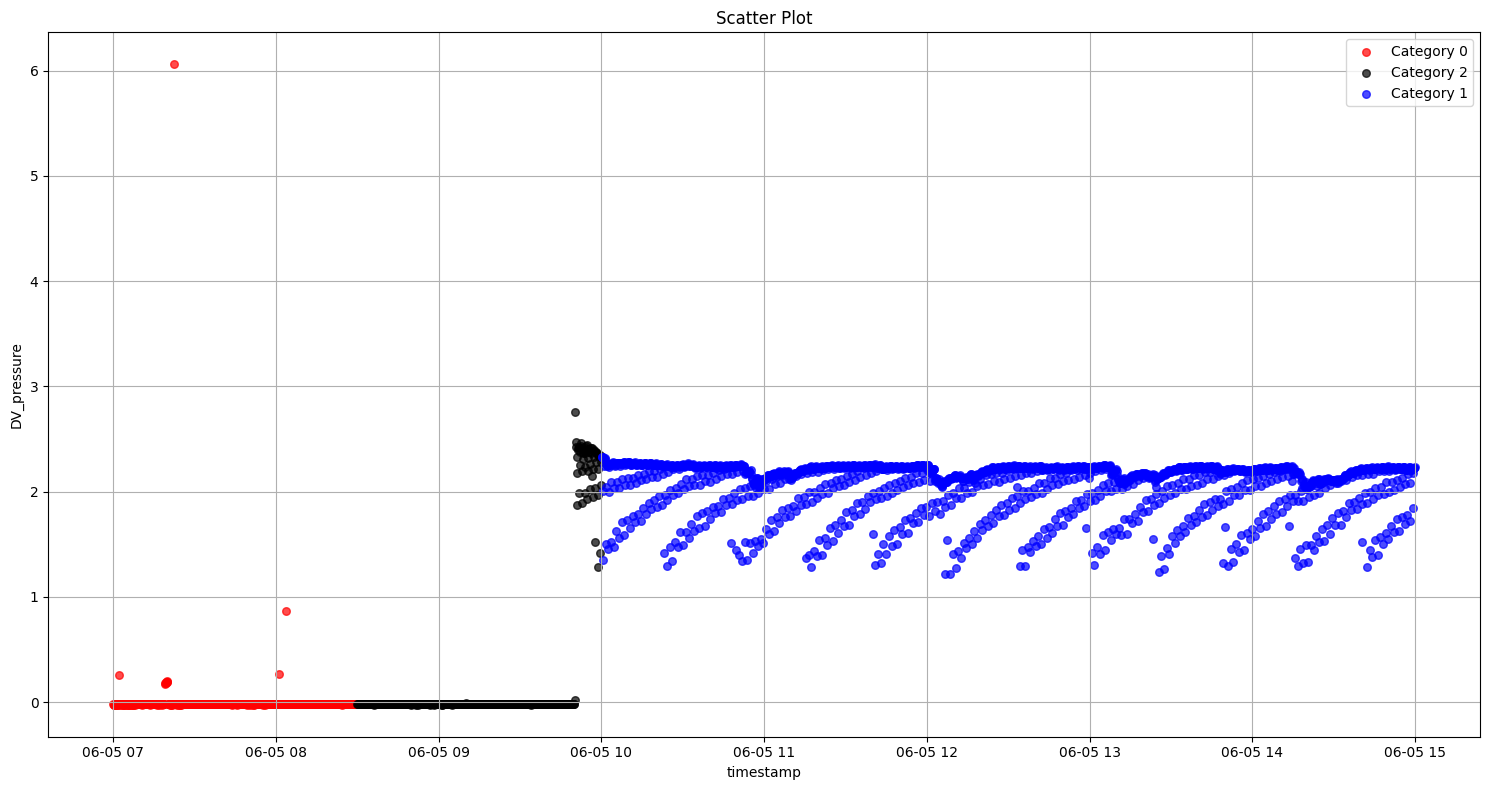

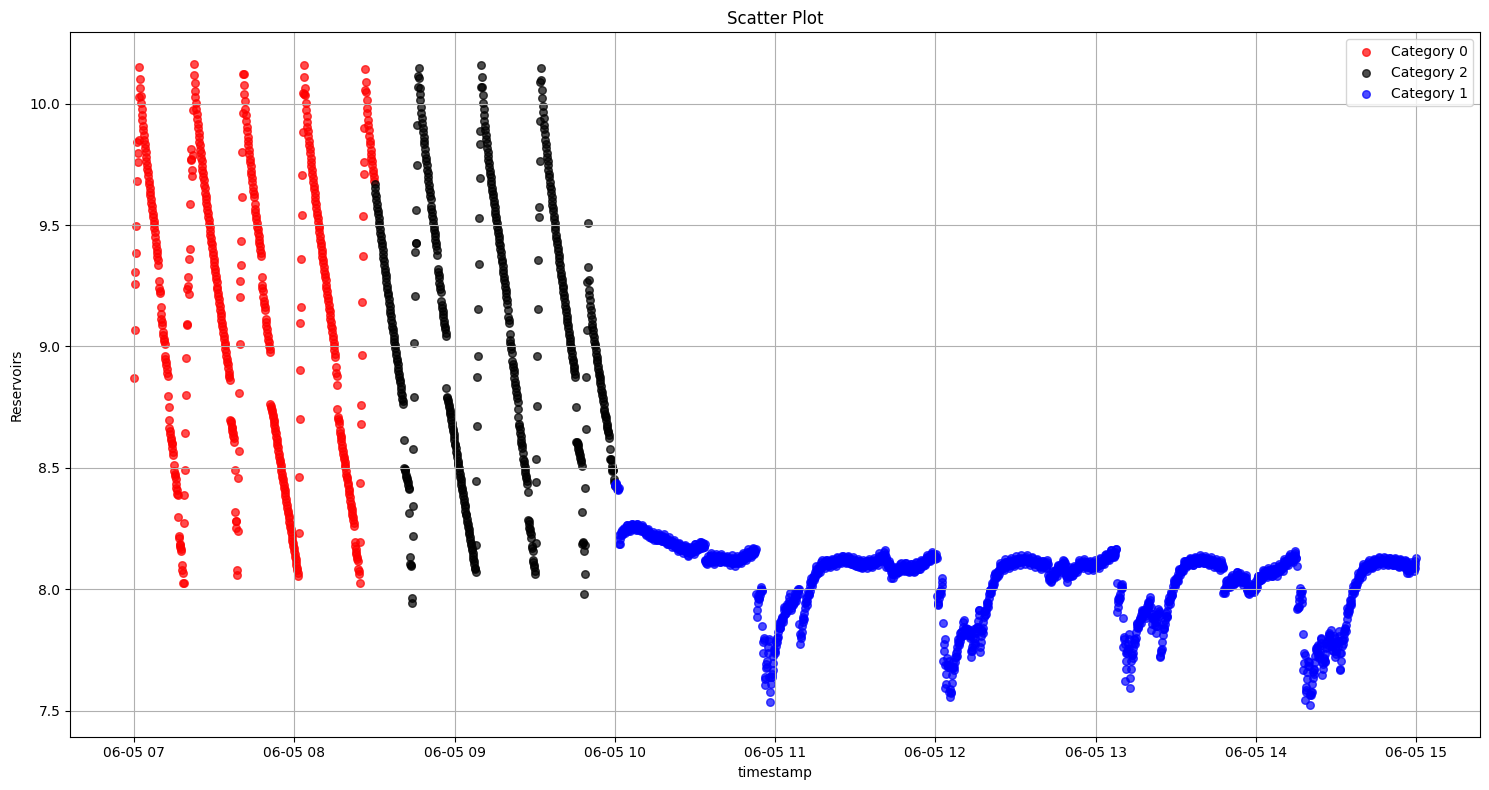

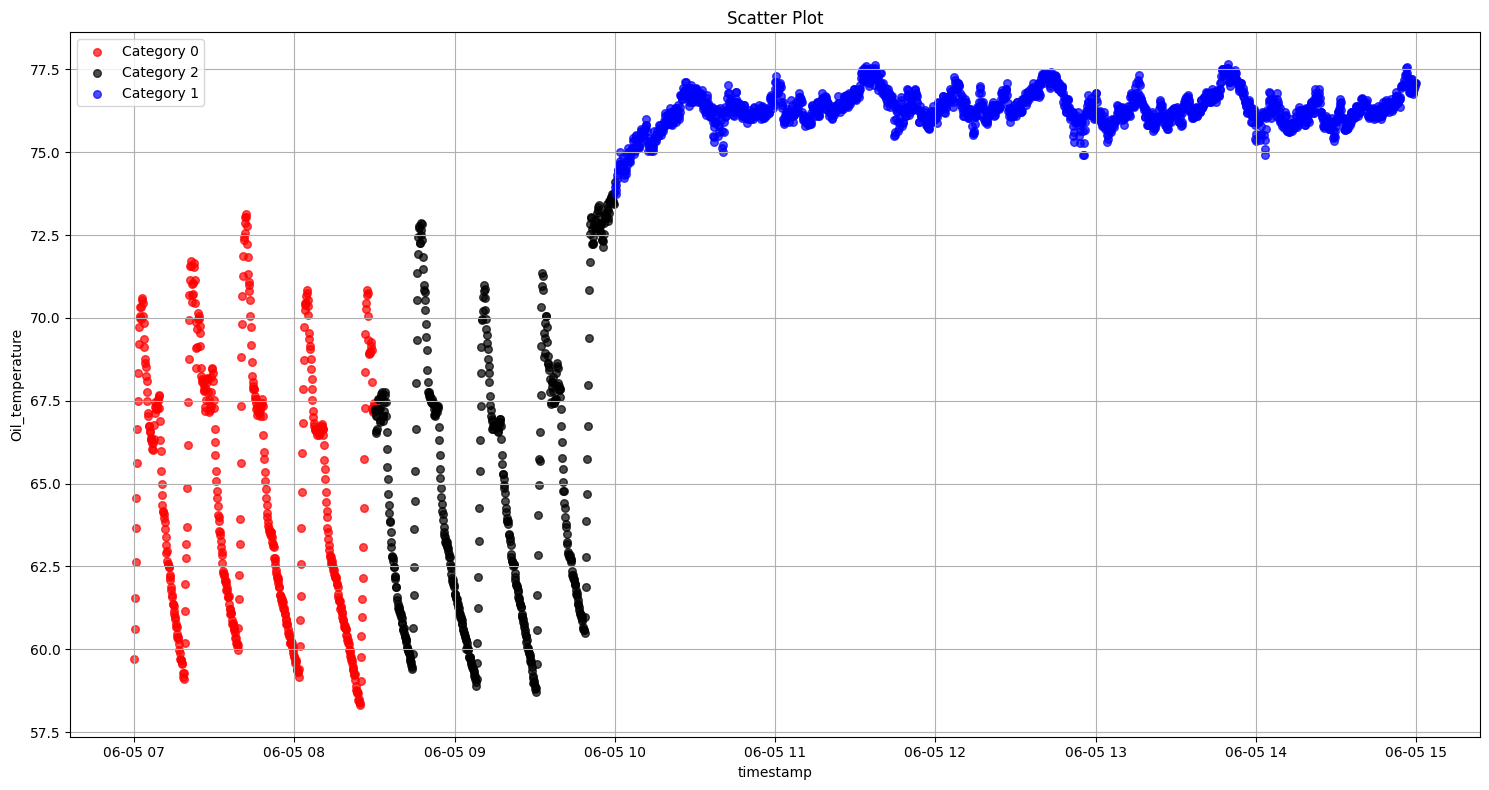

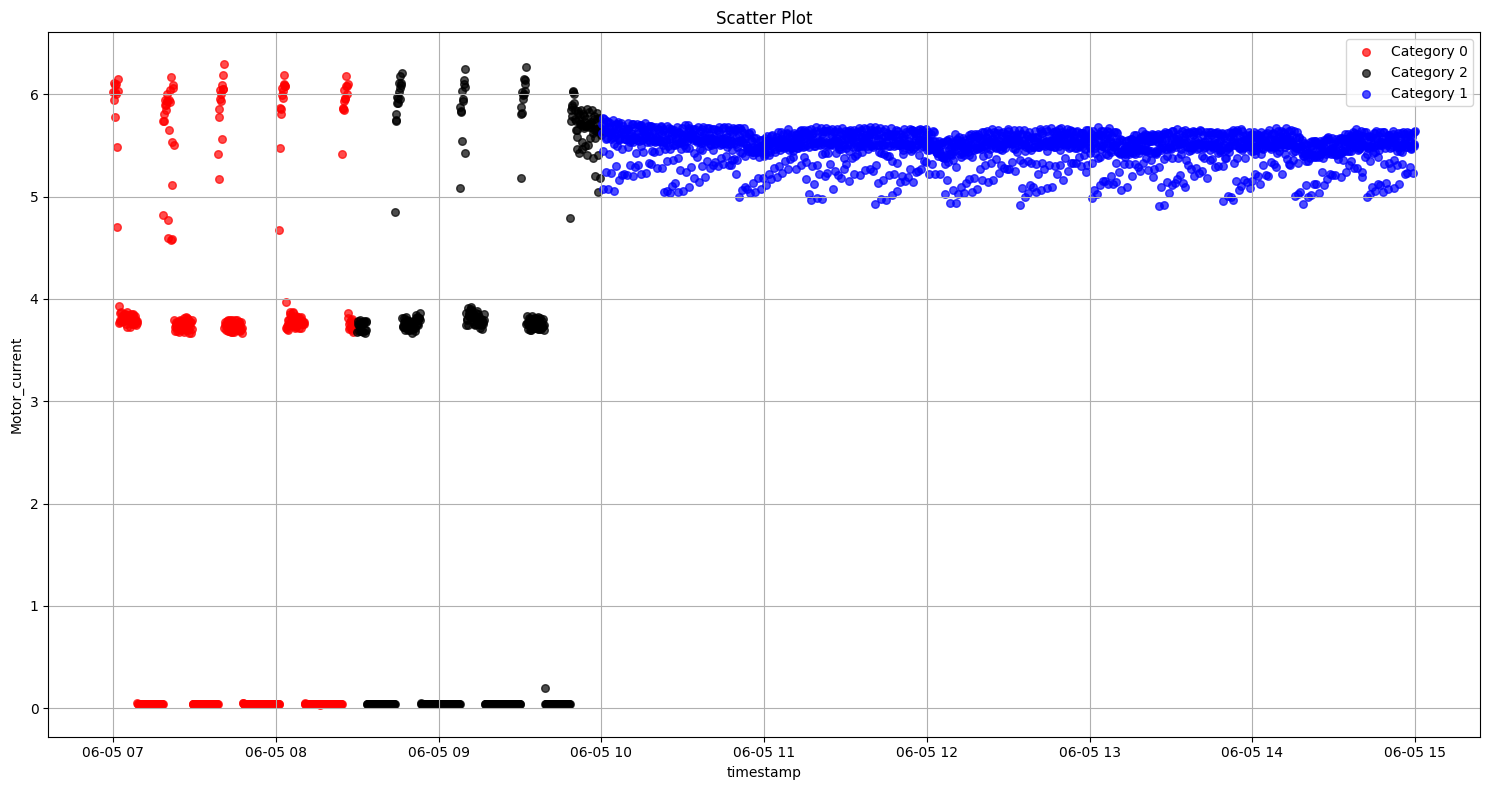

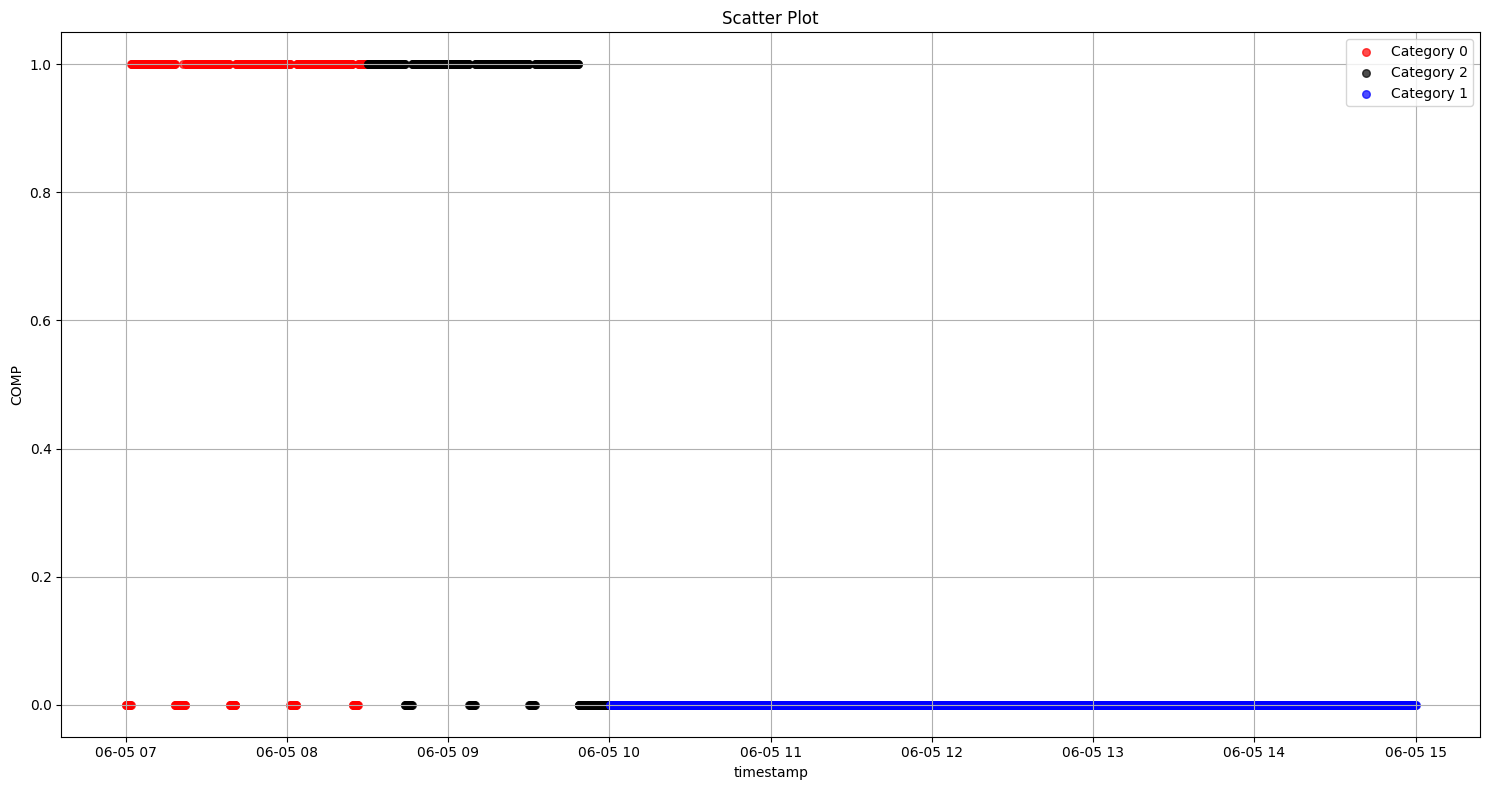

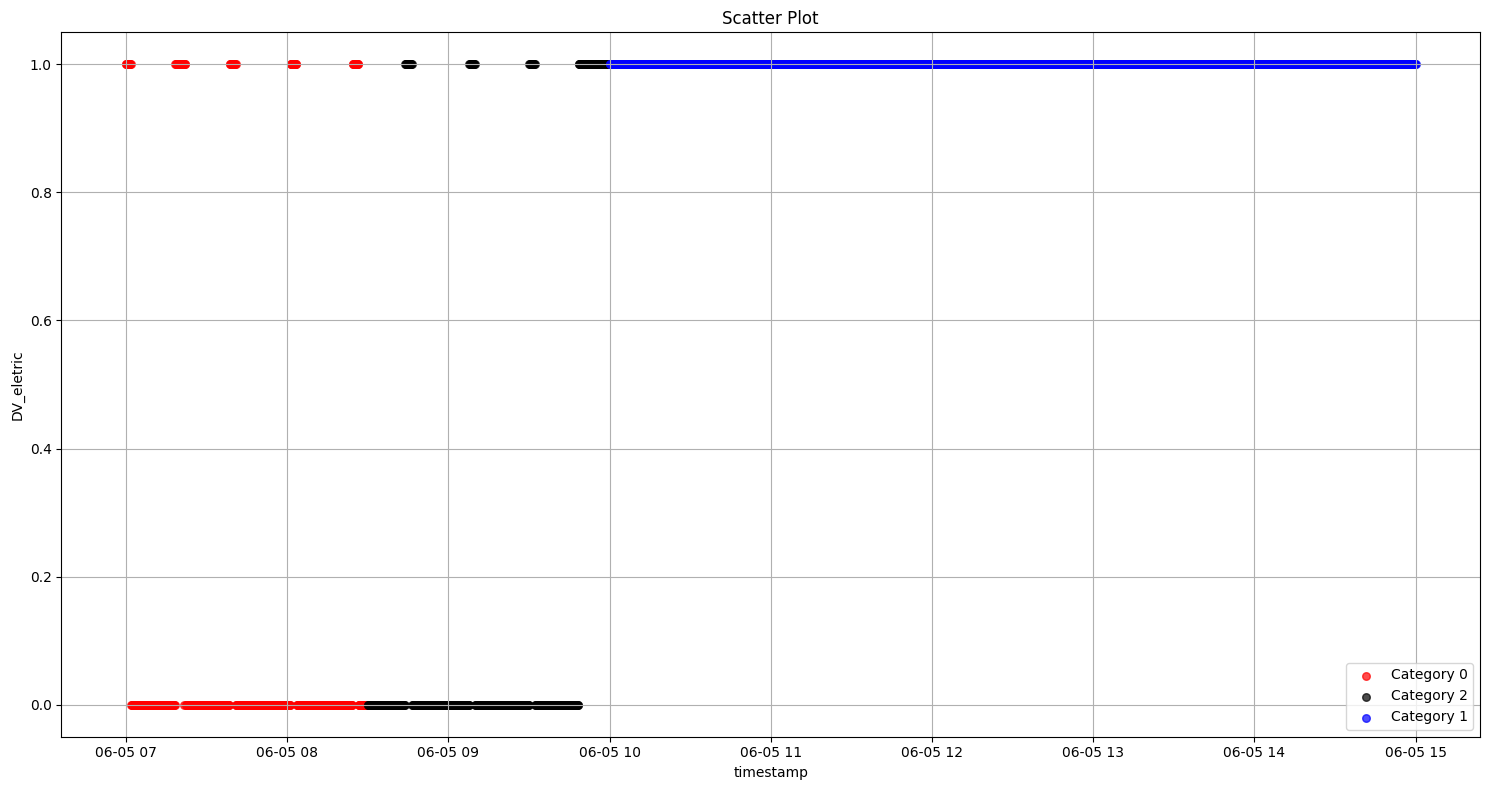

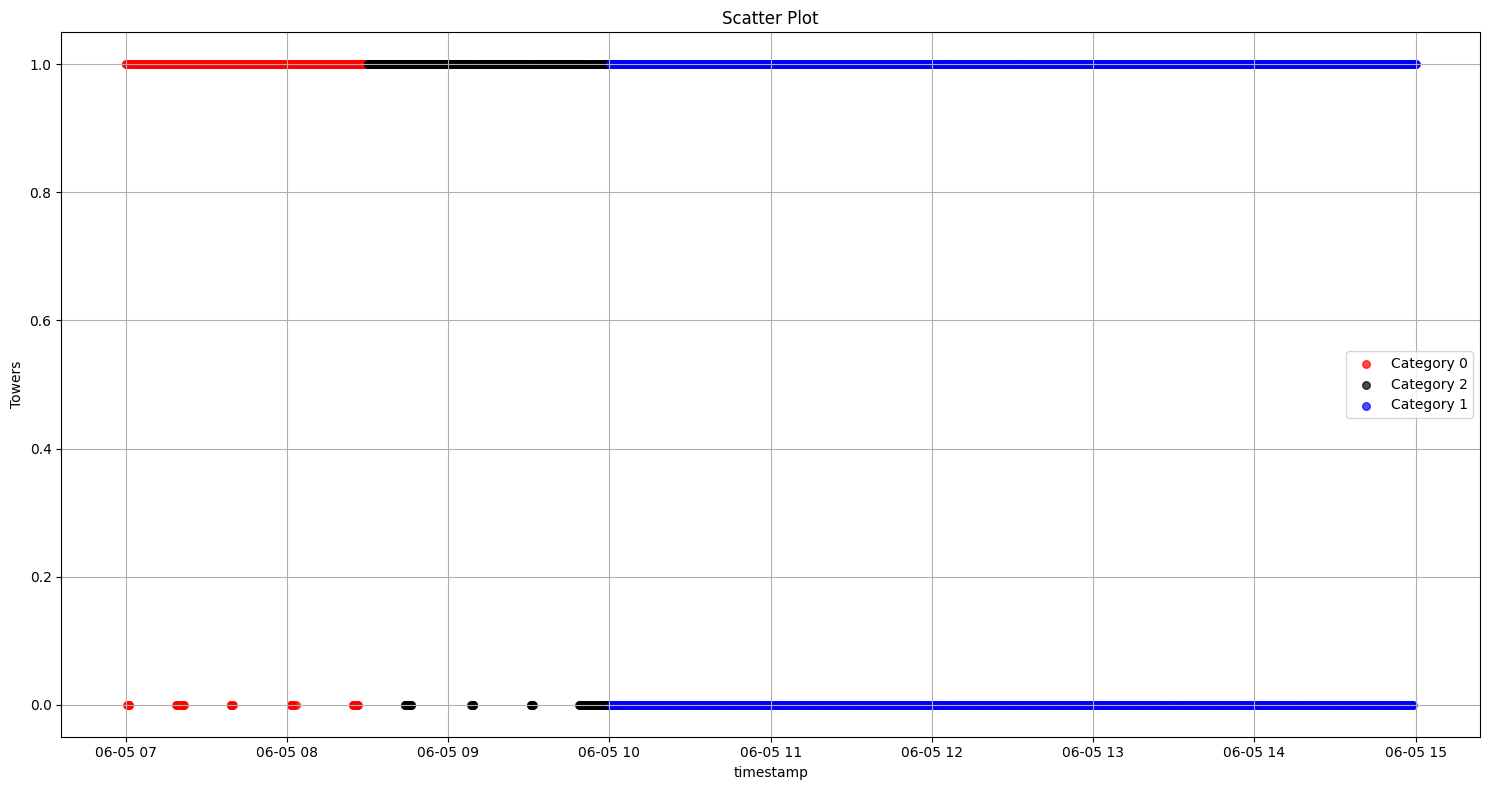

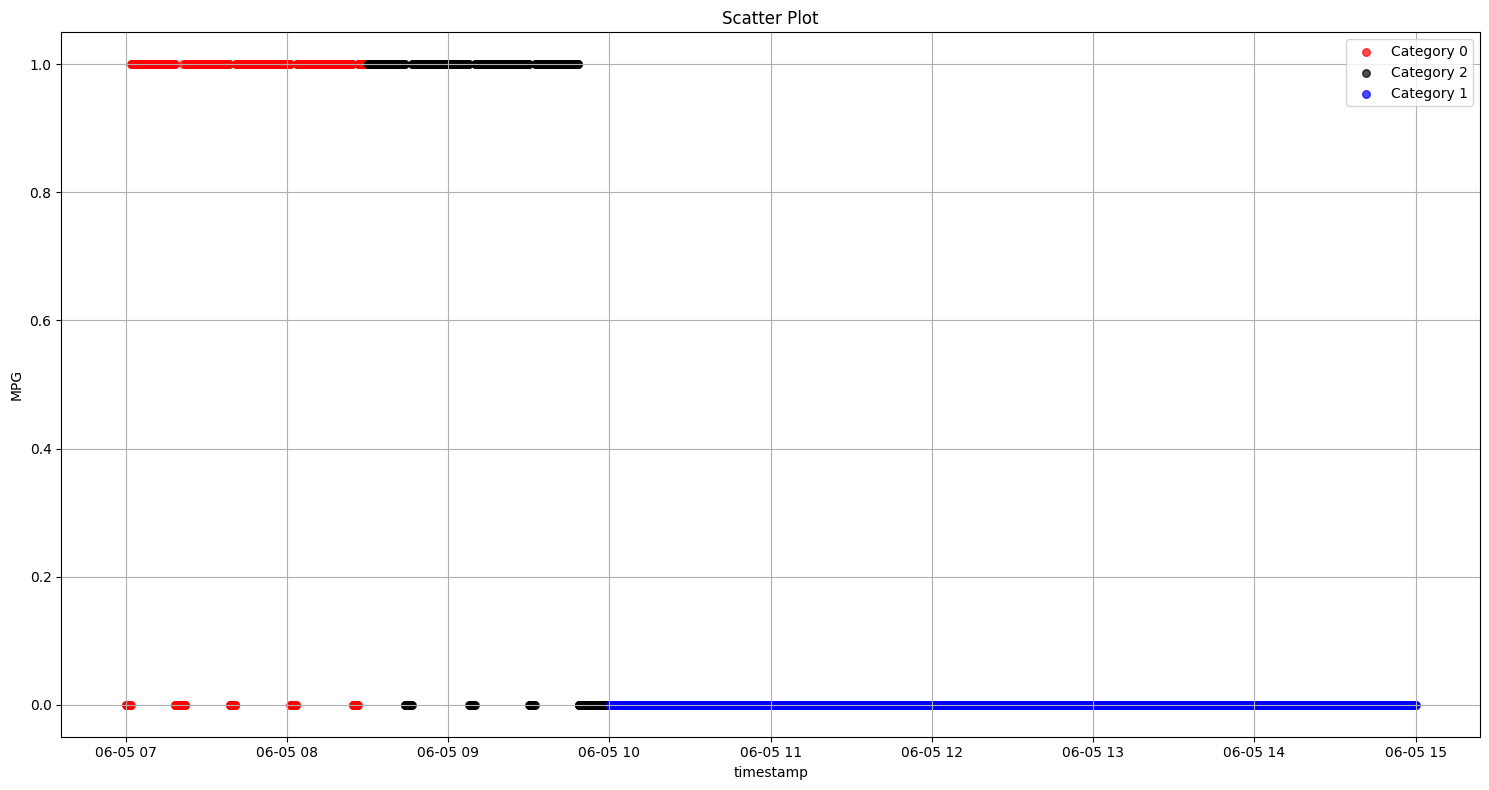

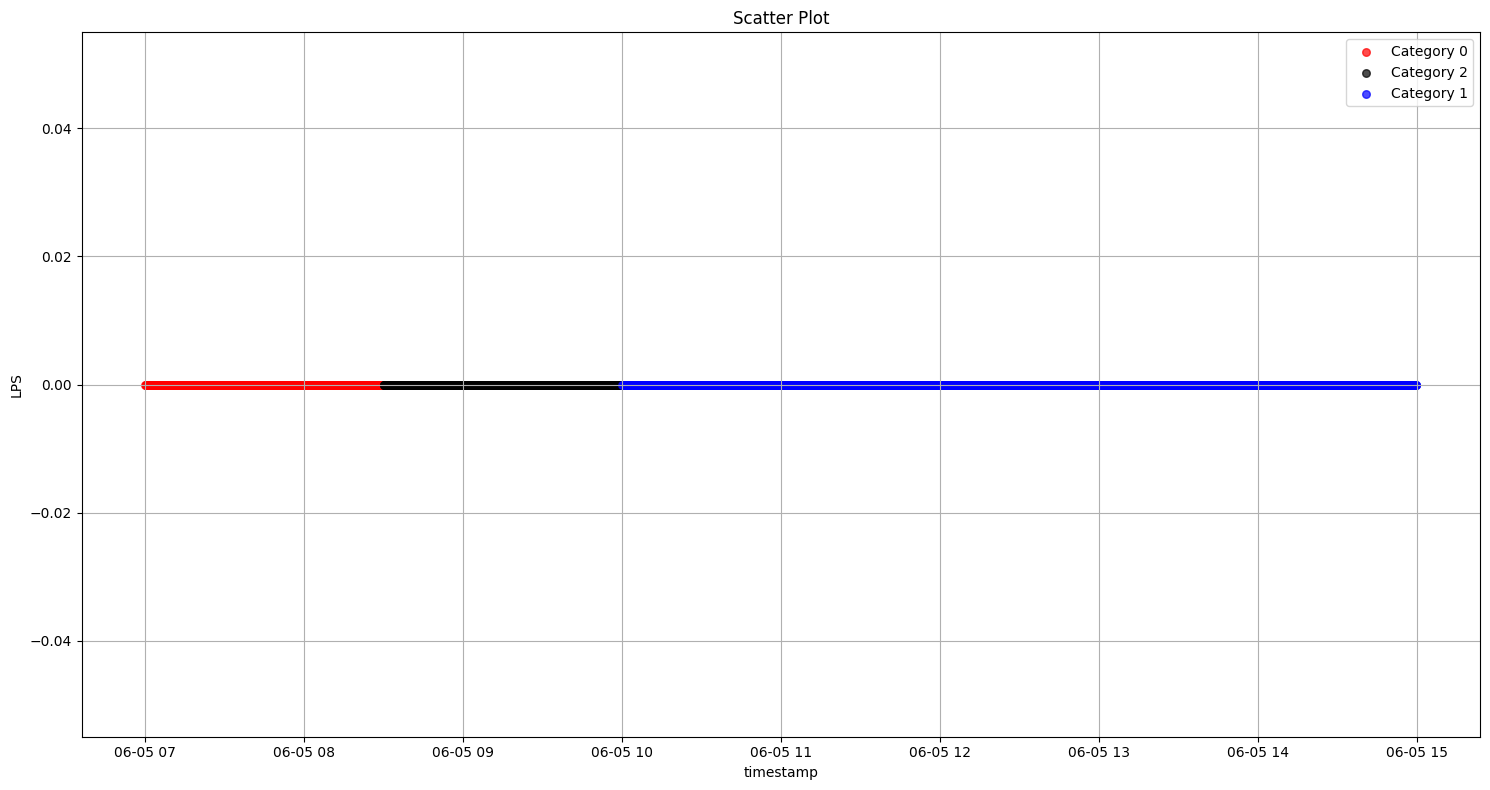

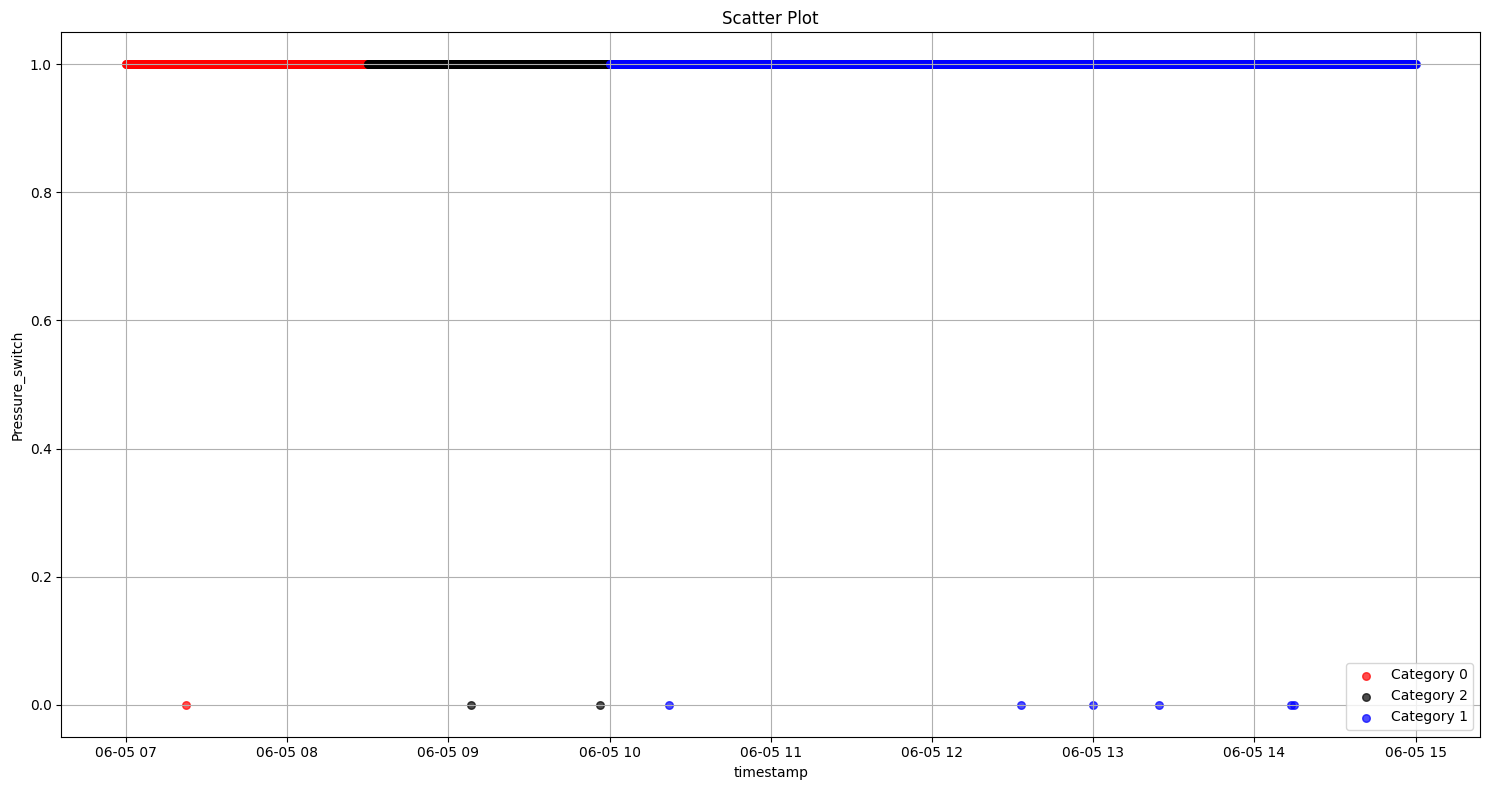

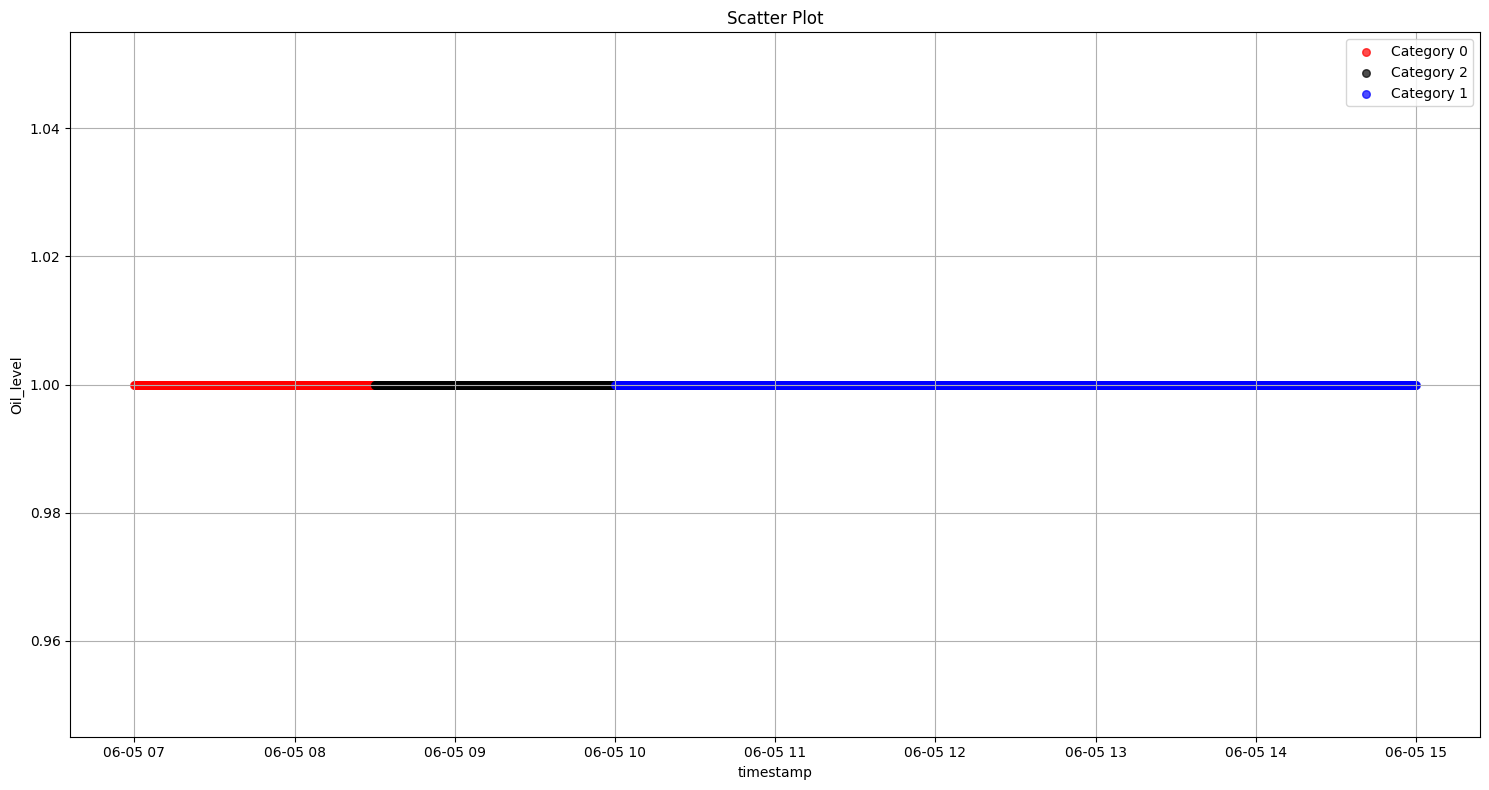

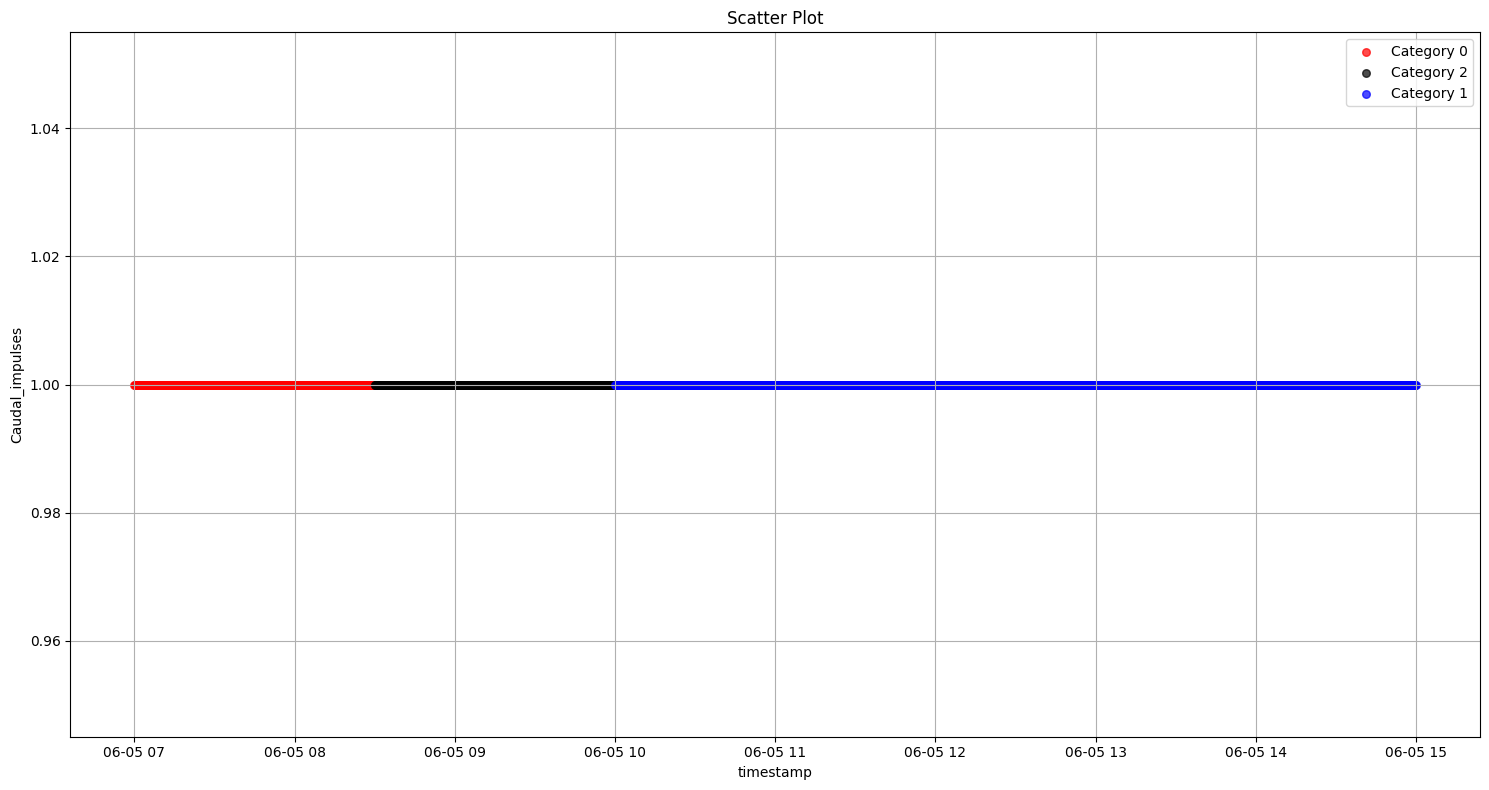

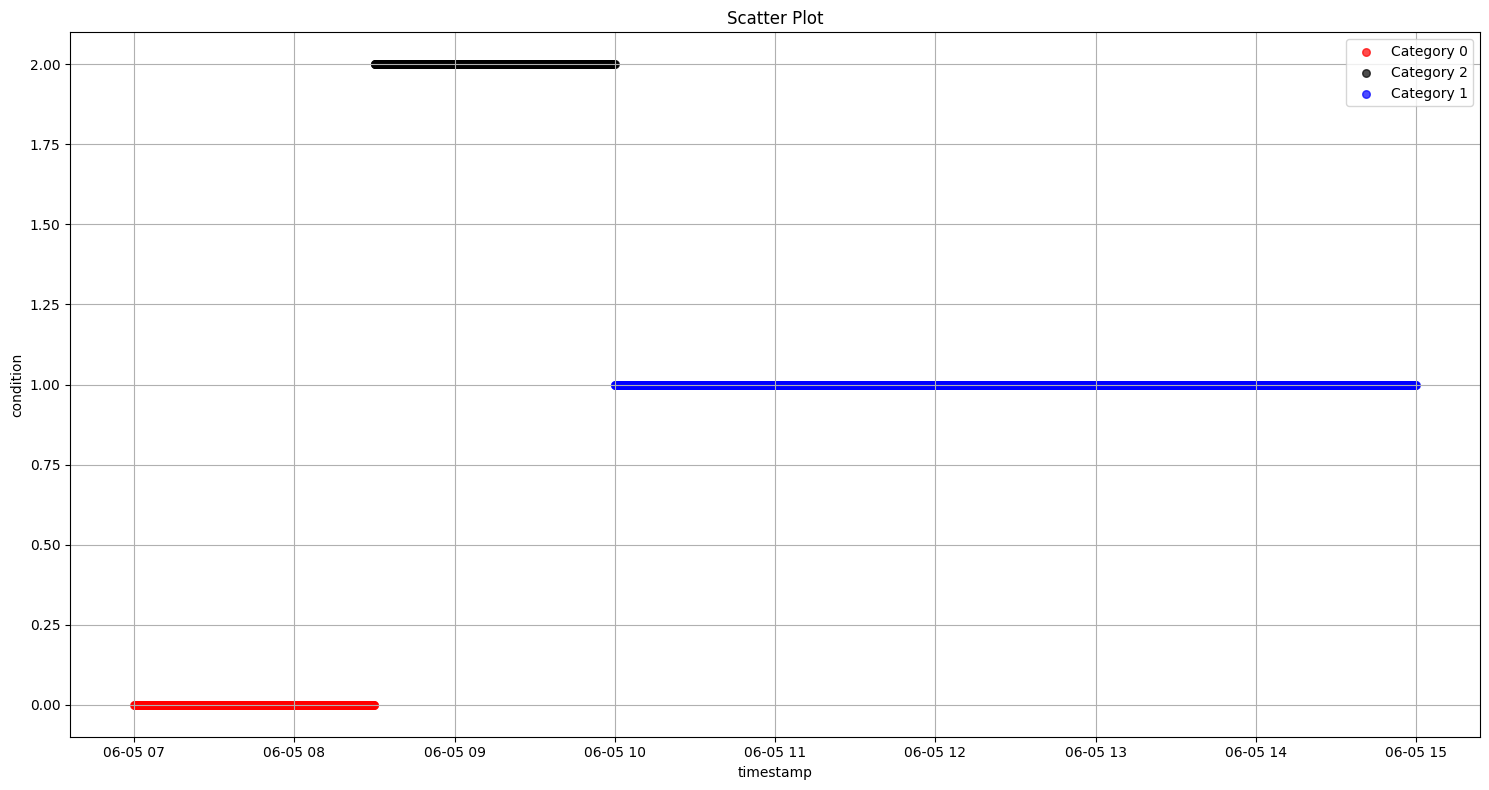

In [46]:
for i in column_names:
    mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df3, "2020-06-05 07:00:00", "2020-06-05 15:00:00"), "timestamp", i, "condition")

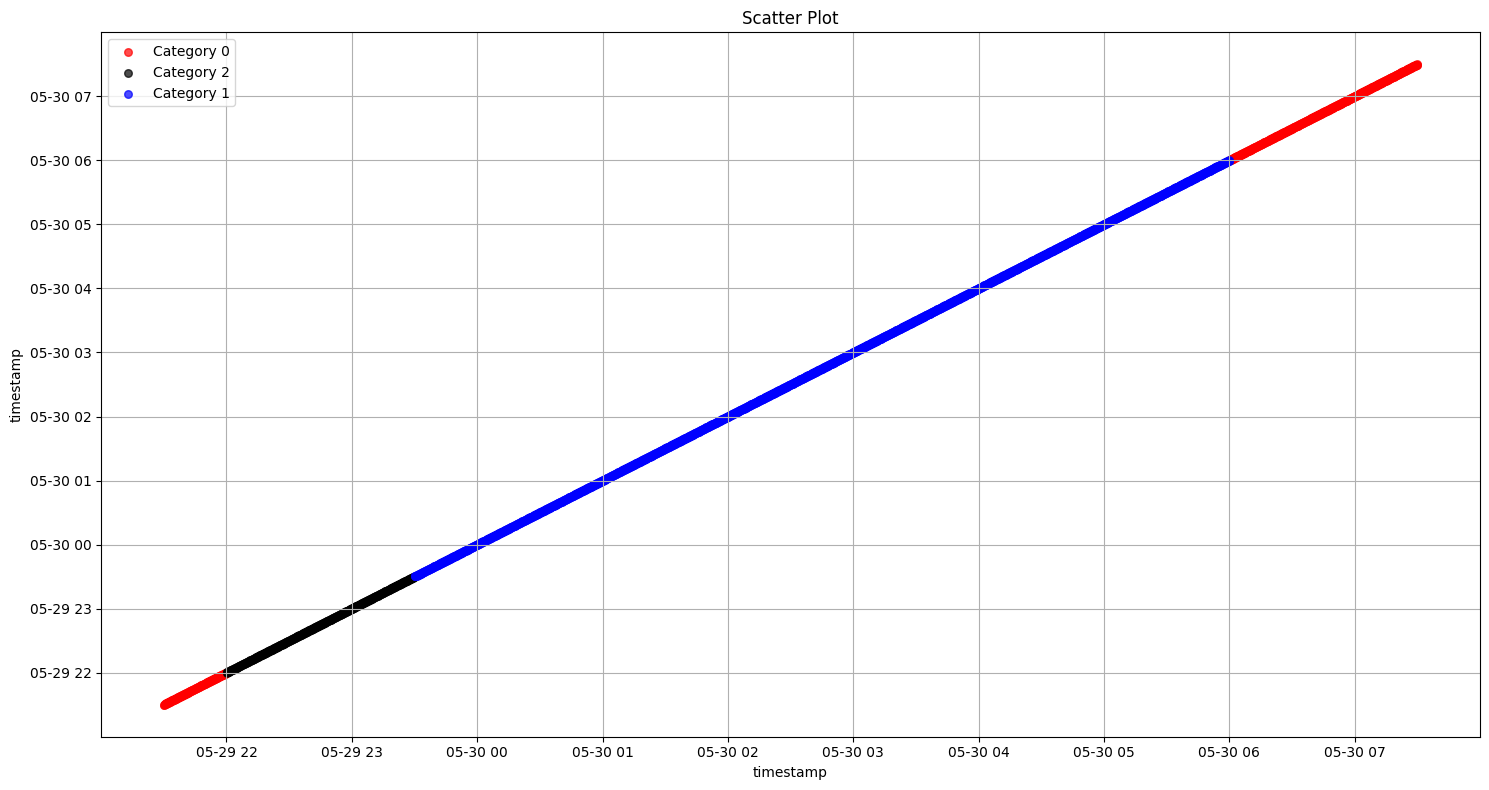

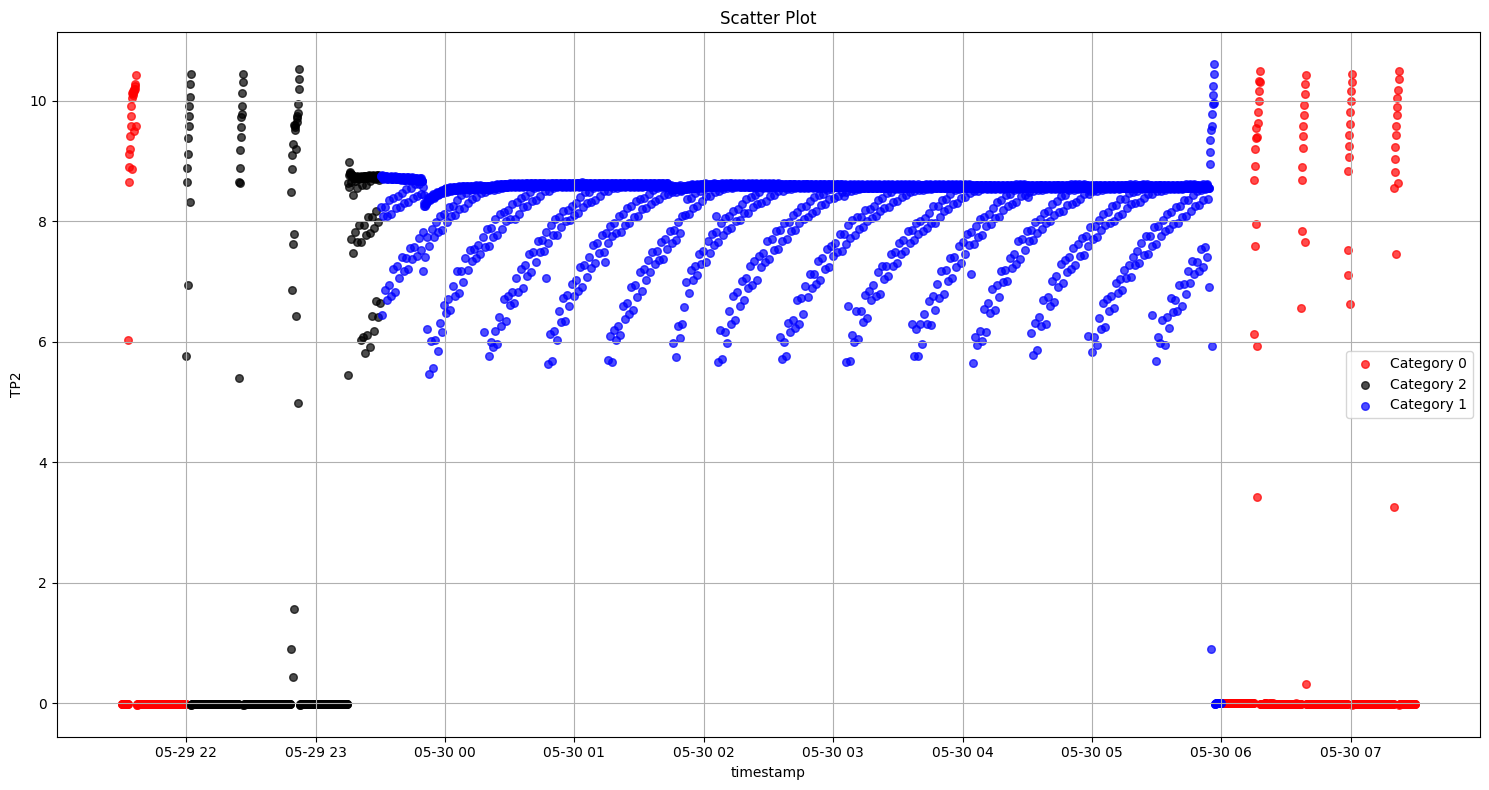

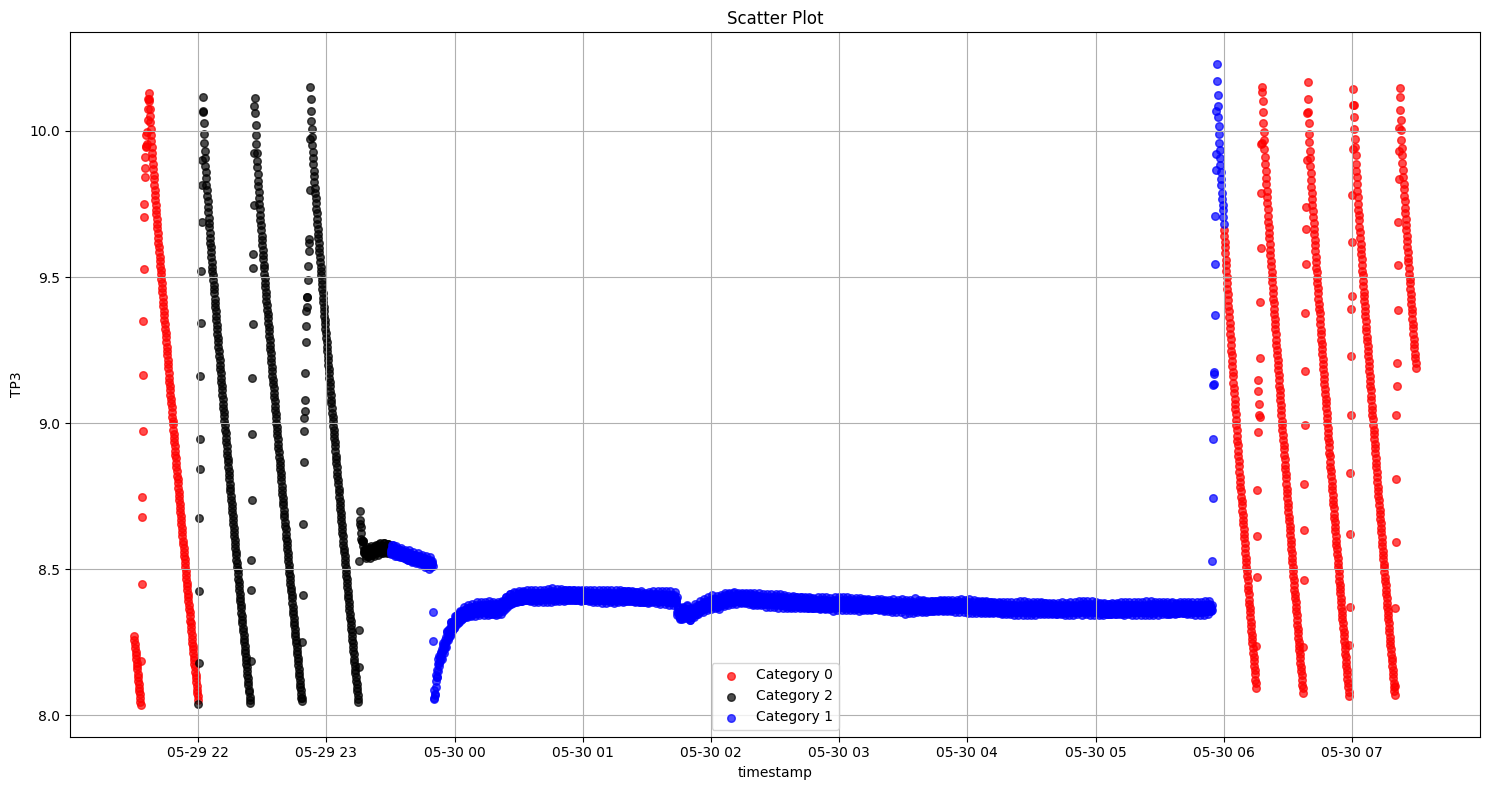

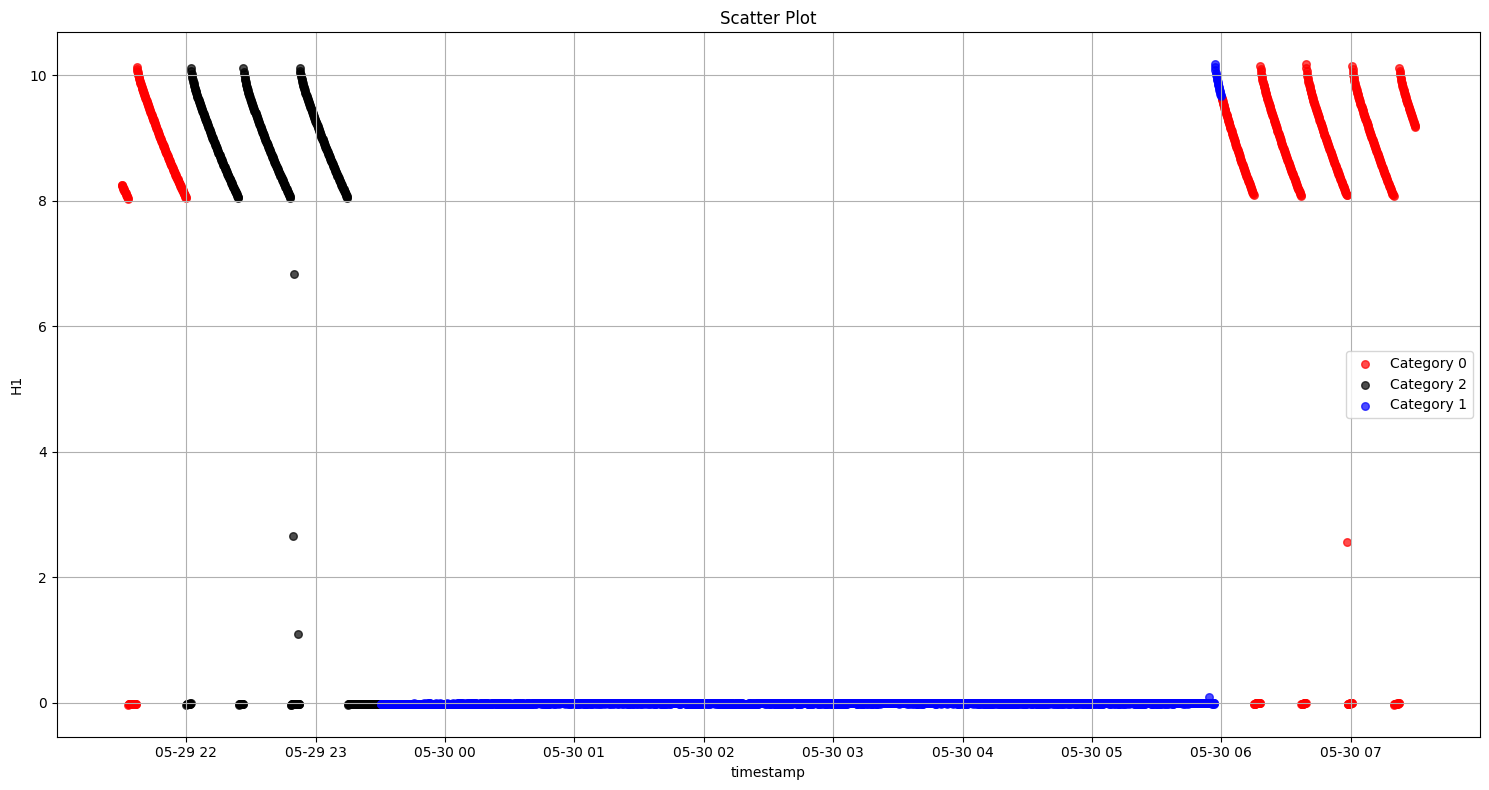

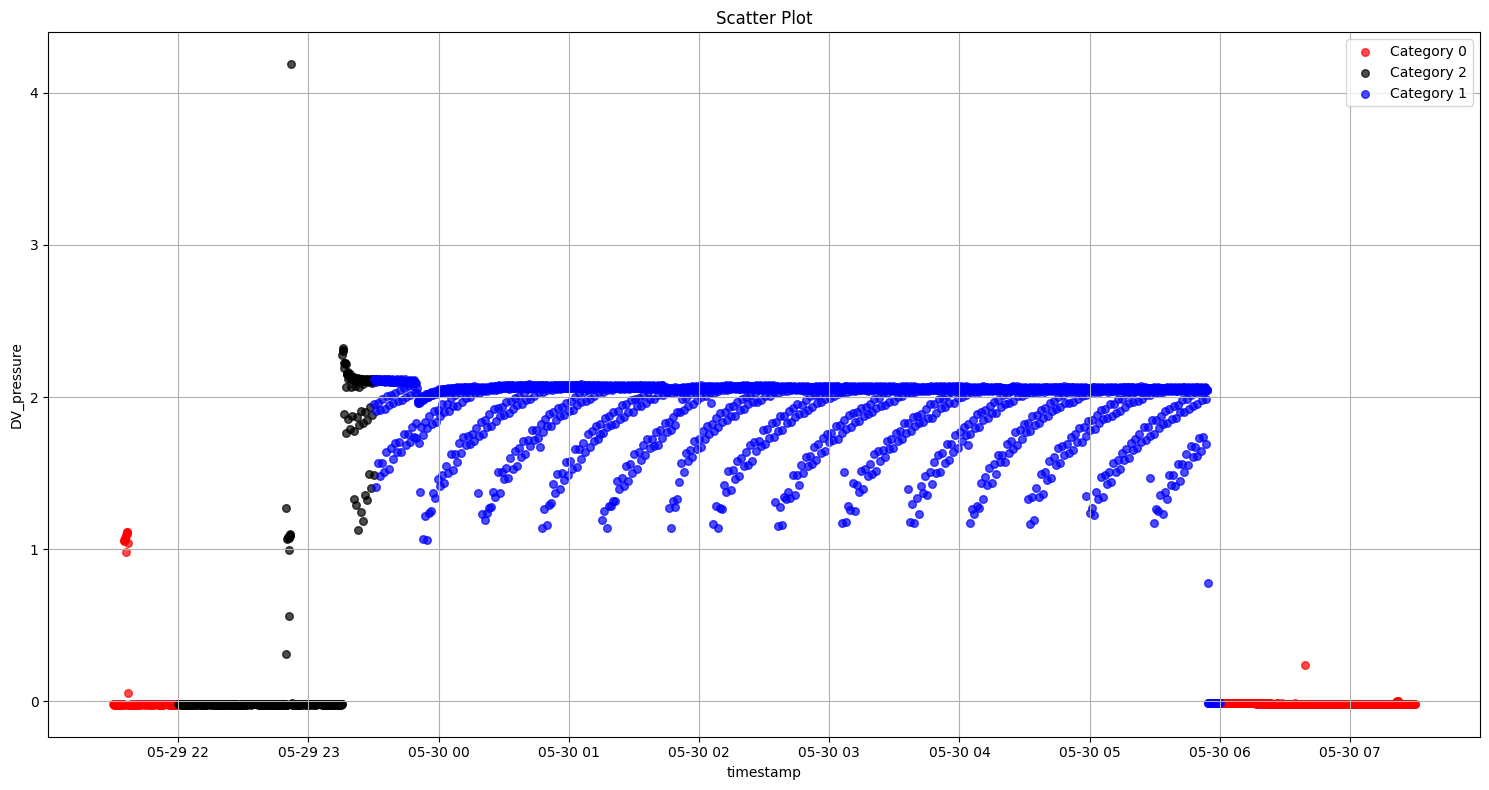

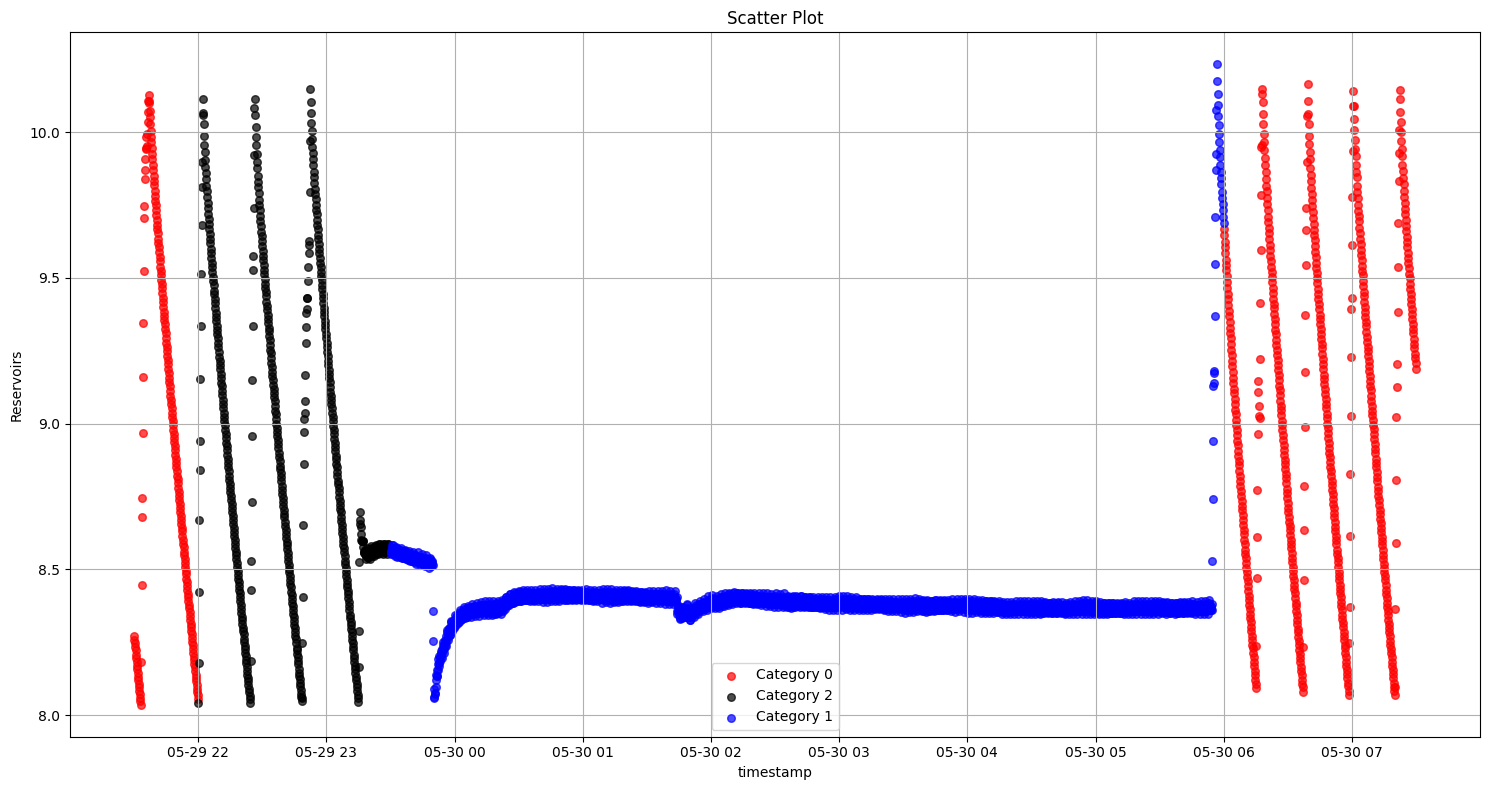

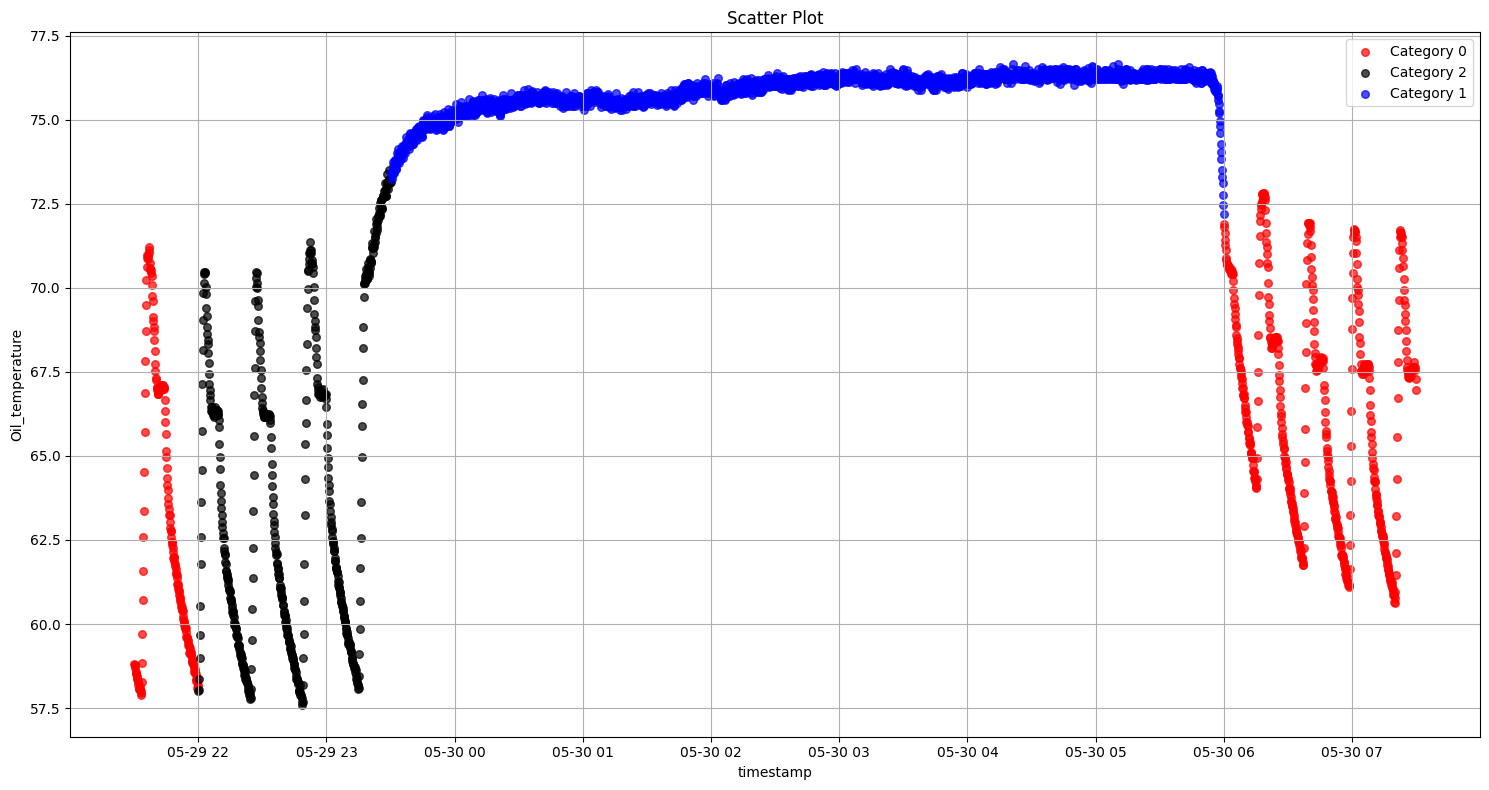

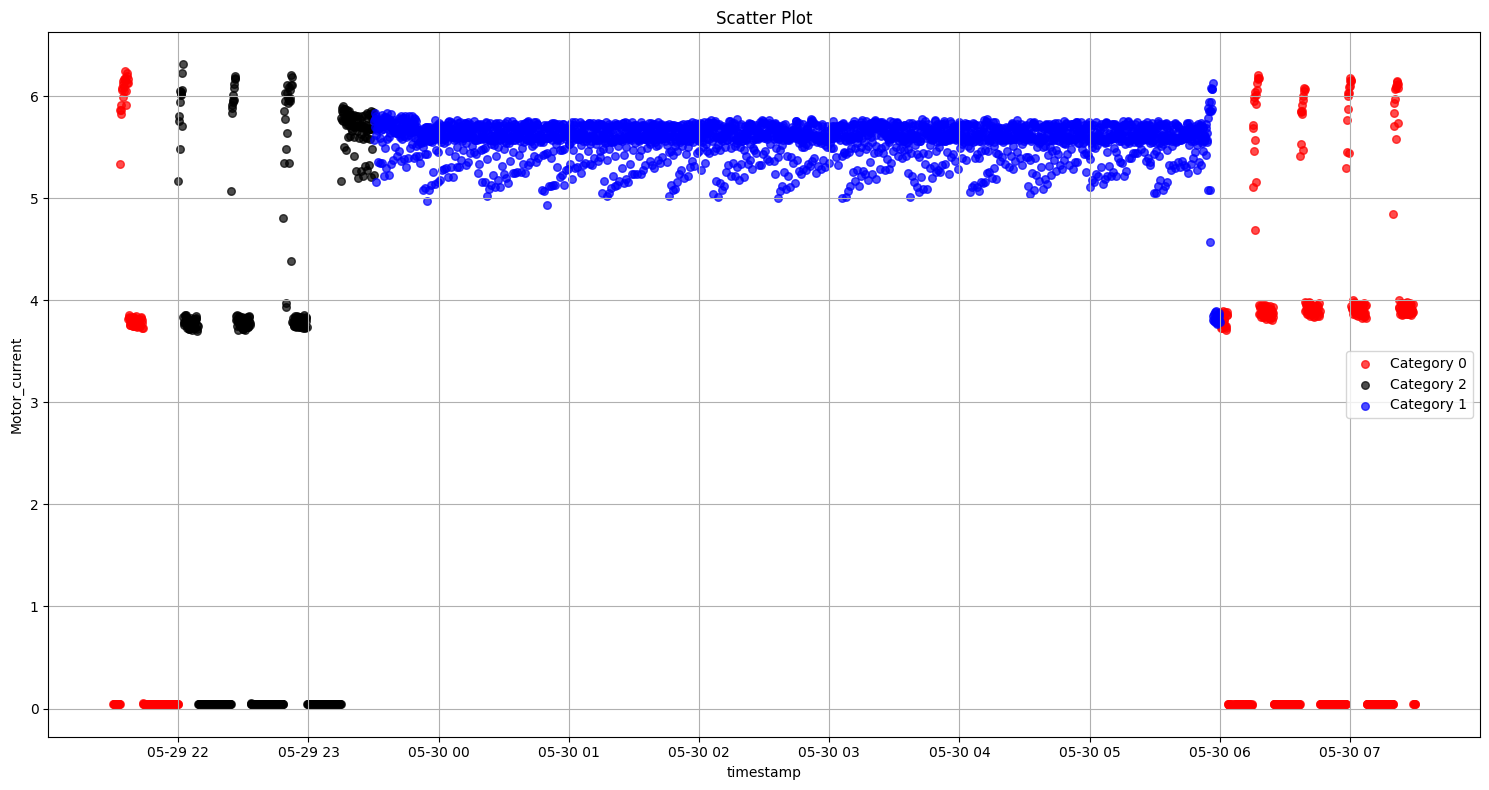

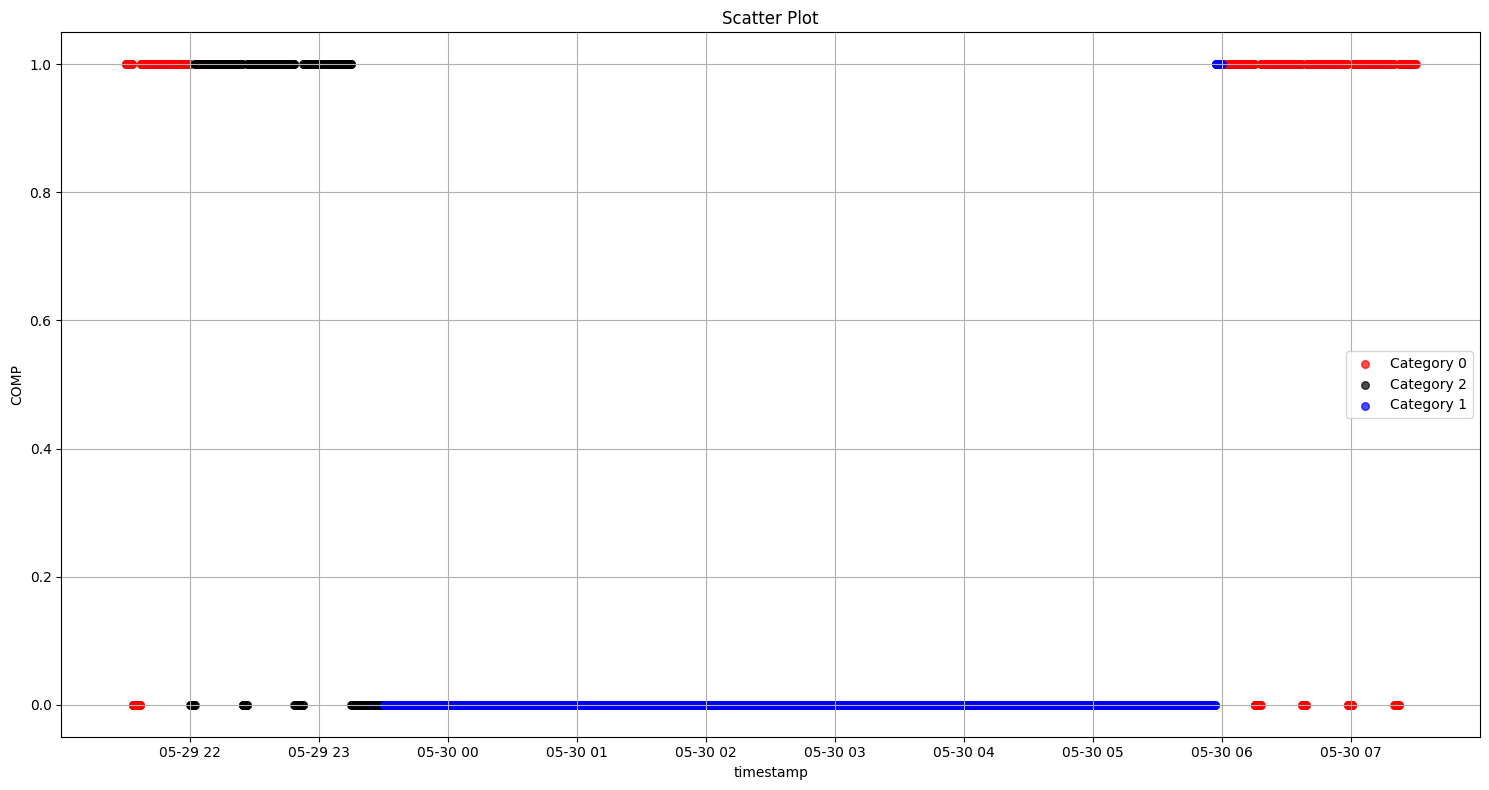

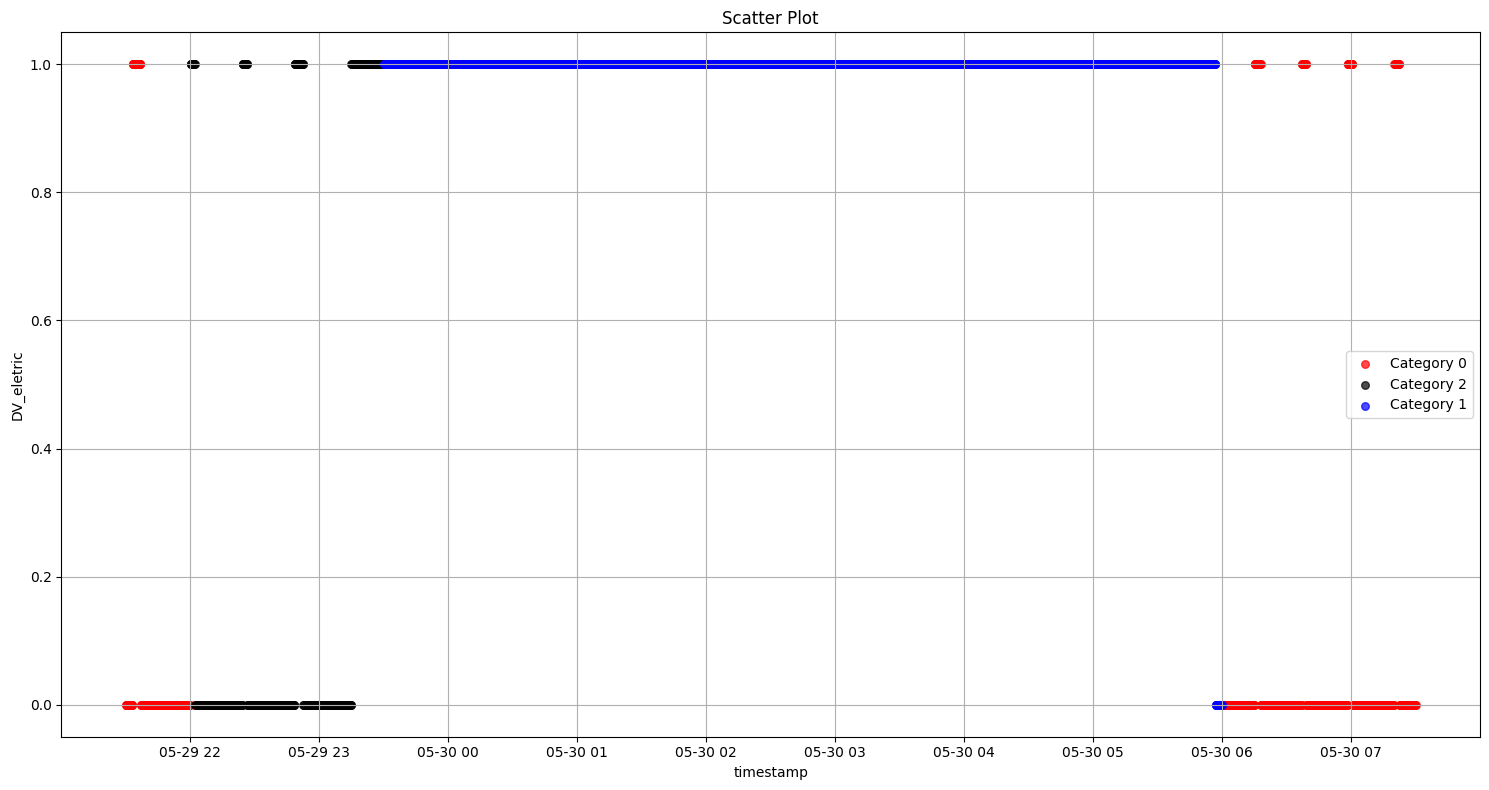

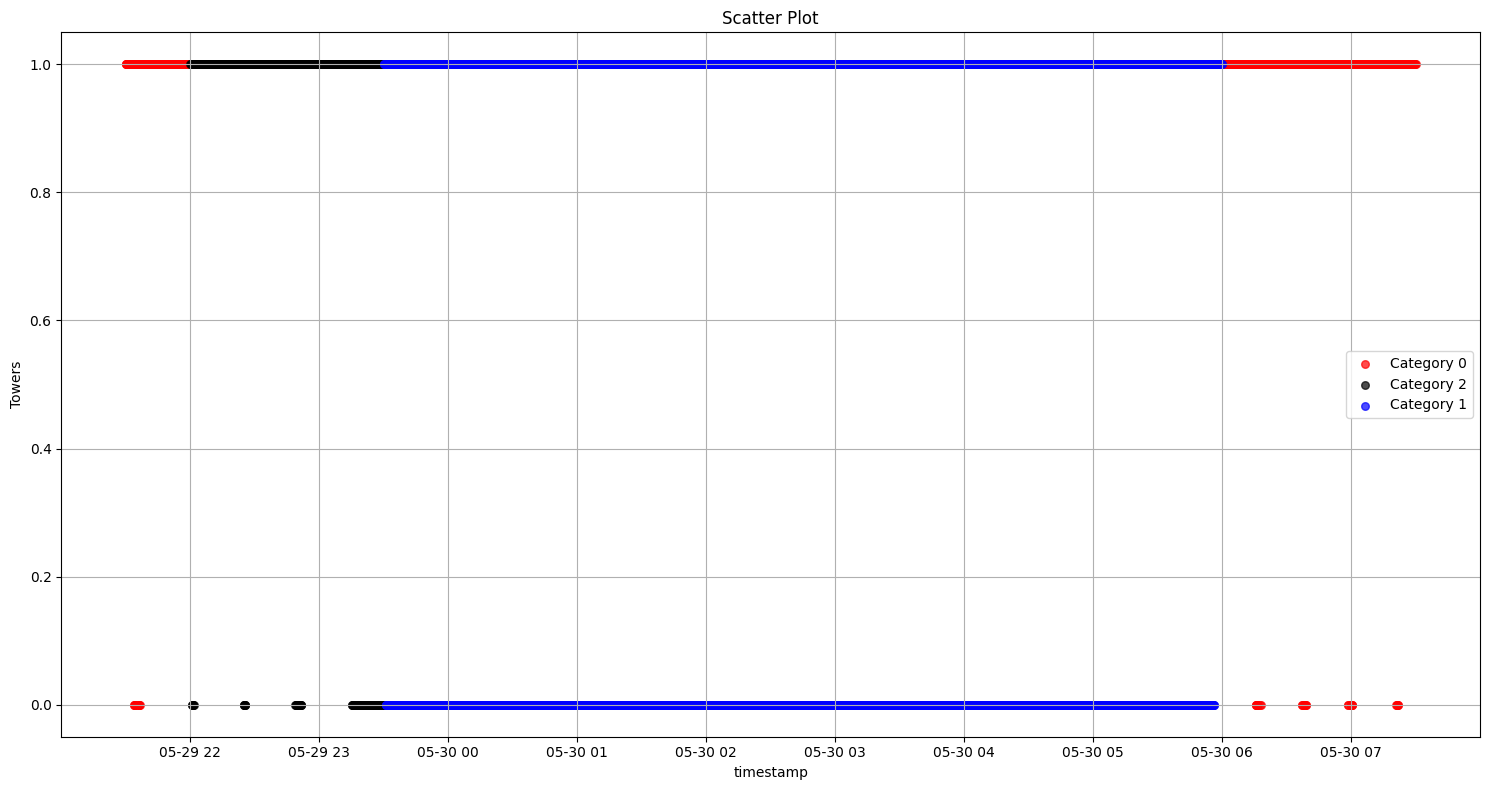

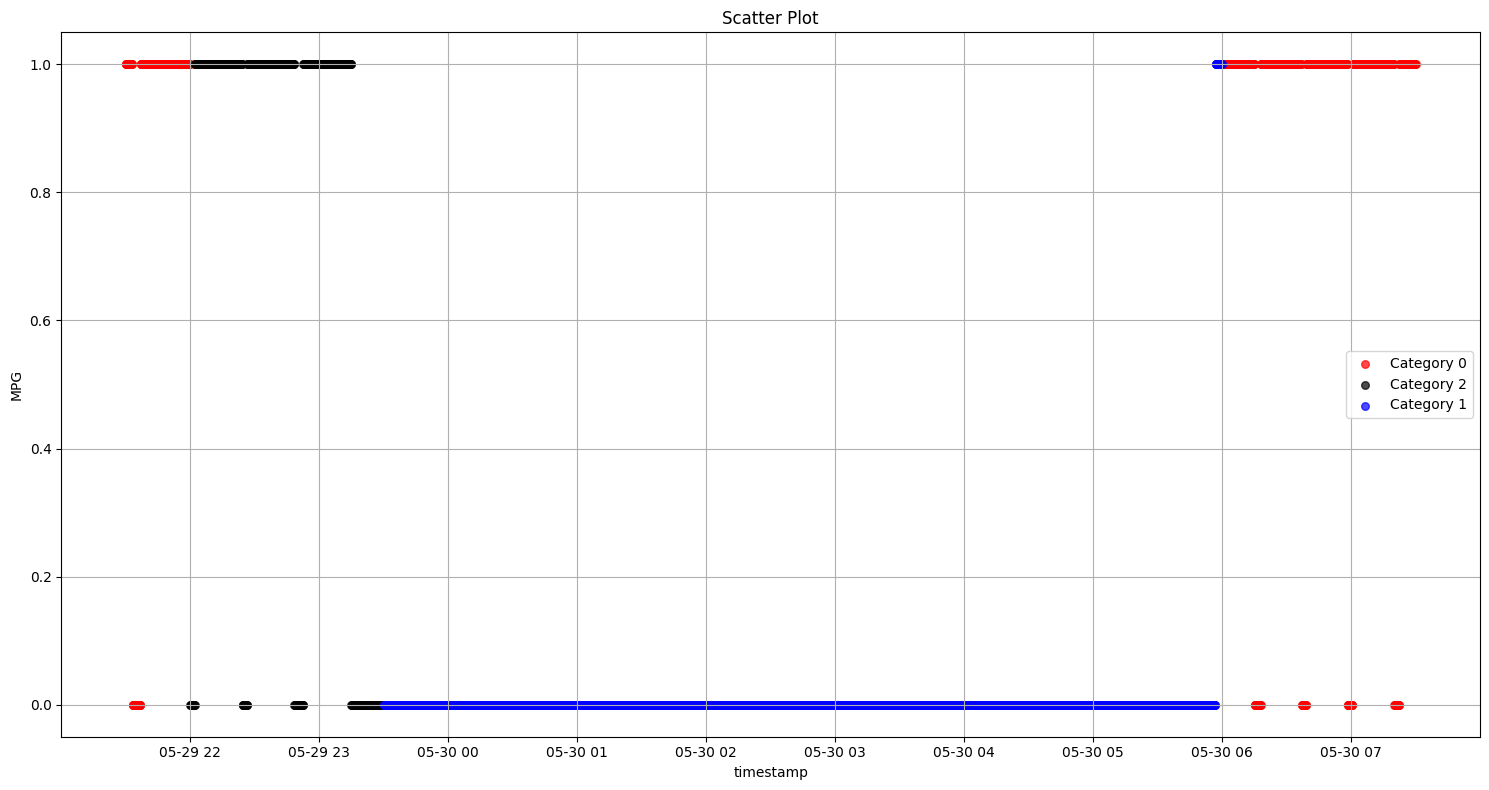

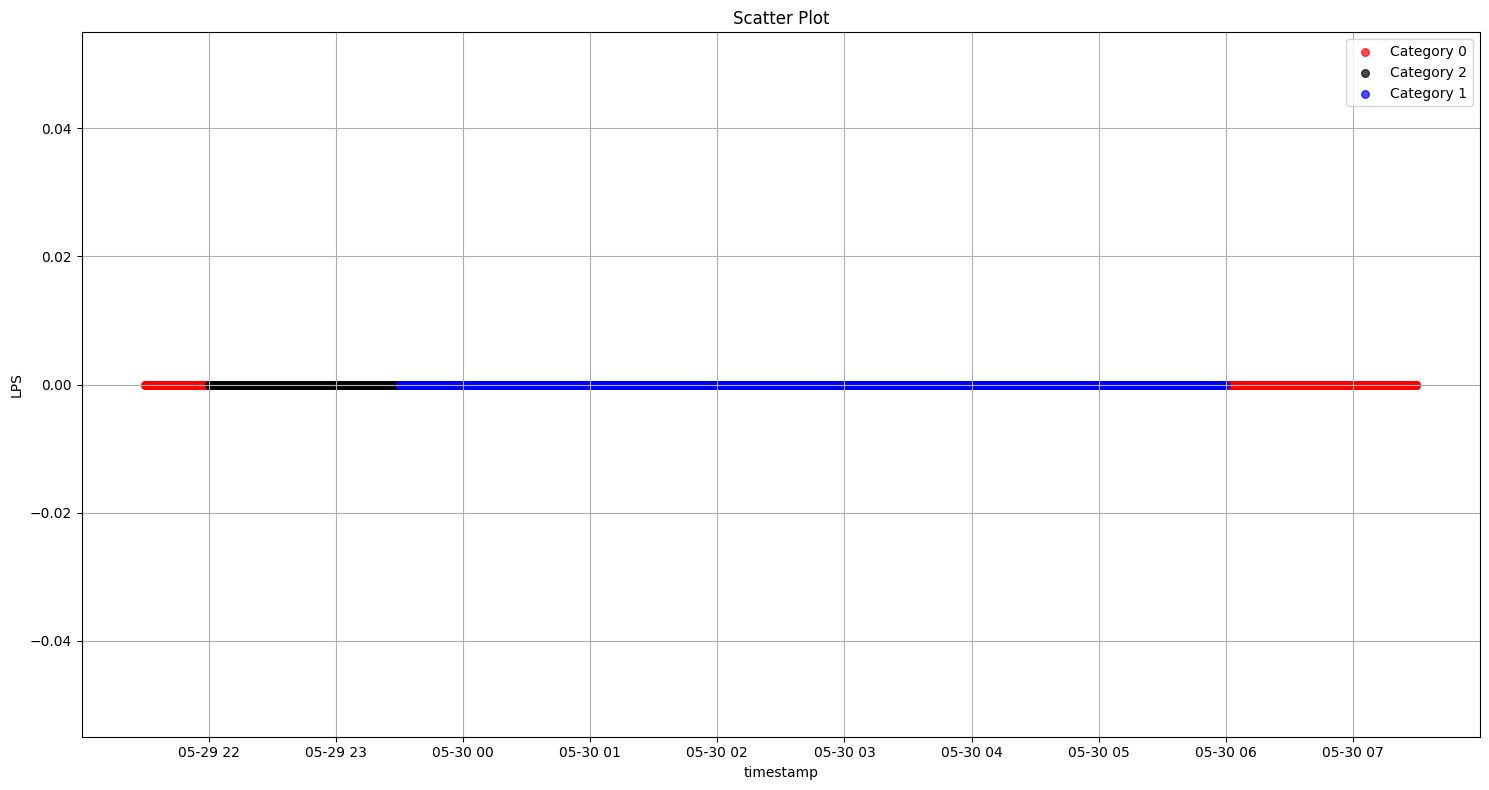

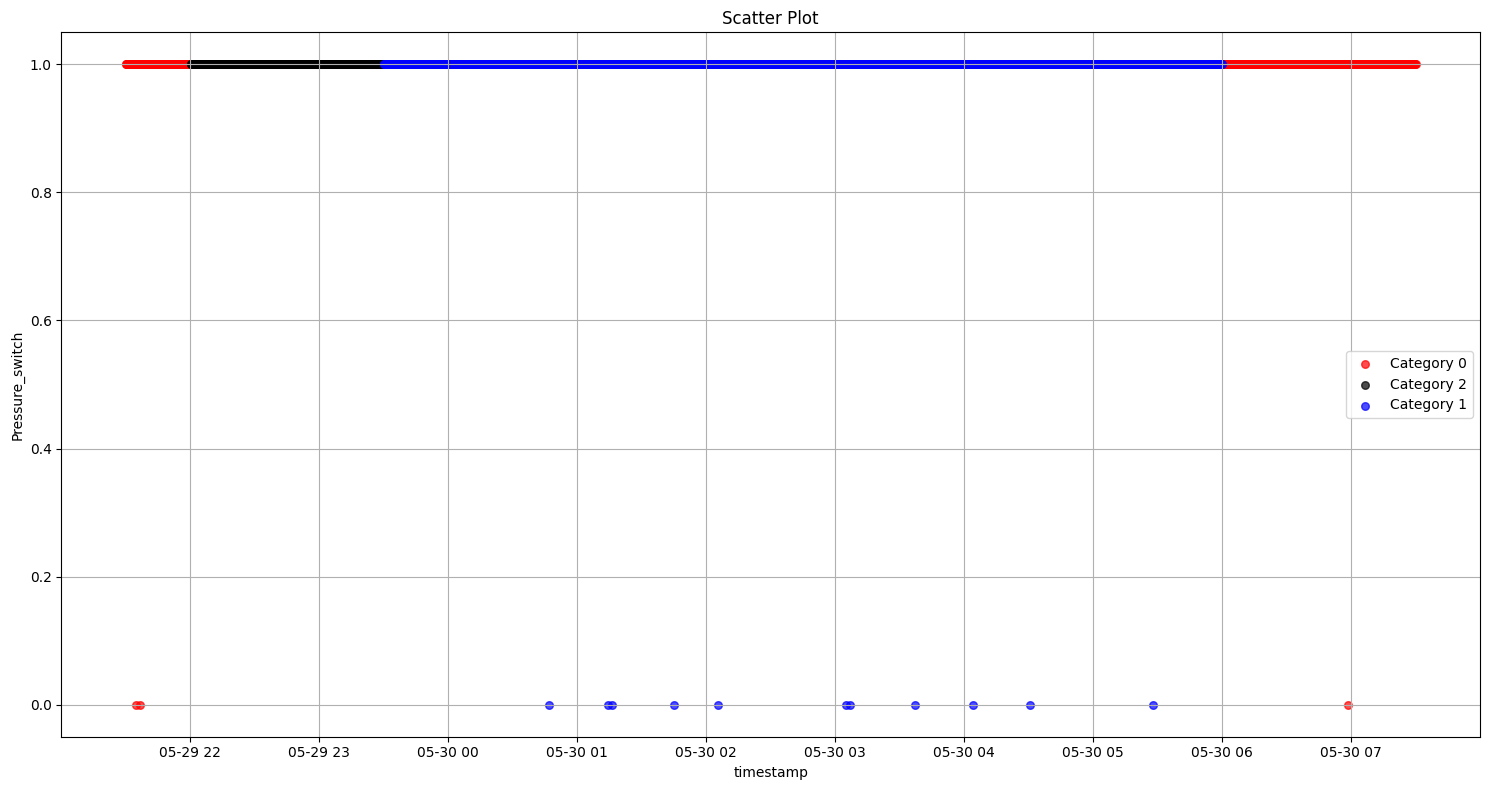

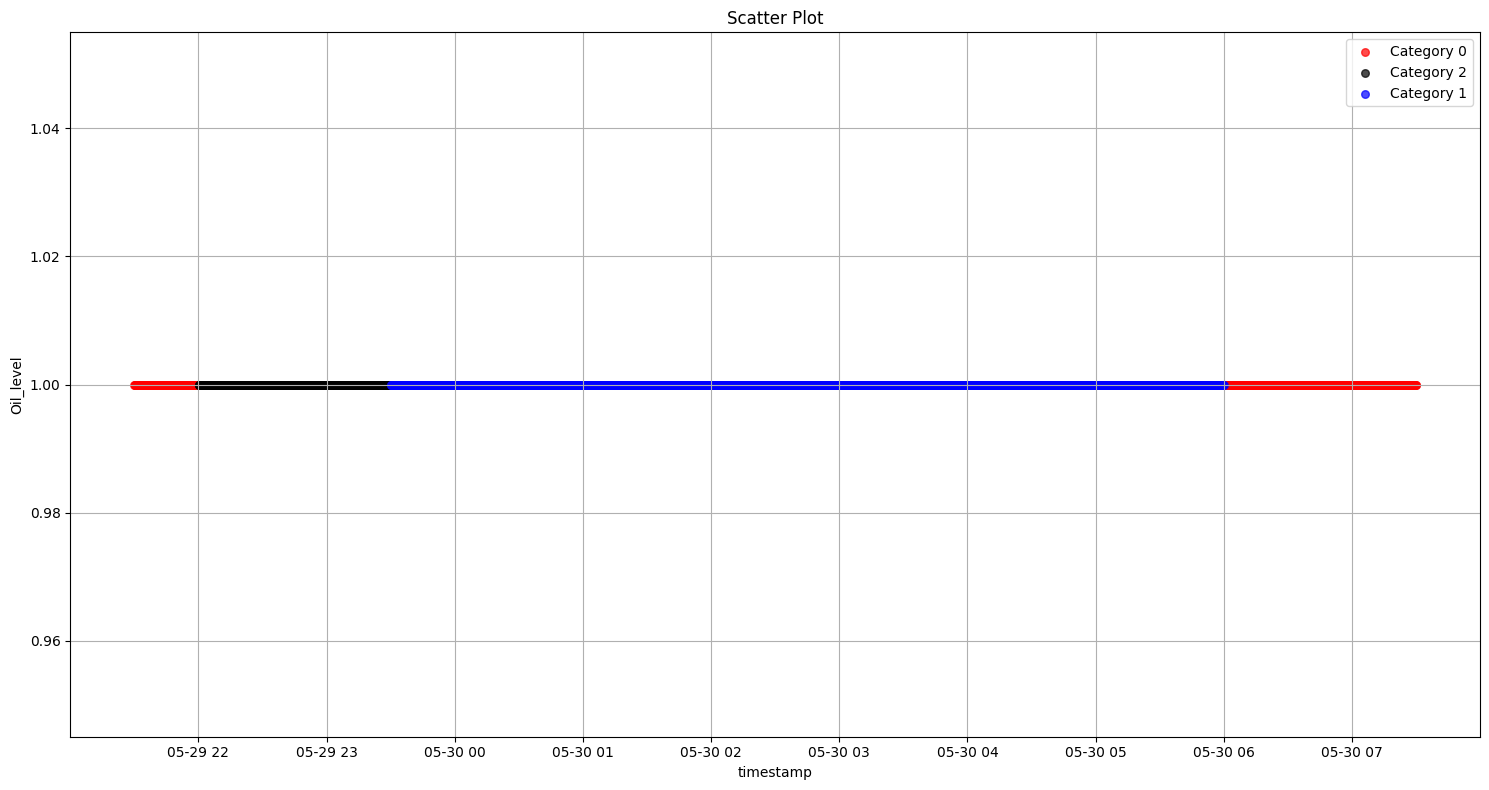

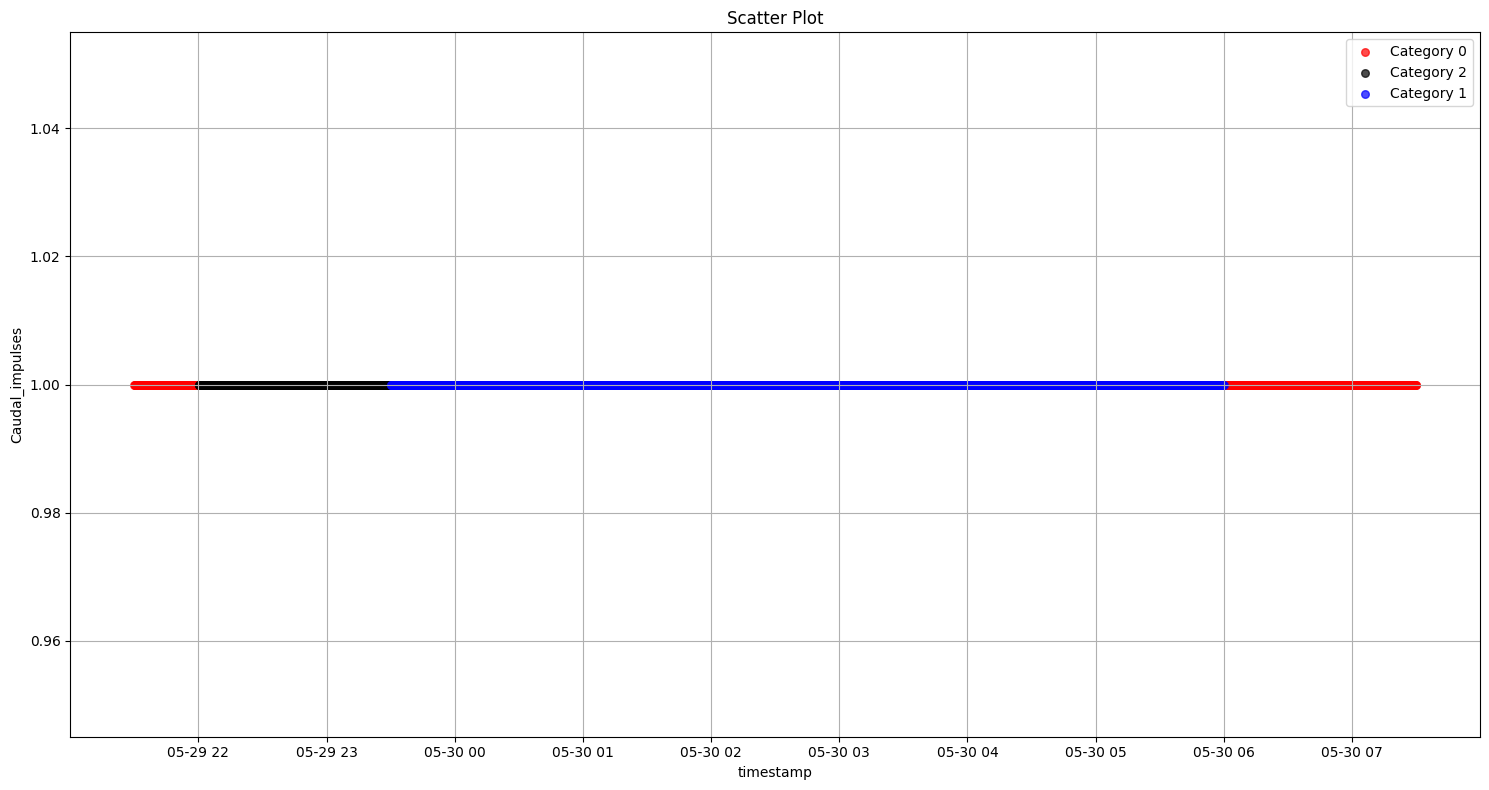

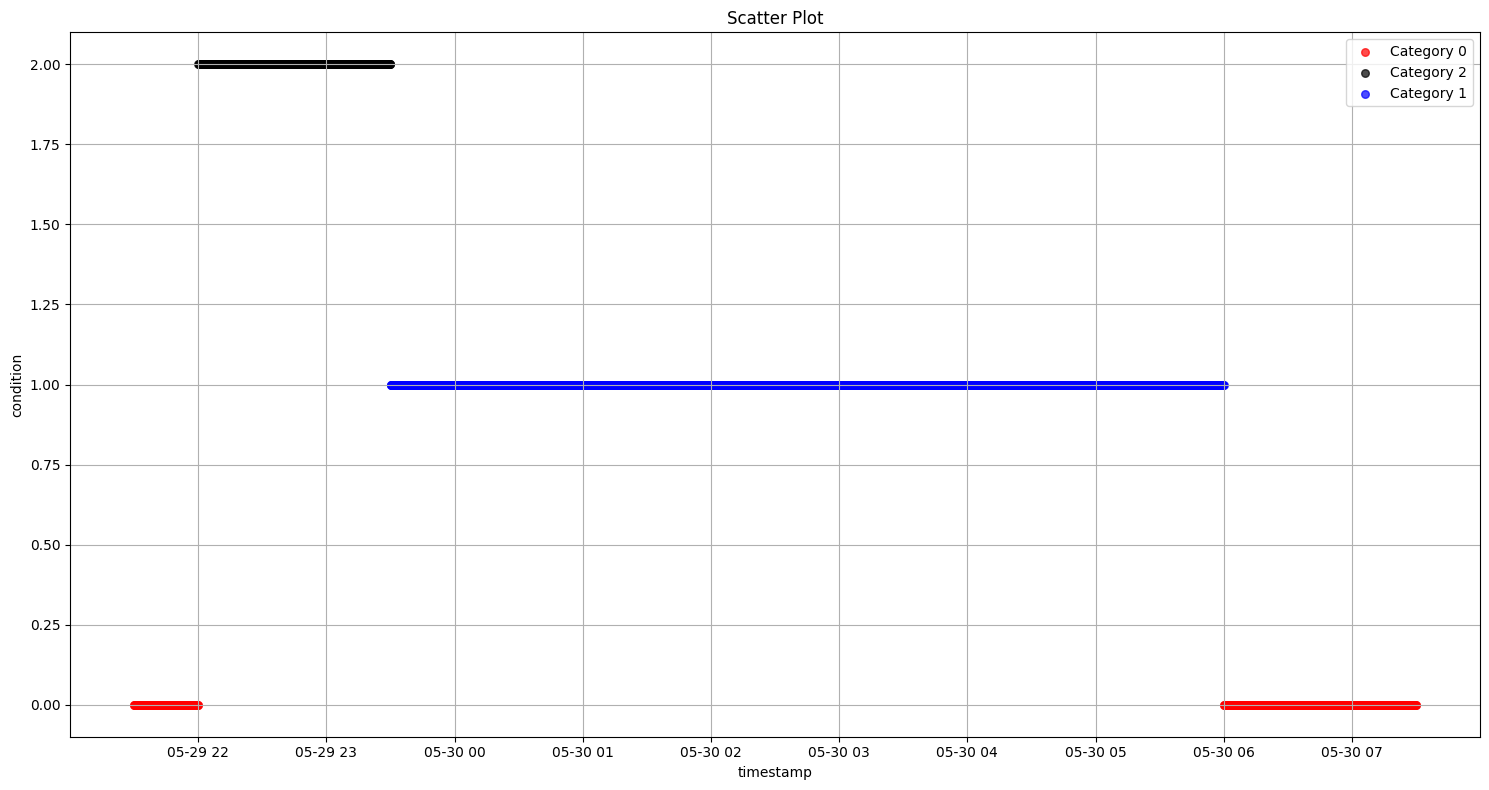

In [ ]:
for i in column_names:
    mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df3, "2020-05-29 21:30:00", "2020-05-30 07:30:00"), "timestamp", i, "condition")

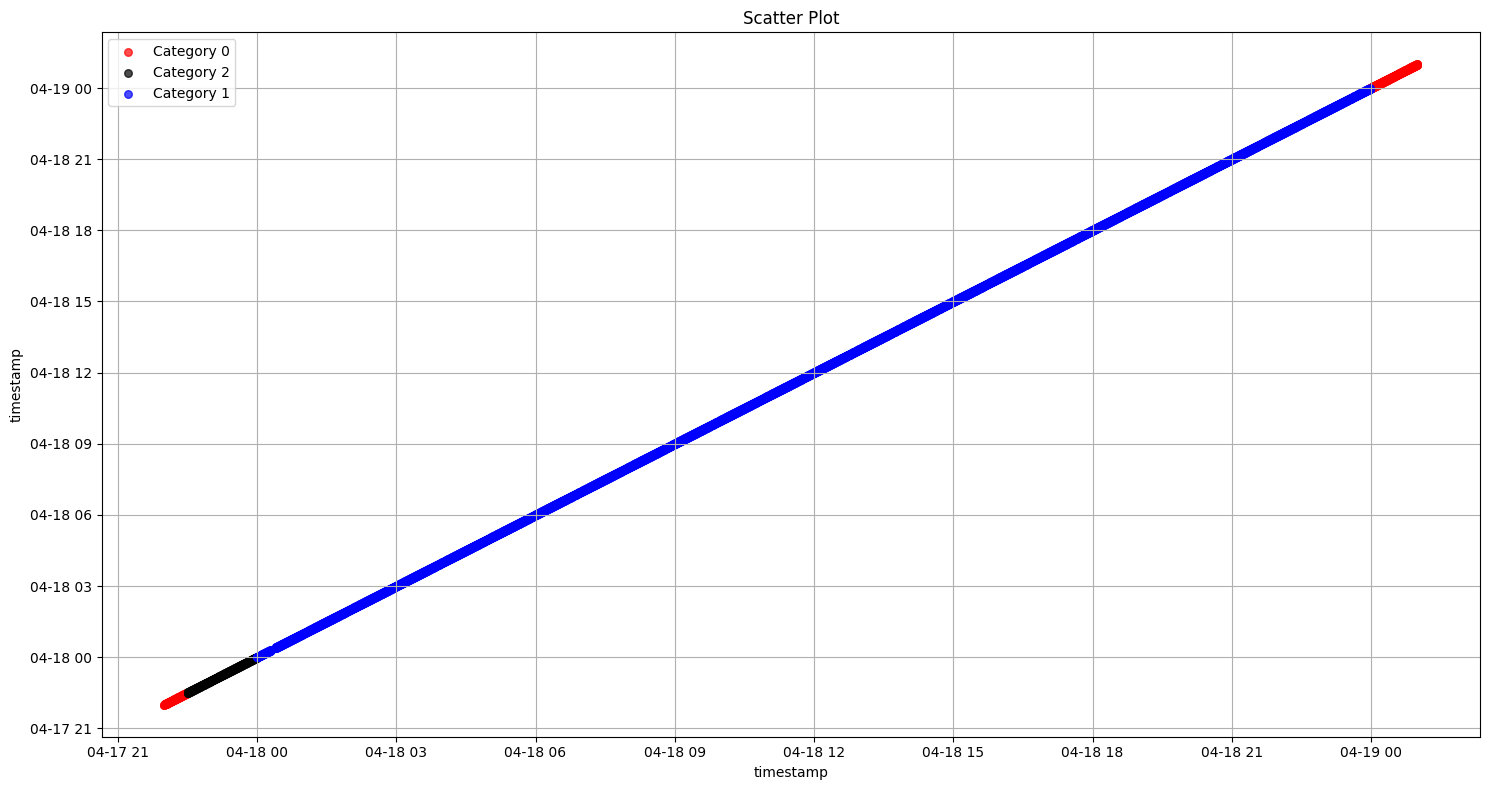

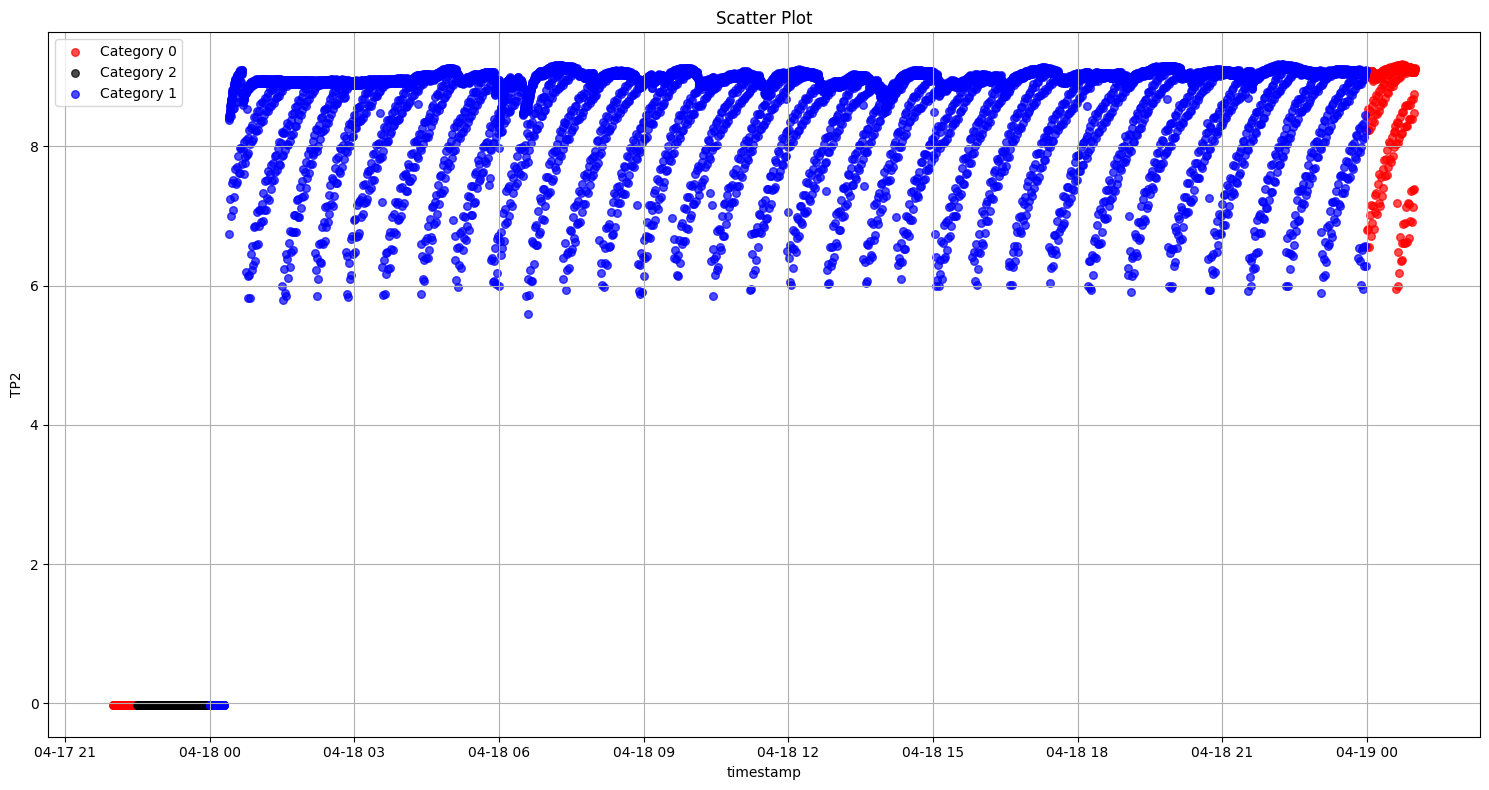

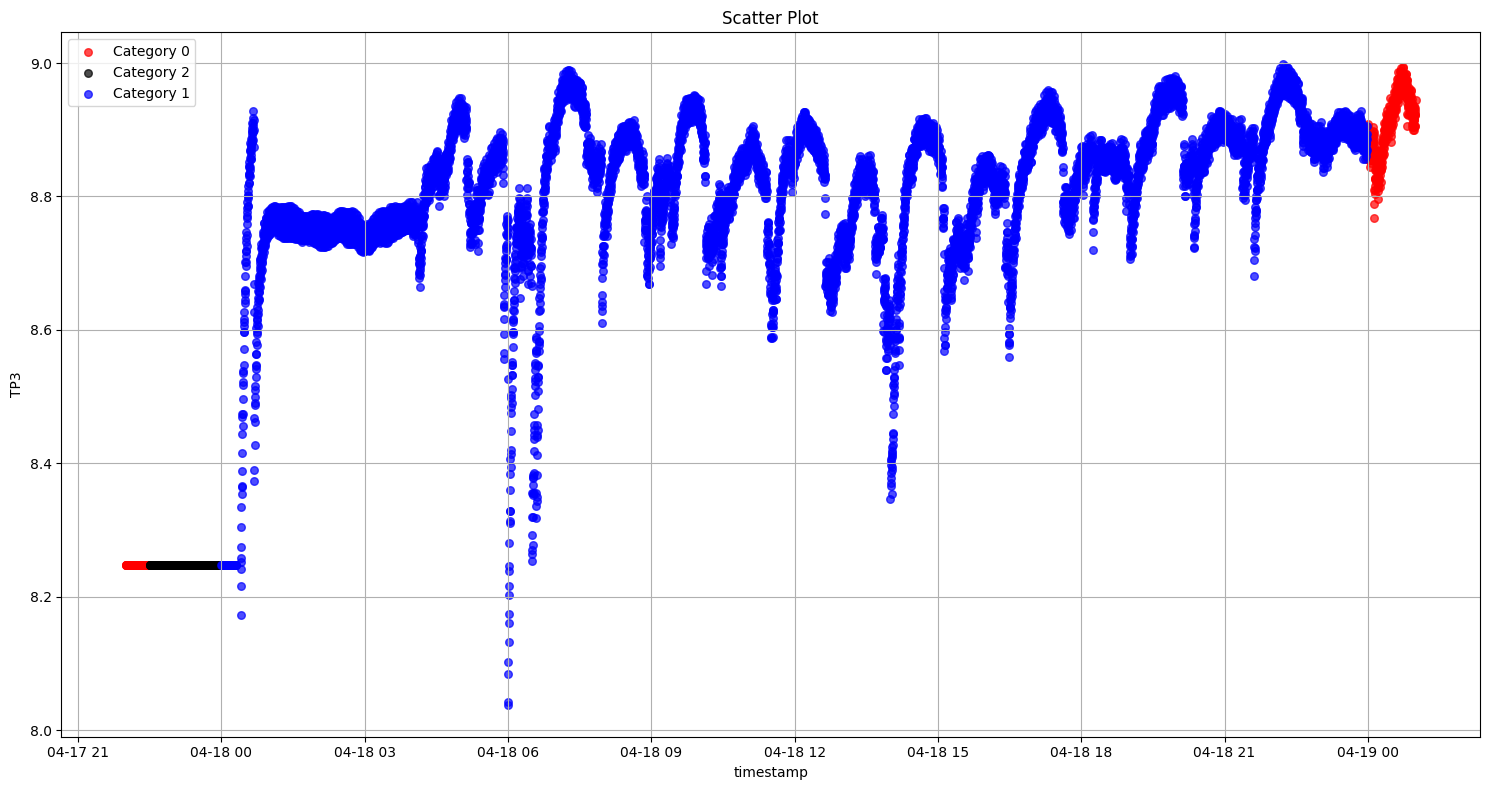

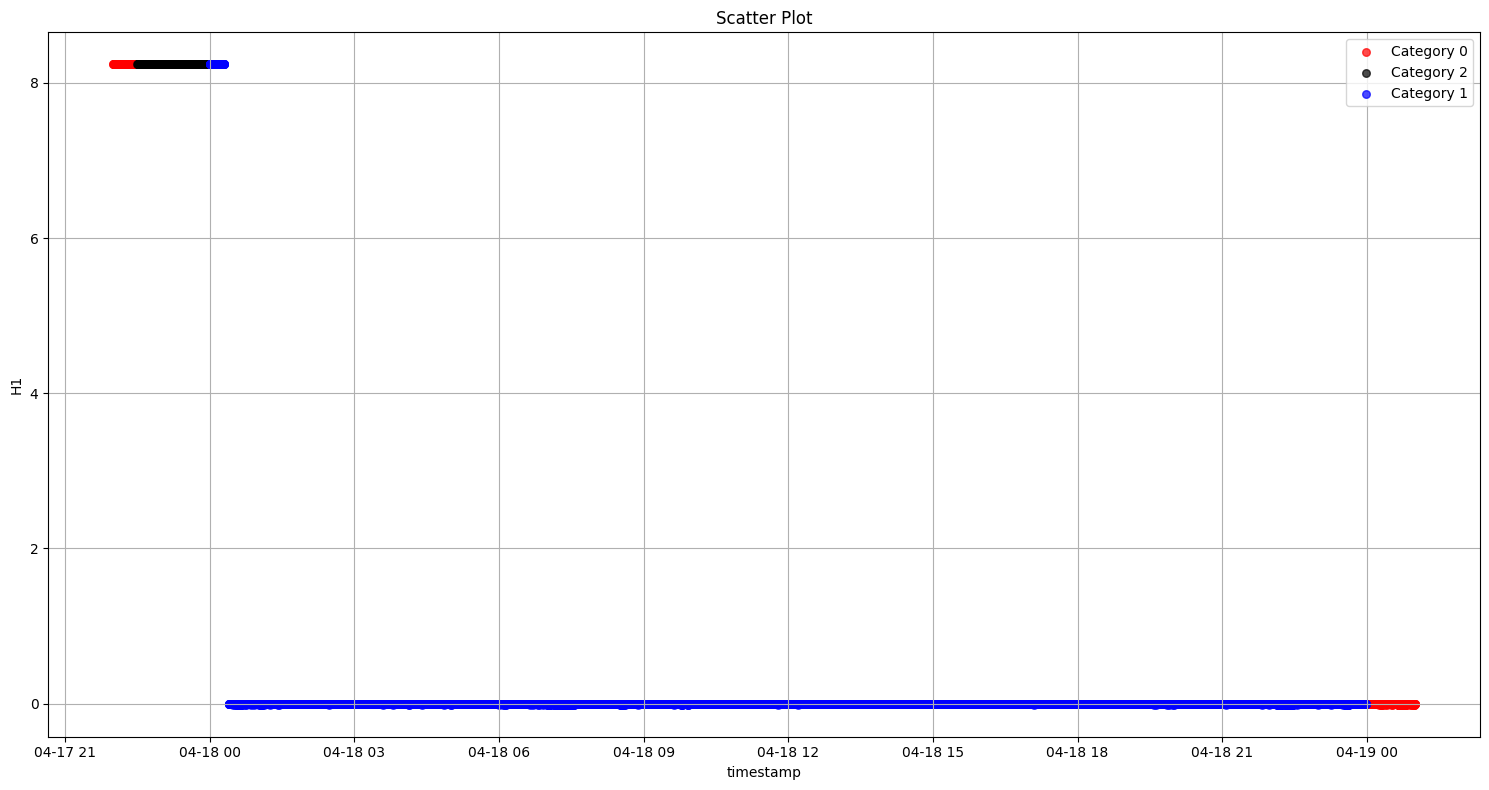

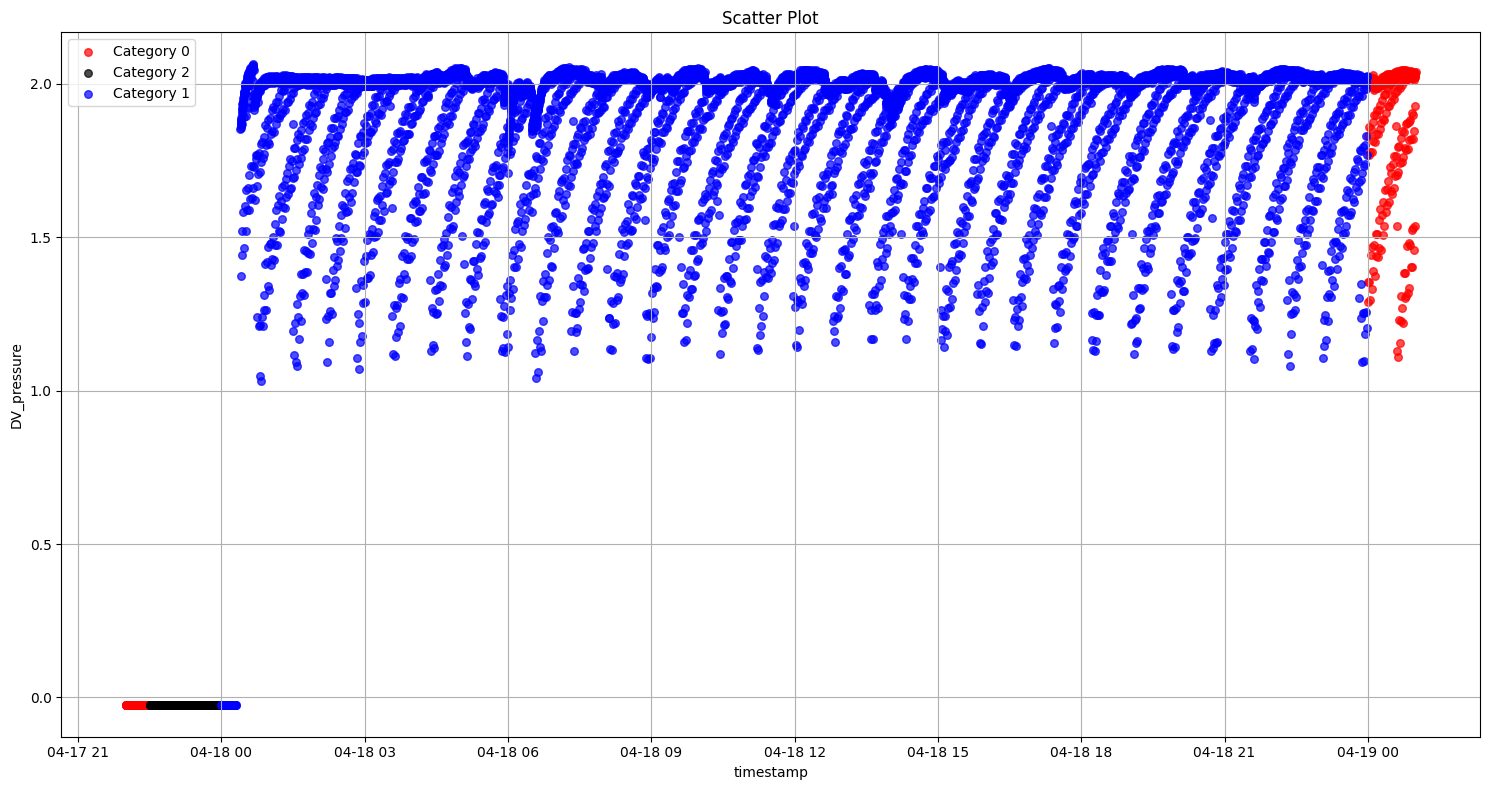

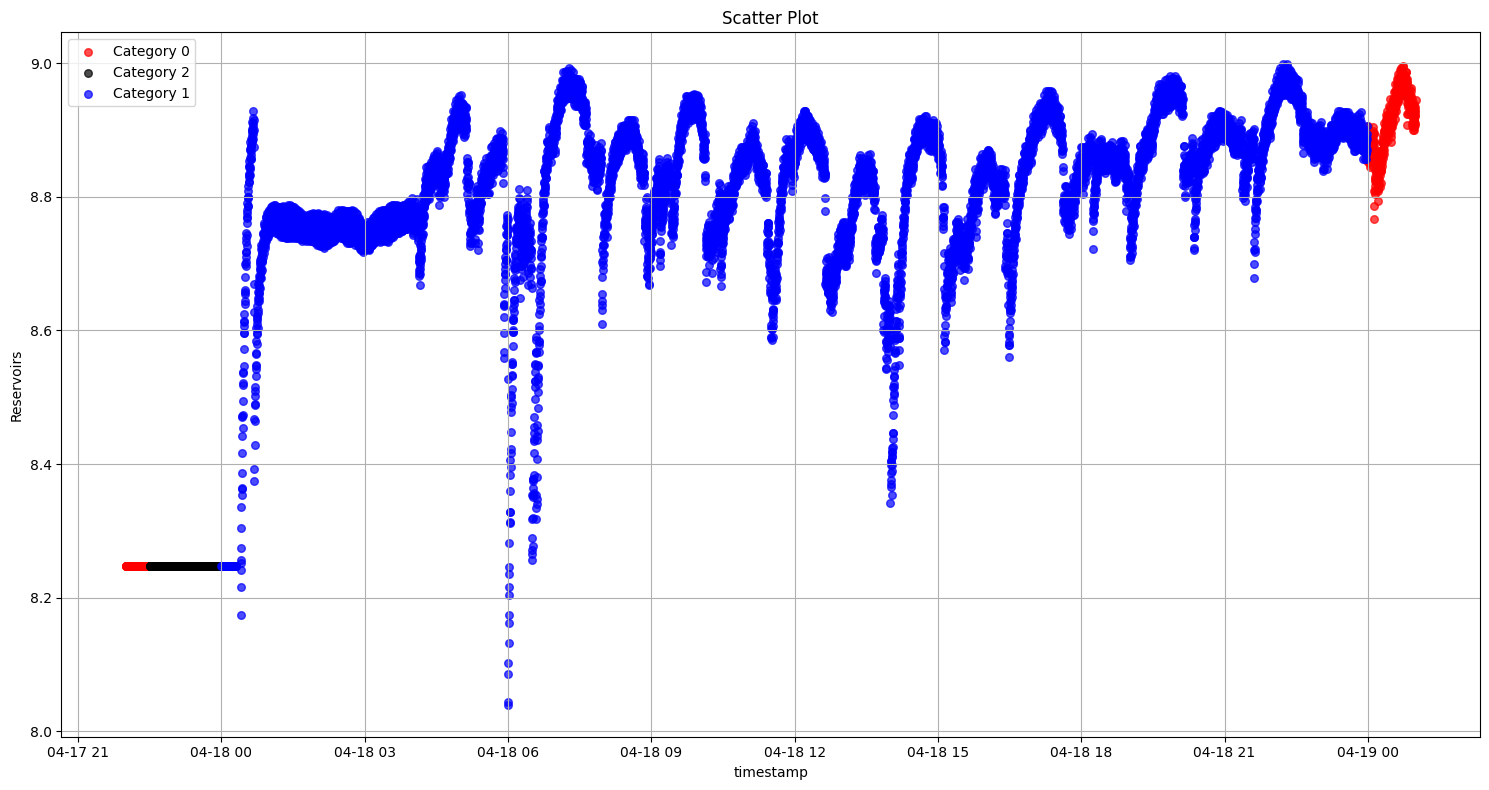

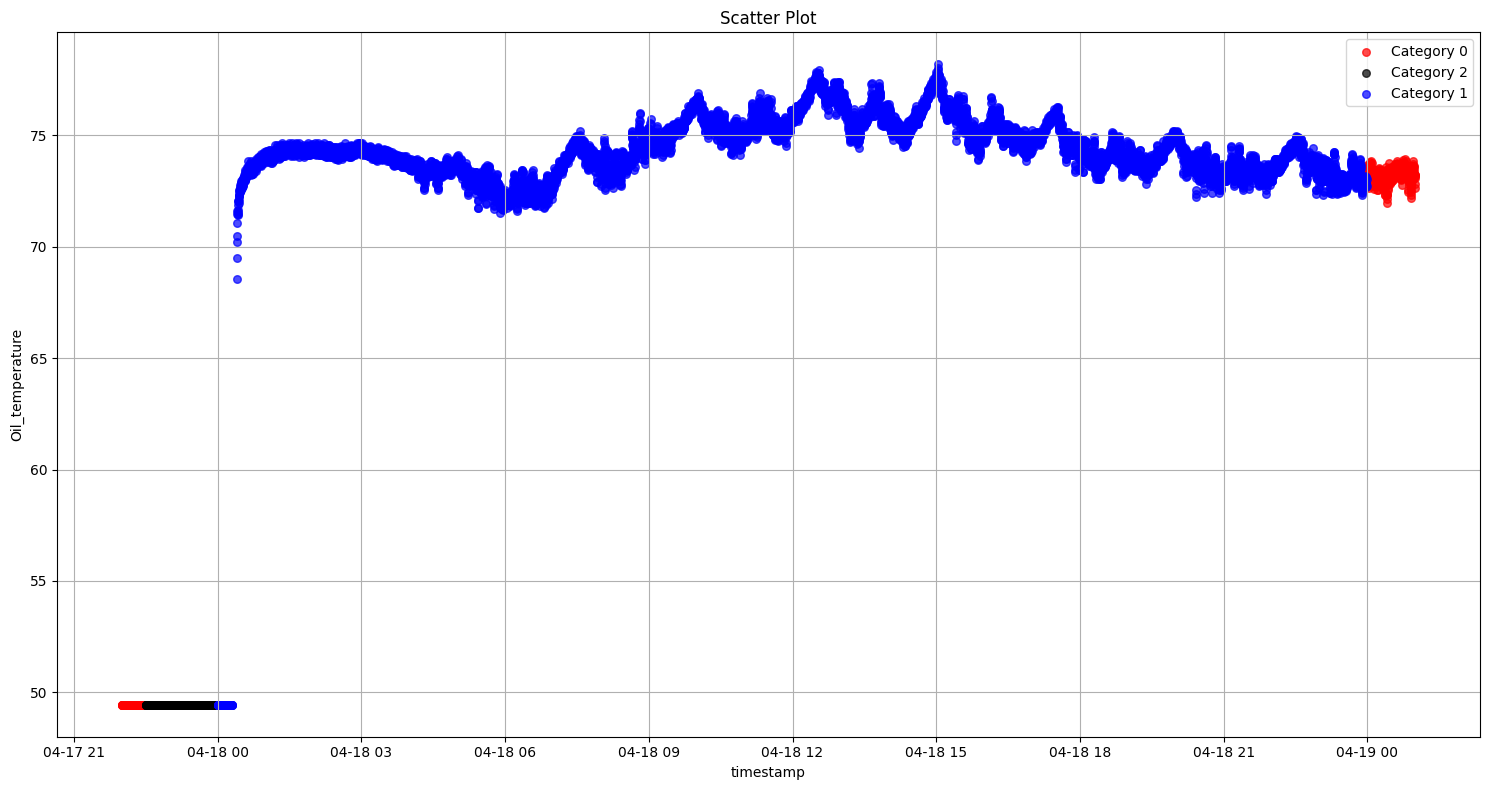

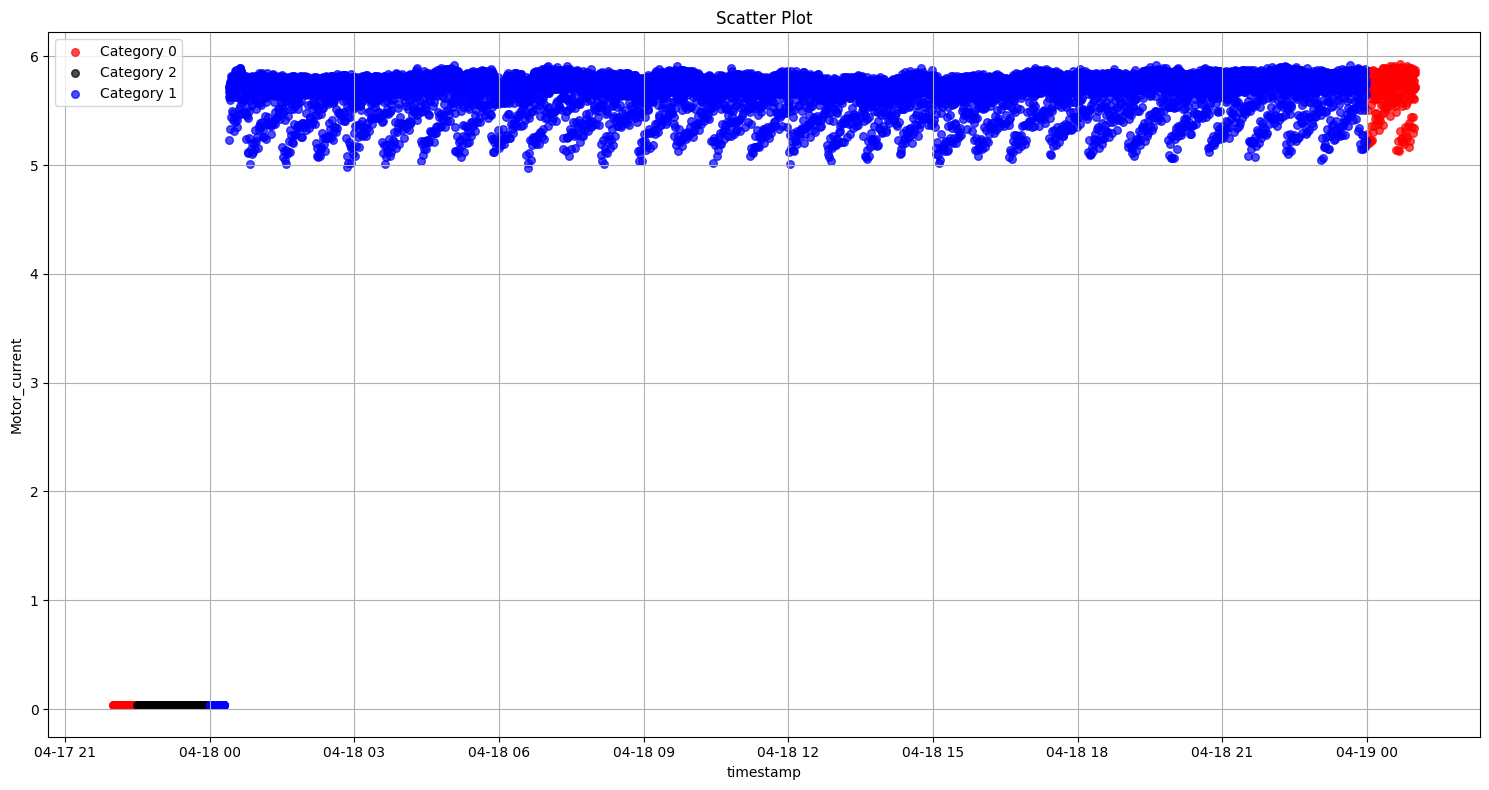

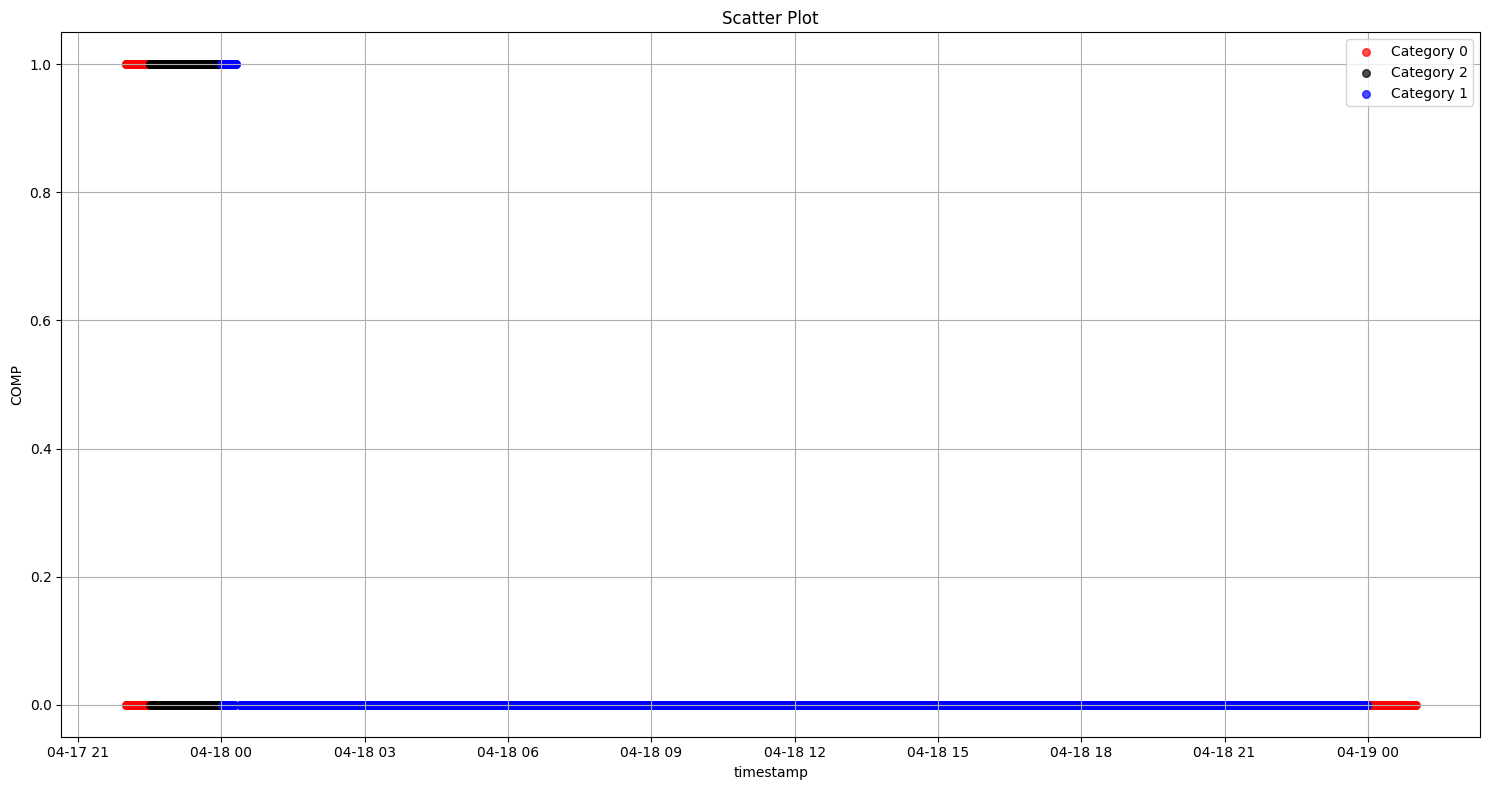

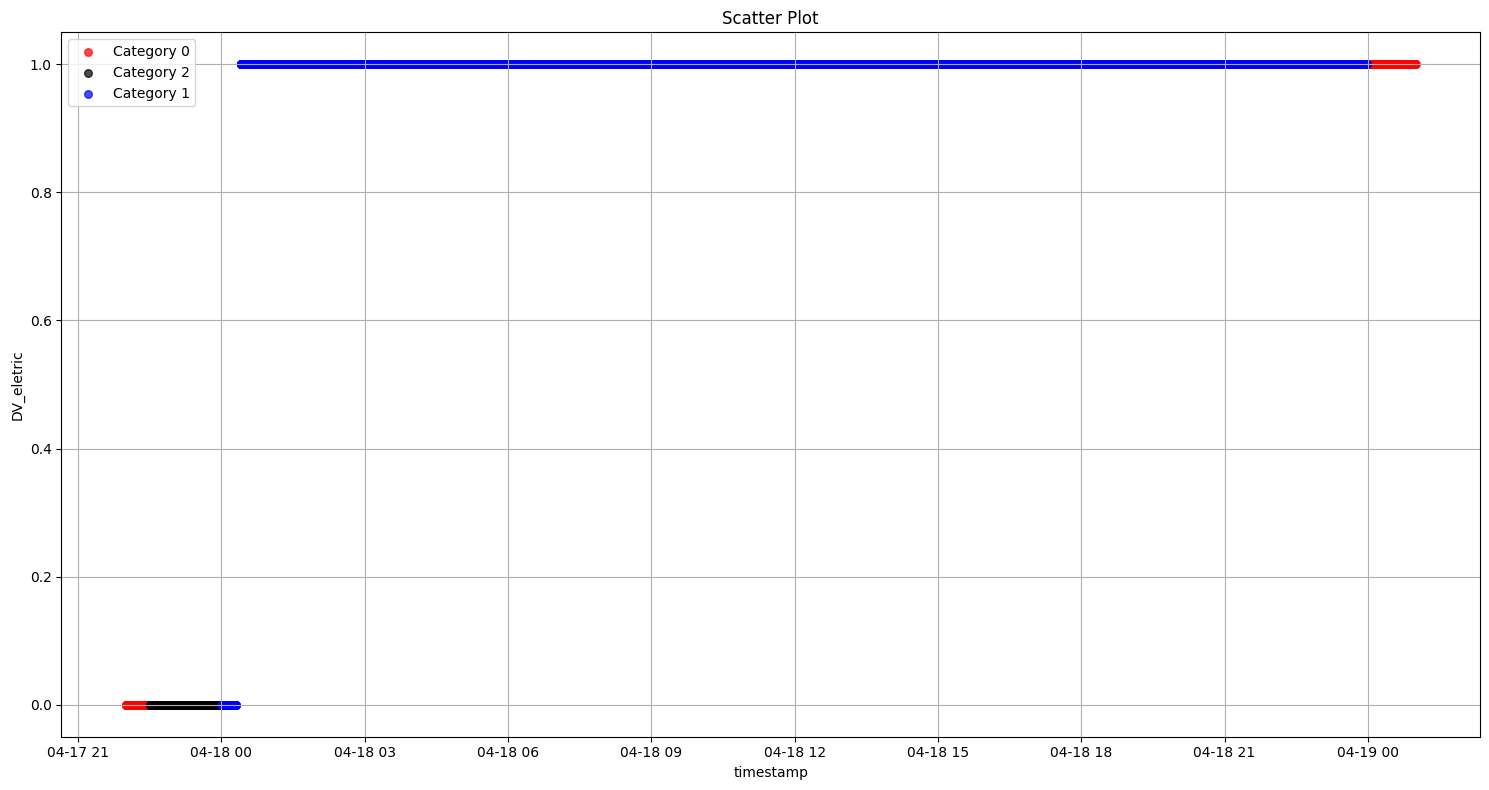

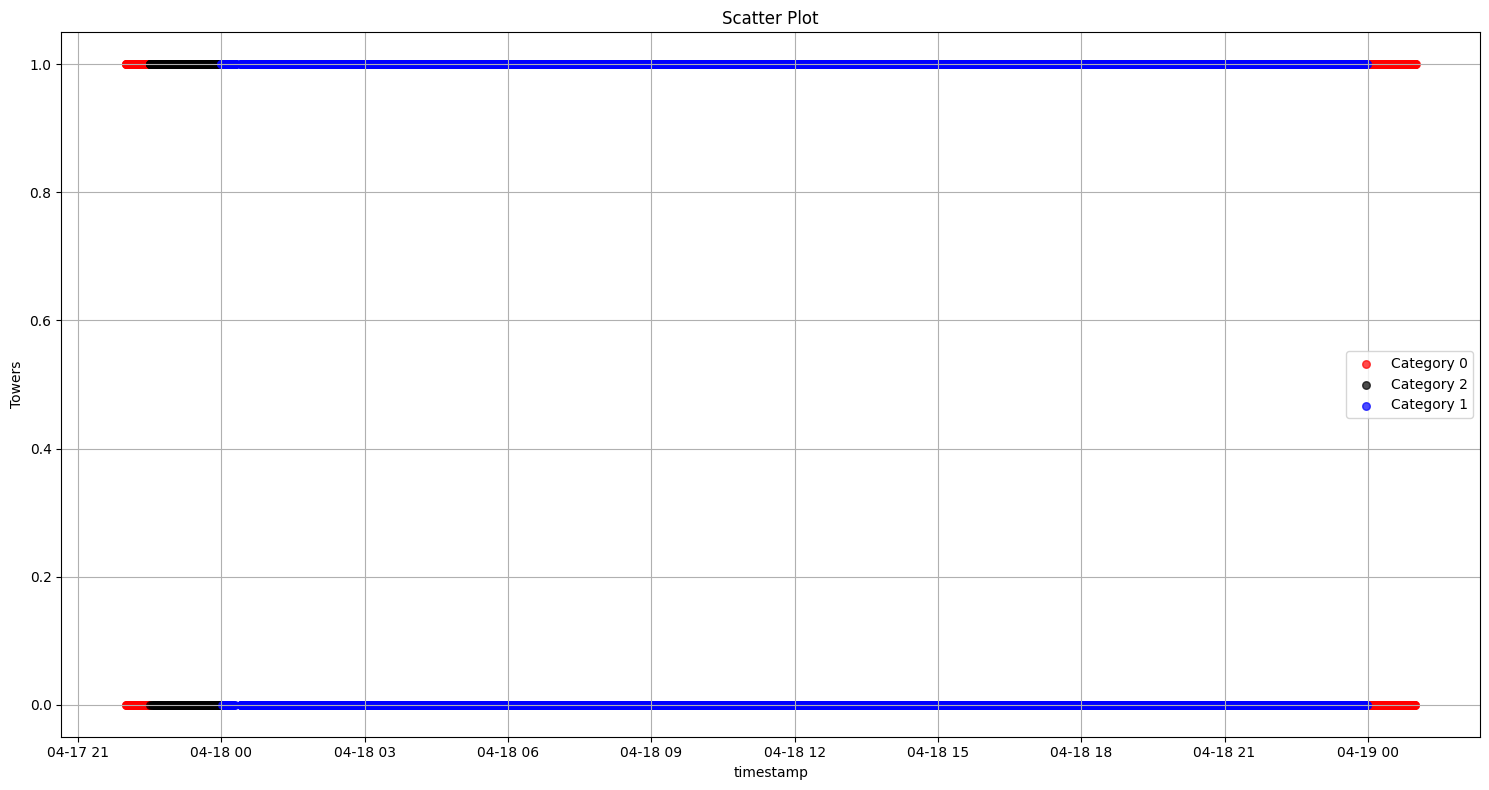

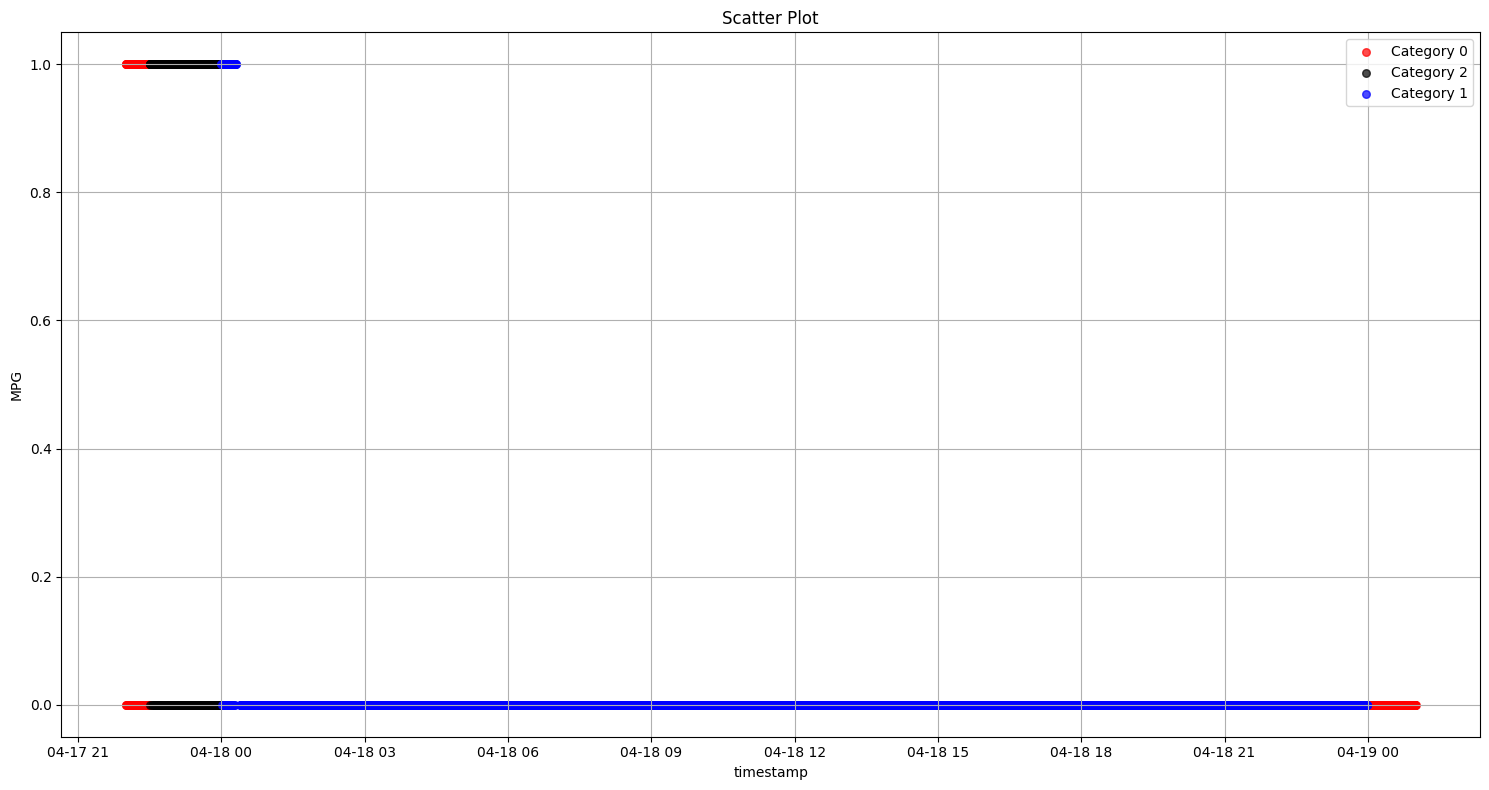

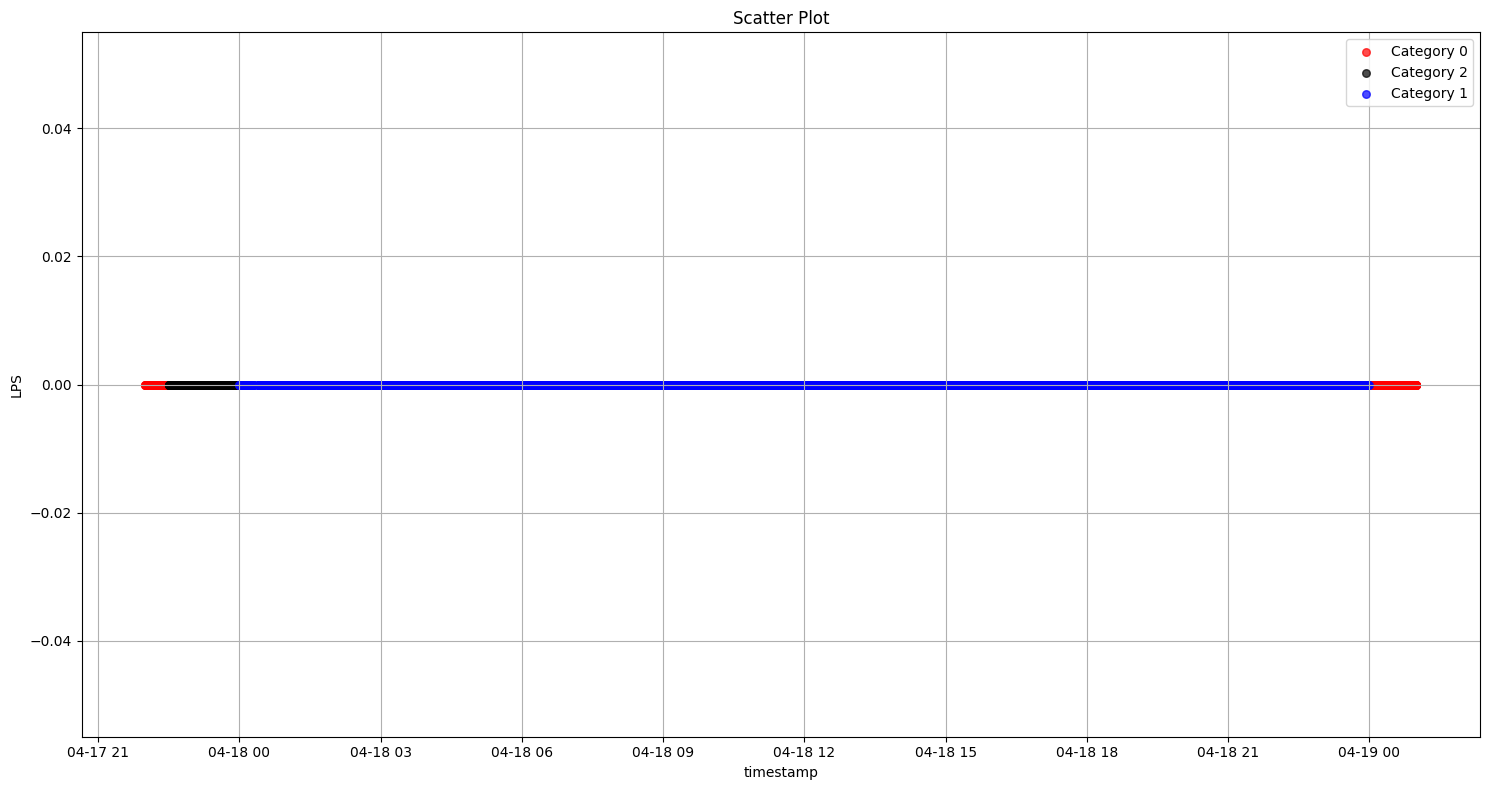

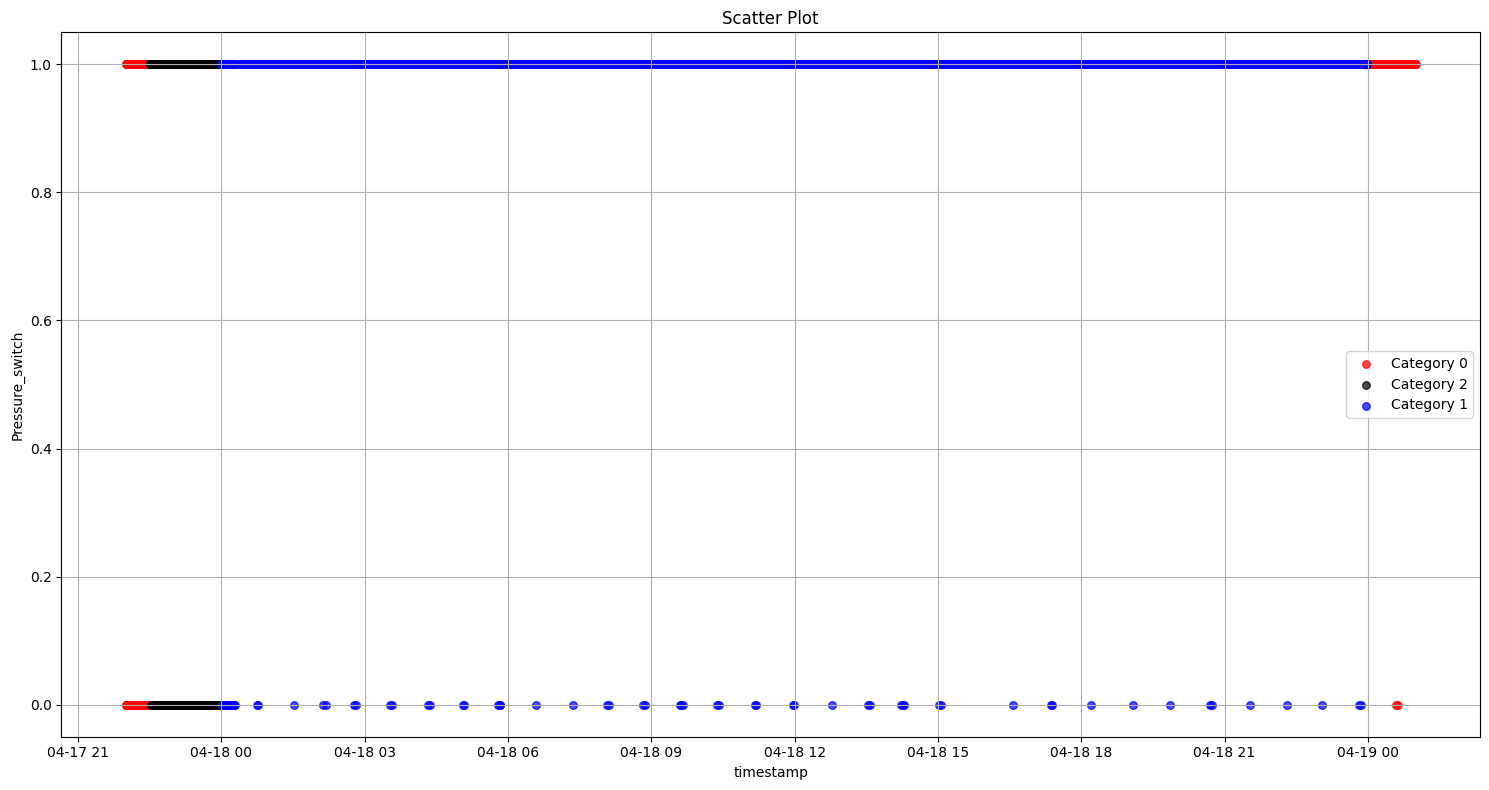

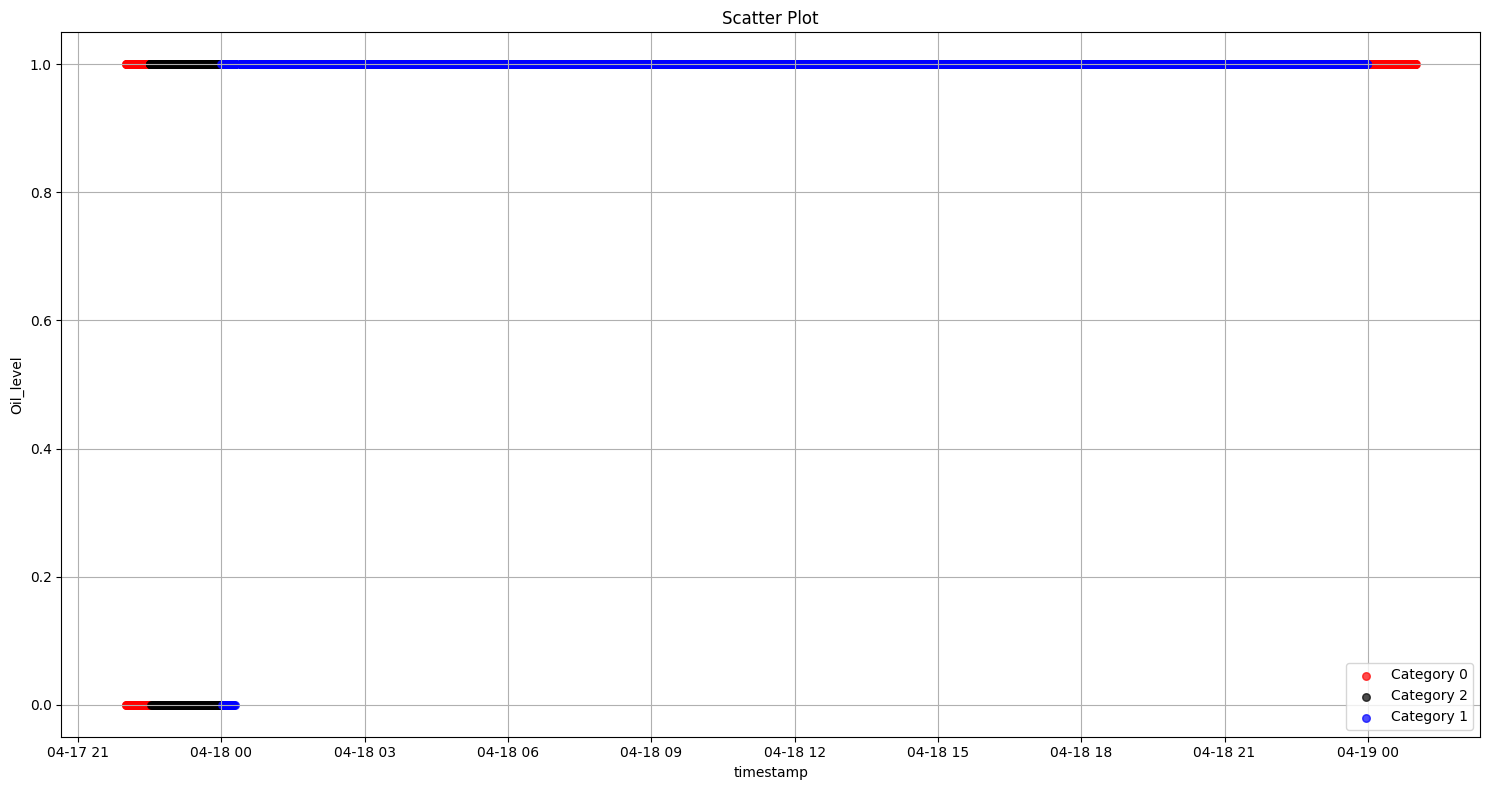

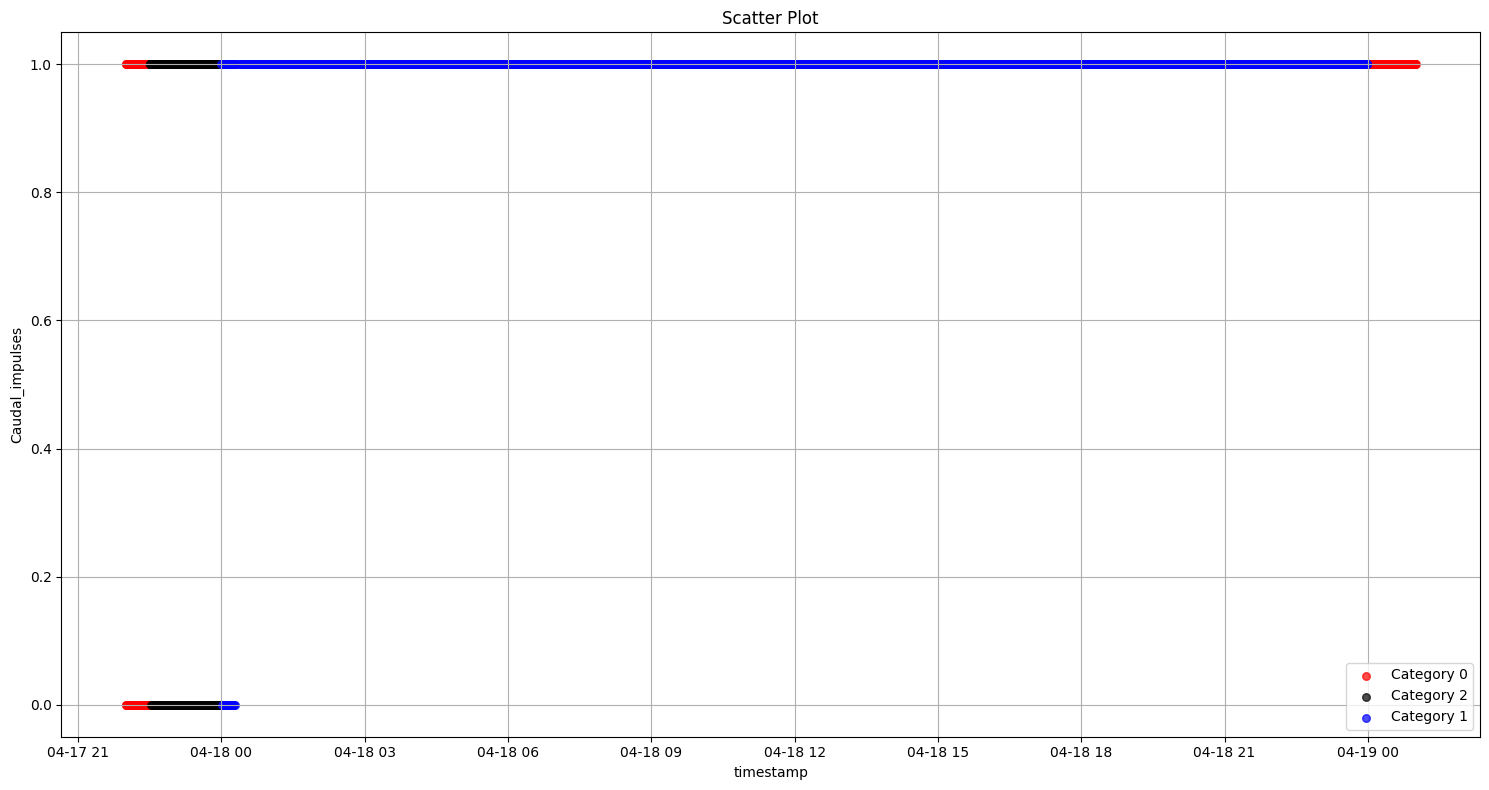

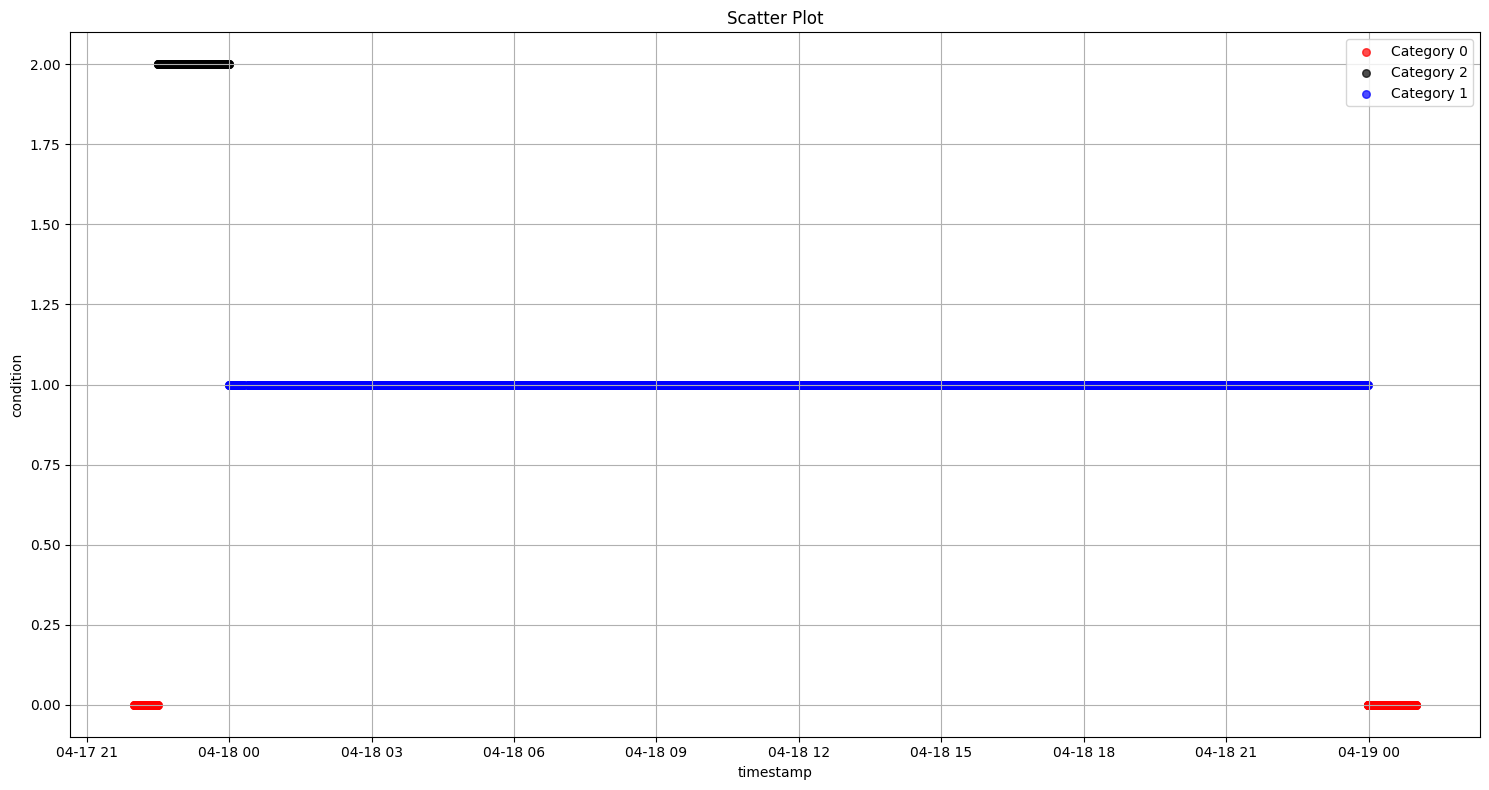

In [56]:
for i in column_names:
    mpt.plot_columns_failure_comparison(mpt.filter_rows_between_the_given_timestamps(df3, "2020-04-17 22:00:00", "2020-04-19 01:00:00"), "timestamp", i, "condition")